In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

pd.set_option('display.max_colwidth', -1)


In [2]:
df1=pd.read_excel("data/Enrollment Method Details.xlsx")


In [13]:
df2=pd.read_excel("data/_IntelliBoard Time Tracking Table.xlsx")
df2['Time Spent']=(df2['Time Spent'].astype(str).str.split(':'))
df2['hour']=df2['Time Spent'].apply(lambda x: x[0])
df2['minute']=df2['Time Spent'].apply(lambda x: x[(len(x) - 2)])
df2['second']=df2['Time Spent'].apply(lambda x: x[(len(x) - 1)])
df2['minute']=df2[['minute']].replace('Disabled','0')
df2['hour']=df2[['hour']].replace('Disabled','0')
df2['second']=df2[['second']].replace('Disabled','0')
df2['duration']=df2['hour'].astype(int)*60+(df2['minute'].astype(int))+((df2['second'].astype(int))/60)
df2=df2.loc[df2['Course Name'].isin (['Cloud Foundry Migration Tool',
                         'Red Hat OpenShift for Leaders',
                         'A Successful Sensei - Learning Journey',
                         'Data Science Learning Journey',
                         'IBM Cloud Pak for MultiCloud Management - Internal Learning Collection',
                         'IBM Cloud Pak for Automation - Internal Learning Collection',
                         'Learning Journey - OpenShift for Designers',
                         'Garage OpenShift and Cloud Pak MOOC',
                         'IBM Cloud Pak for Integration - Internal Learning Collection',
                         'Learning Journey - OpenShift for Architects',
                         'IBM Garage CPAT Learning Journey',
                         'IBM Cloud Pak for Applications - Online Technical Exploration Workshop',
                         'Mind Meld Gateway',
                         'Learning Journey - OpenShift for Application Developer',
                         'IBM Cloud Paks - Common Skills Internal Learning Collection'
                        ])]
df2_2 = df2.groupby(['Course Name']).sum()
df2_2.reset_index(inplace=True)

In [14]:
df2_2.head()

,Course Name,ID,Visits,duration
0,A Successful Sensei - Learning Journey,2549774,890,770.100000
1,Cloud Foundry Migration Tool,4771902,307,171.333333
2,Data Science Learning Journey,23363790,3327,4827.783333
3,Garage OpenShift and Cloud Pak MOOC,59595329,5493,14538.866667
4,IBM Cloud Pak for MultiCloud Management - Internal Learning Collection,31531309,4451,6977.416667


In [3]:
df1.head(50)

,Course Start Date,Course End Date,Course,First Name,Last Name,Email,Enrollment Type,Enrollment Start Date,Enrollment End Date,Status,Completed On
0,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,SUGI,VELOO,sveloo@us.ibm.com,manual,07/10/2019,NaN,Incomplete,NaN
1,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Budi,Darmawan,vbudi@us.ibm.com,manual,07/10/2019,NaN,Incomplete,NaN
2,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Dave,Thiessen,dthiesse@us.ibm.com,manual,07/10/2019,NaN,Incomplete,NaN
3,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,John,Crawford,jmcrawfo@us.ibm.com,manual,07/12/2019,NaN,Incomplete,NaN
4,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Sree,Ratnasinghe,sreer@us.ibm.com,manual,07/12/2019,NaN,Incomplete,NaN
5,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Bobby,Woolf,bwoolf@us.ibm.com,manual,07/12/2019,NaN,Incomplete,NaN
6,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Kyle,Bigler,kbigler@us.ibm.com,manual,07/12/2019,NaN,Incomplete,NaN
7,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Gang,Chen,gangchen@us.ibm.com,manual,07/12/2019,NaN,Incomplete,NaN
8,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Roland,Barcia,barcia@us.ibm.com,manual,07/16/2019,NaN,Incomplete,NaN
9,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,Holly,Cummins,cumminsh@uk.ibm.com,manual,07/16/2019,NaN,Incomplete,NaN


In [4]:
df1=df1.loc[df1['Course'].isin (['Cloud Foundry Migration Tool',
                         'Red Hat OpenShift for Leaders',
                         'A Successful Sensei - Learning Journey',
                         'Data Science Learning Journey',
                         'IBM Cloud Pak for MultiCloud Management - Internal Learning Collection',
                         'IBM Cloud Pak for Automation - Internal Learning Collection',
                         'Learning Journey - OpenShift for Designers',
                         'Garage OpenShift and Cloud Pak MOOC',
                         'IBM Cloud Pak for Integration - Internal Learning Collection',
                         'Learning Journey - OpenShift for Architects',
                         'IBM Garage CPAT Learning Journey',
                         'IBM Cloud Pak for Applications - Online Technical Exploration Workshop',
                         'Mind Meld Gateway',
                         'Learning Journey - OpenShift for Application Developer',
                         'IBM Cloud Paks - Common Skills Internal Learning Collection'
                        ])]
        

In [5]:
df1['Course'].nunique()

14

In [6]:
df1.shape

(4185, 11)

In [7]:
df2=pd.read_excel("data/Course Access.xlsx")

In [8]:
df2.head(20)

,Unnamed: 0,Course,# Of Users Accessed Course,Visits,Time Spent,# Of Enrolled Users
0,NaN,Cloud Foundry Migration Tool,29,226,02:03:24,223
1,NaN,Red Hat OpenShift for Leaders,86,829,16:39:44,27
2,NaN,A Successful Sensei - Learning Journey,39,907,13:04:57,89
3,NaN,Data Science Learning Journey,117,2698,66:05:56,106
4,NaN,IBM Cloud Pak for MultiCloud Management - Internal Learning Collection,209,2816,69:23:42,8
5,NaN,IBM Cloud Pak for Automation - Internal Learning Collection,136,3158,52:00:59,35
6,NaN,Learning Journey - OpenShift for Designers,166,3178,45:29:17,31
7,NaN,Garage OpenShift and Cloud Pak MOOC,508,4869,209:27:20,2
8,NaN,IBM Cloud Pak for Integration - Internal Learning Collection,219,5191,109:39:42,4
9,NaN,Learning Journey - OpenShift for Architects,320,7065,87:33:46,17


In [9]:
df3=pd.read_csv("data/details.csv",error_bad_lines = False)
#df3.drop(['SrcRes','SrcIndex'], axis=1, inplace=True)
df3 = df3.rename(columns={'SrcData': 'Email'})
df3.drop_duplicates('Email',keep='first', inplace=True)

df3.head()

b'Skipping line 1846: expected 187 fields, saw 188\n'
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,12,59,140,143,149,150,161,163,167,179,180,181) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Email,SrcIndex,SrcRes,E_cn,EO_hrUnitId,EG_countryName,E_dept,E_div,E_glTeamLead,B_uid,...,B_timeStampWorkday,B_title,B_tradeArea,B_userCertificate,B_userPassword,B_ventureCode,B_workerId,B_workLoc,B_workLocation,B_workplaceIndicator
0,sveloo@us.ibm.com,'0,NaN,SUGUNAM VELOO,CloudLabSvcs,USA,VL6,8E,NaN,897837897,...,2019-08-27-14:18:18,NaN,NaN,NaN,NaN,NaN,301243.0,SMB,"workLoc=SMB,ou=bluepages,o=ibm.com",H
1,vbudi@us.ibm.com,1,NaN,Budi Darmawan,CloudLabSvcs,USA,VL6,8E,NaN,2D7291897,...,2019-07-19-04:32:30,NaN,NaN,NaN,NaN,NaN,229434.0,SFC,"workLoc=SFC,ou=bluepages,o=ibm.com",S
2,dthiesse@us.ibm.com,2,NaN,David A Thiessen,CloudLabSvcs,USA,VL6,8E,NaN,2D7291897,...,2019-07-19-04:32:30,NaN,NaN,NaN,NaN,NaN,229434.0,SFC,"workLoc=SFC,ou=bluepages,o=ibm.com",S
3,jmcrawfo@us.ibm.com,3,NaN,John M Crawford,CloudLabSvcs,USA,JE1,7G,NaN,2D7291897,...,2019-07-19-04:32:30,NaN,NaN,NaN,NaN,NaN,229434.0,SFC,"workLoc=SFC,ou=bluepages,o=ibm.com",S
4,sreer@us.ibm.com,4,NaN,Vasanthalakshmi A Ratnasinghe,CloudLabSvcs,USA,XFW,7G,"uid=052116866,c=gb,ou=bluepages,o=ibm.com",1A3993897,...,2019-12-31-13:07:08,NaN,NaN,NaN,NaN,NaN,215352.0,CNY,"workLoc=CNY,ou=bluepages,o=ibm.com",S


In [173]:
df1[df1['Email']=="sveloo@us.ibm.com"]

,Course Start Date,Course End Date,Course,First Name,Last Name,Email,Enrollment Type,Enrollment Start Date,Enrollment End Date,Status,Completed On
0,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,SUGI,VELOO,sveloo@us.ibm.com,manual,07/10/2019,NaN,Incomplete,NaN
859,08/26/2019,NaN,Learning Journey - OpenShift for Designers,SUGI,VELOO,sveloo@us.ibm.com,manual,08/06/2019,NaN,Incomplete,NaN
1030,08/16/2019,NaN,Mind Meld Gateway,SUGI,VELOO,sveloo@us.ibm.com,self,08/12/2019,NaN,Incomplete,NaN
1535,09/13/2017,02/28/2021,IBM Cloud Paks - Common Skills Internal Learning Collection,SUGI,VELOO,sveloo@us.ibm.com,self,09/03/2019,09/18/2019,Incomplete,NaN
1536,09/13/2017,02/28/2021,IBM Cloud Paks - Common Skills Internal Learning Collection,SUGI,VELOO,sveloo@us.ibm.com,autoenrol,09/19/2019,NaN,Incomplete,NaN
2342,09/13/2017,NaN,Learning Journey - OpenShift for Architects,SUGI,VELOO,sveloo@us.ibm.com,self,08/26/2019,09/10/2019,Incomplete,NaN
2684,09/13/2017,NaN,IBM Cloud Pak for Integration - Internal Learning Collection,SUGI,VELOO,sveloo@us.ibm.com,self,09/26/2019,NaN,Incomplete,NaN
3362,09/13/2017,NaN,Red Hat OpenShift for Leaders,SUGI,VELOO,sveloo@us.ibm.com,autoenrol,10/07/2019,NaN,Incomplete,NaN
3449,09/13/2017,11/14/2021,IBM Garage CPAT Learning Journey,SUGI,VELOO,sveloo@us.ibm.com,self,09/04/2019,NaN,Incomplete,NaN
3764,09/13/2017,12/13/2021,Data Science Learning Journey,SUGI,VELOO,sveloo@us.ibm.com,autoenrol,09/30/2019,NaN,Incomplete,NaN


In [174]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3[df3['Email']=="sveloo@us.ibm.com"]

,Email,SrcIndex,SrcRes,E_cn,EO_hrUnitId,EG_countryName,E_dept,E_div,E_glTeamLead,B_uid,B_cn,B_co,B_hrInitial,B_hrFirstName,B_hrMiddleName,B_hrLastName,B_hrManagerIndicator,B_mail,B_notesId,BO_description,BO_hrGroupId,BO_hrOrganizationCode,BO_hrOrganizationDisplay,BO_hrOrganizationId,BO_hrOrganizationName,BO_hrUnitId,BW_address1,BW_address2,BW_c,BW_d,BW_l,BW_o,BW_objectClass,BW_postalCode,BW_st,BW_workLoc,BG_countryCode,BG_countryName,BG_geoCode,BG_geoName,BG_regionCode,BG_regionName,BG_subRegionCode,BG_subRegionName,BG_marketTypeCode,BG_marketTypeName,B_additional,B_administrator,B_alternateAddress1,B_alternateAddress2,B_alternateLocalityName,B_alternateNode,B_alternatePostalCode,B_alternateSt,B_alternateTelephoneNumber,B_alternateTieline,B_alternateUserId,B_area,B_backup,B_backupCountryCode,B_backupSerialNumber,B_bluepagesNotesIdError,B_buildingName,B_c,B_callupDateTime,B_callupName,B_cellServiceProvider,B_contractorCompany,B_contractorRecordExpiration,B_coreDataIntegrity,B_costCenter,B_costCenterEffectiveDate,B_createTimeStamp,B_deleter,B_department,B_dept,B_description,B_directoryAlias,B_div,B_divDept,B_employeeCountryCode,B_employeeType,B_entryType,B_facsimileTelephoneNumber,B_facsimileTieline,B_floor,B_generationQualifier,B_givenName,B_glTeamLead,B_historicPassword1,B_historicPassword2,B_historicPassword3,B_historicPassword4,B_historicPassword5,B_hrActive,B_hrAssignee,B_hrAssignment,B_hrCompanyCode,B_hrCountryCode,B_hrDepartment,B_hrDivision,B_hrEmployeeType,B_hrFamilyName,B_hrManagerPSC,B_hrManagerSerial,B_hrOrganizationCode,B_hrOrgUnitCode,B_hrOtherName,B_hrPreferredName,B_hrPSC,B_hrSerialNumber,B_ibmLoc,B_ibmSerialNumber,B_infoTelephoneNumber,B_internalEmail,B_internalMailDrop,B_invalidManagerDate,B_ipTelephoneNumber,B_isManager,B_isNonExpiring,B_jobResponsibilities,B_l,B_locationCity,B_manager,B_managerCountryCode,B_managerSerialNumber,B_middleInitial,B_mobile,B_nativeFirstName,B_nativeLastName,B_notesEmail,B_notesMailDomain,B_notesMailFile,B_notesMailServer,B_notesPublicKey,B_notesShortName,B_o,B_odmEntry,B_ou,B_pager,B_pagerId,B_pagerServiceProvider,B_pagerType,B_passwordHistoryForChanges,B_passwordHistoryForResets,B_passwordIsExpired,B_passwordIsReset,B_passwordIsResetByAdmin,B_passwordIsStruckout,B_passwordModifyTimestamp,B_pdif,B_personalTitle,B_phoneMailNumber,B_physicalDeliveryOfficeName,B_preferredFirstName,B_preferredIdentity,B_preferredLanguage,B_preferredLastName,B_previousManagerSerial,B_primaryNode,B_primaryUserId,B_sAMAccountName,B_secretary,B_secretaryCountryCode,B_secretarySerialNumber,B_seeAlso,B_serialNumber,B_shift,B_sn,B_telephoneNumber,B_territory,B_tieline,B_timestampBpgui,B_timeStampBPGuiRI,B_timestampFeed,B_timestampHRMS,B_timeStampOnboard,B_timeStampWorkday,B_title,B_tradeArea,B_userCertificate,B_userPassword,B_ventureCode,B_workerId,B_workLoc,B_workLocation,B_workplaceIndicator
0,sveloo@us.ibm.com,'0,NaN,SUGUNAM VELOO,CloudLabSvcs,USA,VL6,8E,NaN,897837897,Vasanthalakshmi A Ratnasinghe,United States of America,NaN,Vasanthalakshmi,A,Ratnasinghe,M,sreer@us.ibm.com,Sree A Ratnasinghe/Raleigh/IBM,NaN,Cloud,DG,IBM Cloud and Cognitive Software,NaN,NaN,CloudLabSvcs,4205 S MIAMI BLVD,NaN,US,NaN,DURHAM,ibm.com,ibmWorkLocation,27703-9141,NC,SMB,US,USA,NaN,NaN,US1,US,US,US,M,Major,NaN,NaN,4205 S Miami Blvd,NaN,Durham,RALVMS,27703,NC,NaN,NaN,RS897837,NaN,"uid=057791649,c=ca,ou=bluepages,o=ibm.com",649,'057791,NaN,503,us,NaN,"Ratnasinghe, Vasanthalakshmi A (Sree)",NaN,NaN,NaN,Y,XFW,NaN,20090529232205.000000Z,NaN,NaN,XFW,NaN,WORKDAY,7G,"dept=XFW,div=7G,ou=bluepages,o=ibm.com",897,P,workday,NaN,NaN,NaN,NaN,Vasanthalakshmi,"uid=052116866,c=gb,ou=bluepages,o=ibm.com",NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,'0147,us,NaN,NaN,RF,NaN,NaN,NaN,DG,DG,NaN,NaN,NaN,NaN,SMB,897837,"Please call me Sree. I can be reached via email or mobile. If I do not respond during business hours, I am probably in a meeting - email, ST, or text my mobile.",NaN,na,NaN,NaN,Y,NaN,"Director, IBM Garage Solution Engineering",NaN,NaN,"uid=1A3993897,c=u

In [175]:
df1['Email'].nunique()

2128

In [176]:
df1.shape

(4185, 11)

In [177]:
df3.shape

(2381, 187)

In [183]:
df=pd.merge(df1,df3,on='Email', how='left')
df = df.drop_duplicates()
df = df[pd.notnull(df['EO_hrUnitId'])]
df = df[pd.notnull(df['BO_hrOrganizationDisplay'])]



In [184]:
df.head(50)

,Course Start Date,Course End Date,Course,First Name,Last Name,Email,Enrollment Type,Enrollment Start Date,Enrollment End Date,Status,Completed On,SrcIndex,SrcRes,E_cn,EO_hrUnitId,EG_countryName,E_dept,E_div,E_glTeamLead,B_uid,B_cn,B_co,B_hrInitial,B_hrFirstName,B_hrMiddleName,B_hrLastName,B_hrManagerIndicator,B_mail,B_notesId,BO_description,BO_hrGroupId,BO_hrOrganizationCode,BO_hrOrganizationDisplay,BO_hrOrganizationId,BO_hrOrganizationName,BO_hrUnitId,BW_address1,BW_address2,BW_c,BW_d,BW_l,BW_o,BW_objectClass,BW_postalCode,BW_st,BW_workLoc,BG_countryCode,BG_countryName,BG_geoCode,BG_geoName,BG_regionCode,BG_regionName,BG_subRegionCode,BG_subRegionName,BG_marketTypeCode,BG_marketTypeName,B_additional,B_administrator,B_alternateAddress1,B_alternateAddress2,B_alternateLocalityName,B_alternateNode,B_alternatePostalCode,B_alternateSt,B_alternateTelephoneNumber,B_alternateTieline,B_alternateUserId,B_area,B_backup,B_backupCountryCode,B_backupSerialNumber,B_bluepagesNotesIdError,B_buildingName,B_c,B_callupDateTime,B_callupName,B_cellServiceProvider,B_contractorCompany,B_contractorRecordExpiration,B_coreDataIntegrity,B_costCenter,B_costCenterEffectiveDate,B_createTimeStamp,B_deleter,B_department,B_dept,B_description,B_directoryAlias,B_div,B_divDept,B_employeeCountryCode,B_employeeType,B_entryType,B_facsimileTelephoneNumber,B_facsimileTieline,B_floor,B_generationQualifier,B_givenName,B_glTeamLead,B_historicPassword1,B_historicPassword2,B_historicPassword3,B_historicPassword4,B_historicPassword5,B_hrActive,B_hrAssignee,B_hrAssignment,B_hrCompanyCode,B_hrCountryCode,B_hrDepartment,B_hrDivision,B_hrEmployeeType,B_hrFamilyName,B_hrManagerPSC,B_hrManagerSerial,B_hrOrganizationCode,B_hrOrgUnitCode,B_hrOtherName,B_hrPreferredName,B_hrPSC,B_hrSerialNumber,B_ibmLoc,B_ibmSerialNumber,B_infoTelephoneNumber,B_internalEmail,B_internalMailDrop,B_invalidManagerDate,B_ipTelephoneNumber,B_isManager,B_isNonExpiring,B_jobResponsibilities,B_l,B_locationCity,B_manager,B_managerCountryCode,B_managerSerialNumber,B_middleInitial,B_mobile,B_nativeFirstName,B_nativeLastName,B_notesEmail,B_notesMailDomain,B_notesMailFile,B_notesMailServer,B_notesPublicKey,B_notesShortName,B_o,B_odmEntry,B_ou,B_pager,B_pagerId,B_pagerServiceProvider,B_pagerType,B_passwordHistoryForChanges,B_passwordHistoryForResets,B_passwordIsExpired,B_passwordIsReset,B_passwordIsResetByAdmin,B_passwordIsStruckout,B_passwordModifyTimestamp,B_pdif,B_personalTitle,B_phoneMailNumber,B_physicalDeliveryOfficeName,B_preferredFirstName,B_preferredIdentity,B_preferredLanguage,B_preferredLastName,B_previousManagerSerial,B_primaryNode,B_primaryUserId,B_sAMAccountName,B_secretary,B_secretaryCountryCode,B_secretarySerialNumber,B_seeAlso,B_serialNumber,B_shift,B_sn,B_telephoneNumber,B_territory,B_tieline,B_timestampBpgui,B_timeStampBPGuiRI,B_timestampFeed,B_timestampHRMS,B_timeStampOnboard,B_timeStampWorkday,B_title,B_tradeArea,B_userCertificate,B_userPassword,B_ventureCode,B_workerId,B_workLoc,B_workLocation,B_workplaceIndicator
0,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,SUGI,VELOO,sveloo@us.ibm.com,manual,07/10/2019,NaN,Incomplete,NaN,'0,NaN,SUGUNAM VELOO,CloudLabSvcs,USA,VL6,8E,NaN,897837897,Vasanthalakshmi A Ratnasinghe,United States of America,NaN,Vasanthalakshmi,A,Ratnasinghe,M,sreer@us.ibm.com,Sree A Ratnasinghe/Raleigh/IBM,NaN,Cloud,DG,IBM Cloud and Cognitive Software,NaN,NaN,CloudLabSvcs,4205 S MIAMI BLVD,NaN,US,NaN,DURHAM,ibm.com,ibmWorkLocation,27703-9141,NC,SMB,US,USA,NaN,NaN,US1,US,US,US,M,Major,NaN,NaN,4205 S Miami Blvd,NaN,Durham,RALVMS,27703,NC,NaN,NaN,RS897837,NaN,"uid=057791649,c=ca,ou=bluepages,o=ibm.com",649,'057791,NaN,503,us,NaN,"Ratnasinghe, Vasanthalakshmi A (Sree)",NaN,NaN,NaN,Y,XFW,NaN,20090529232205.000000Z,NaN,NaN,XFW,NaN,WORKDAY,7G,"dept=XFW,div=7G,ou=bluepages,o=ibm.com",897,P,workday,NaN,NaN,NaN,NaN,Vasanthalakshmi,"uid=052116866,c=gb,ou=bluepages,o=ibm.com",NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,'0147,us,NaN,NaN,RF,NaN,NaN,NaN,DG,DG,NaN,NaN,NaN,NaN,

In [186]:
df.to_csv("df.csv")

In [187]:
df=pd.read_csv("df.csv")

In [188]:
df.shape

(4079, 198)

In [189]:
df.EO_hrUnitId.unique()

array(['CloudLabSvcs', 'Cloud Sales', 'Cld Integration',
       'GLMKT Non Brand', 'Blockchain', 'Data and AI', 'GTS Leadership',
       'DigitalPlatform', 'Cloud App Innov', 'C&CS WW Sales',
       'Cloud Platform', 'Cloud Top', 'GTS D&IO', 'Managed Apps',
       'SecuritySols', 'IBM Z', 'SysSWSales', 'CST', 'DEG', 'CSUIP Sales',
       'GTS Europe Geo', 'Collab Sols', 'Sys HWS L2', 'Dig Strat & iX',
       'GTS AP Geo', 'WH_Top', 'CIO', 'SolsDel&Trans', 'Cog Proc Trans',
       'Digital Sales', 'StDev_TecCmpDev', 'Storage', 'Cloud Solutions',
       'WatsonCustEngag', 'Power', 'Almaden', 'GTS NA Geo',
       'OpenmarketPlace', 'StDev_Micro', 'Watson IoT', 'StDev_EntSys',
       'InfraSvcs', 'Bus Support', 'Integrated Acc', 'StDev_ShdTechOp',
       'Sys HW Sales', 'GTS LA Geo', 'TSS', 'WH_Gov&HHS', 'Marketing',
       'Systems Top', 'Gbl Bus Ptnrs', 'CDO', 'SecuritySvcs', 'GlobalOps',
       'CFO', 'Res Geo', 'Cog App Top', 'SecClientSuc', 'MW Other',
       'CaaS', 'GlblProcurement'

In [190]:
df.Course.unique()

array(['Learning Journey - OpenShift for Application Developer',
       'Learning Journey - OpenShift for Designers', 'Mind Meld Gateway',
       'IBM Cloud Paks - Common Skills Internal Learning Collection',
       'Learning Journey - OpenShift for Architects',
       'IBM Cloud Pak for Integration - Internal Learning Collection',
       'Red Hat OpenShift for Leaders',
       'IBM Garage CPAT Learning Journey',
       'Data Science Learning Journey',
       'A Successful Sensei - Learning Journey',
       'IBM Cloud Pak for Automation - Internal Learning Collection',
       'IBM Cloud Pak for MultiCloud Management - Internal Learning Collection',
       'Cloud Foundry Migration Tool',
       'Garage OpenShift and Cloud Pak MOOC'], dtype=object)

In [191]:
dfs = dict(tuple(df.groupby('EO_hrUnitId')))


In [192]:
df_CloudLabSvcs=dfs['CloudLabSvcs']
df_Cloud_Sales=dfs['Cloud Sales']
df_Cld_Integration=dfs['Cld Integration']
df_GLMKT_Non_Brand=dfs['GLMKT Non Brand']
df_Blockchain=dfs['Blockchain']
df_Data_and_AI=dfs['Data and AI']
df_GTS_Leadership=dfs['GTS Leadership']
       
df_DigitalPlatform= dfs['DigitalPlatform']
df_Cloud_App_Innov= dfs['Cloud App Innov']
df_C_and_CS_WW_Sales=dfs['C&CS WW Sales']
df_Cloud_Platform=dfs['Cloud Platform']
df_Cloud_Top=dfs['Cloud Top']
df_GTS_D_and_IO= dfs['GTS D&IO']
df_Managed_Apps=dfs['Managed Apps']
df_SecuritySols=dfs['SecuritySols']
# 'IBM Z', 
# 'SysSWSales', 
# 'CST',
# 'DEG', 'CSUIP Sales',
# 'GTS Europe Geo',
# 'Collab Sols', 
# 'Sys HWS L2', 
# 'Dig Strat & iX',
# 'GTS AP Geo',
# 'WH_Top', 
# 'CIO', 
# 'SolsDel&Trans',
# 'Cog Proc Trans',
# 'Digital Sales', 
# 'StDev_TecCmpDev', 
# 'Storage', 
# 'Cloud Solutions',
# 'WatsonCustEngag', 
# 'Power',
# 'Almaden', 
# 'GTS NA Geo',
# 'OpenmarketPlace',
# 'StDev_Micro',
# 'Watson IoT',
# 'StDev_EntSys',
# 'InfraSvcs', 
# 'Bus Support',
# 'Integrated Acc', 
# 'StDev_ShdTechOp',
# 'Sys HW Sales', 
# 'GTS LA Geo', 
# 'TSS', 
# 'WH_Gov&HHS',
# 'Marketing',
# 'Systems Top', 'Gbl Bus Ptnrs', 'CDO', 'SecuritySvcs', 'GlobalOps',
# 'CFO', 'Res Geo', 'Cog App Top', 'WH_Imaging', 'StDev_TechStrat',
# 'SecClientSuc', 'MW Other', 'CaaS', 'GlblProcurement',
# 'Global Ind', 'WH_Provider', 'GTS GCG Geo', 'Business Dev', 'SMS',
# 'Security Top', 'GlblRealEstate', 'BusArch Trans', 'Watson M&W',
# 'Unknown', 'Cloud Mktg', 'GblBusPrtnrs', 'Human Resources',
# 'WH_LS_Onc&Gen', 'TalentMgmtSolns', 'StDev_ClntAdv',
# 'GTS Japan Geo'

In [193]:
 df_CloudLabSvcs.head()

,Unnamed: 0,Course Start Date,Course End Date,Course,First Name,Last Name,Email,Enrollment Type,Enrollment Start Date,Enrollment End Date,Status,Completed On,SrcIndex,SrcRes,E_cn,EO_hrUnitId,EG_countryName,E_dept,E_div,E_glTeamLead,B_uid,B_cn,B_co,B_hrInitial,B_hrFirstName,B_hrMiddleName,B_hrLastName,B_hrManagerIndicator,B_mail,B_notesId,BO_description,BO_hrGroupId,BO_hrOrganizationCode,BO_hrOrganizationDisplay,BO_hrOrganizationId,BO_hrOrganizationName,BO_hrUnitId,BW_address1,BW_address2,BW_c,BW_d,BW_l,BW_o,BW_objectClass,BW_postalCode,BW_st,BW_workLoc,BG_countryCode,BG_countryName,BG_geoCode,BG_geoName,BG_regionCode,BG_regionName,BG_subRegionCode,BG_subRegionName,BG_marketTypeCode,BG_marketTypeName,B_additional,B_administrator,B_alternateAddress1,B_alternateAddress2,B_alternateLocalityName,B_alternateNode,B_alternatePostalCode,B_alternateSt,B_alternateTelephoneNumber,B_alternateTieline,B_alternateUserId,B_area,B_backup,B_backupCountryCode,B_backupSerialNumber,B_bluepagesNotesIdError,B_buildingName,B_c,B_callupDateTime,B_callupName,B_cellServiceProvider,B_contractorCompany,B_contractorRecordExpiration,B_coreDataIntegrity,B_costCenter,B_costCenterEffectiveDate,B_createTimeStamp,B_deleter,B_department,B_dept,B_description,B_directoryAlias,B_div,B_divDept,B_employeeCountryCode,B_employeeType,B_entryType,B_facsimileTelephoneNumber,B_facsimileTieline,B_floor,B_generationQualifier,B_givenName,B_glTeamLead,B_historicPassword1,B_historicPassword2,B_historicPassword3,B_historicPassword4,B_historicPassword5,B_hrActive,B_hrAssignee,B_hrAssignment,B_hrCompanyCode,B_hrCountryCode,B_hrDepartment,B_hrDivision,B_hrEmployeeType,B_hrFamilyName,B_hrManagerPSC,B_hrManagerSerial,B_hrOrganizationCode,B_hrOrgUnitCode,B_hrOtherName,B_hrPreferredName,B_hrPSC,B_hrSerialNumber,B_ibmLoc,B_ibmSerialNumber,B_infoTelephoneNumber,B_internalEmail,B_internalMailDrop,B_invalidManagerDate,B_ipTelephoneNumber,B_isManager,B_isNonExpiring,B_jobResponsibilities,B_l,B_locationCity,B_manager,B_managerCountryCode,B_managerSerialNumber,B_middleInitial,B_mobile,B_nativeFirstName,B_nativeLastName,B_notesEmail,B_notesMailDomain,B_notesMailFile,B_notesMailServer,B_notesPublicKey,B_notesShortName,B_o,B_odmEntry,B_ou,B_pager,B_pagerId,B_pagerServiceProvider,B_pagerType,B_passwordHistoryForChanges,B_passwordHistoryForResets,B_passwordIsExpired,B_passwordIsReset,B_passwordIsResetByAdmin,B_passwordIsStruckout,B_passwordModifyTimestamp,B_pdif,B_personalTitle,B_phoneMailNumber,B_physicalDeliveryOfficeName,B_preferredFirstName,B_preferredIdentity,B_preferredLanguage,B_preferredLastName,B_previousManagerSerial,B_primaryNode,B_primaryUserId,B_sAMAccountName,B_secretary,B_secretaryCountryCode,B_secretarySerialNumber,B_seeAlso,B_serialNumber,B_shift,B_sn,B_telephoneNumber,B_territory,B_tieline,B_timestampBpgui,B_timeStampBPGuiRI,B_timestampFeed,B_timestampHRMS,B_timeStampOnboard,B_timeStampWorkday,B_title,B_tradeArea,B_userCertificate,B_userPassword,B_ventureCode,B_workerId,B_workLoc,B_workLocation,B_workplaceIndicator
0,0,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,SUGI,VELOO,sveloo@us.ibm.com,manual,07/10/2019,NaN,Incomplete,NaN,'0,NaN,SUGUNAM VELOO,CloudLabSvcs,USA,VL6,8E,NaN,897837897,Vasanthalakshmi A Ratnasinghe,United States of America,NaN,Vasanthalakshmi,A,Ratnasinghe,M,sreer@us.ibm.com,Sree A Ratnasinghe/Raleigh/IBM,NaN,Cloud,DG,IBM Cloud and Cognitive Software,NaN,NaN,CloudLabSvcs,4205 S MIAMI BLVD,NaN,US,NaN,DURHAM,ibm.com,ibmWorkLocation,27703-9141,NC,SMB,US,USA,NaN,NaN,US1,US,US,US,M,Major,NaN,NaN,4205 S Miami Blvd,NaN,Durham,RALVMS,27703,NC,NaN,NaN,RS897837,NaN,"uid=057791649,c=ca,ou=bluepages,o=ibm.com",649,'057791,NaN,503,us,NaN,"Ratnasinghe, Vasanthalakshmi A (Sree)",NaN,NaN,NaN,Y,XFW,NaN,20090529232205.000000Z,NaN,NaN,XFW,NaN,WORKDAY,7G,"dept=XFW,div=7G,ou=bluepages,o=ibm.com",897,P,workday,NaN,NaN,NaN,NaN,Vasanthalakshmi,"uid=052116866,c=gb,ou=bluepages,o=ibm.com",NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,'0147,us,NaN,NaN,RF,NaN,NaN,NaN,DG,DG,NaN

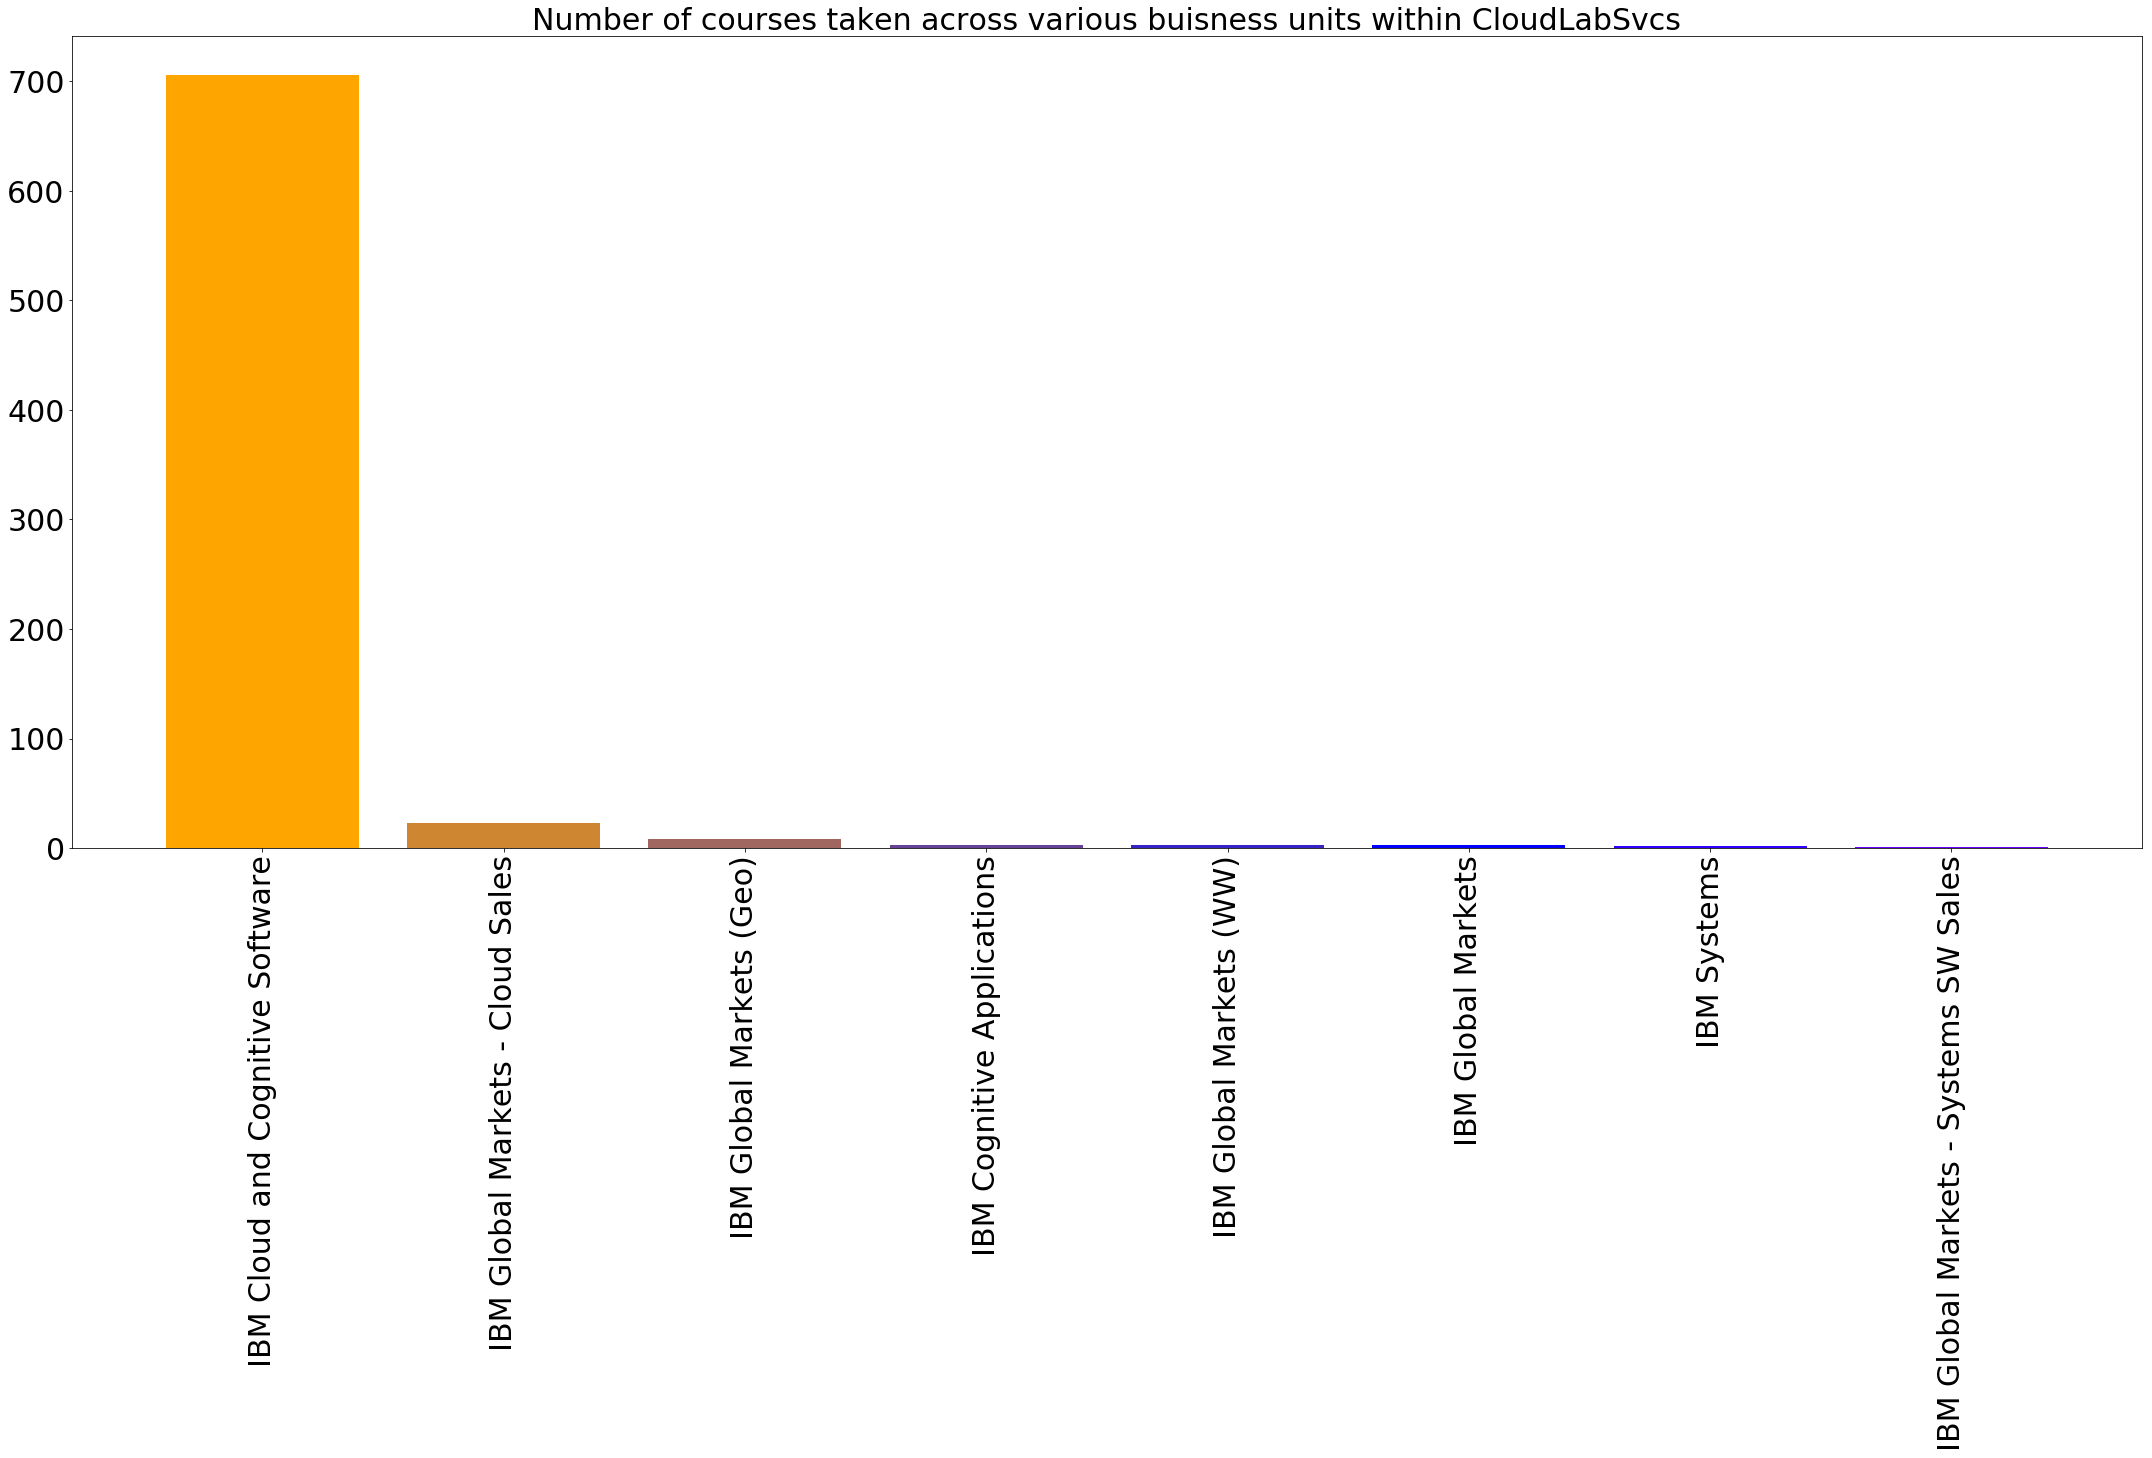

In [194]:
w = Counter(df_CloudLabSvcs['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within CloudLabSvcs', fontsize=30)
plt.show()

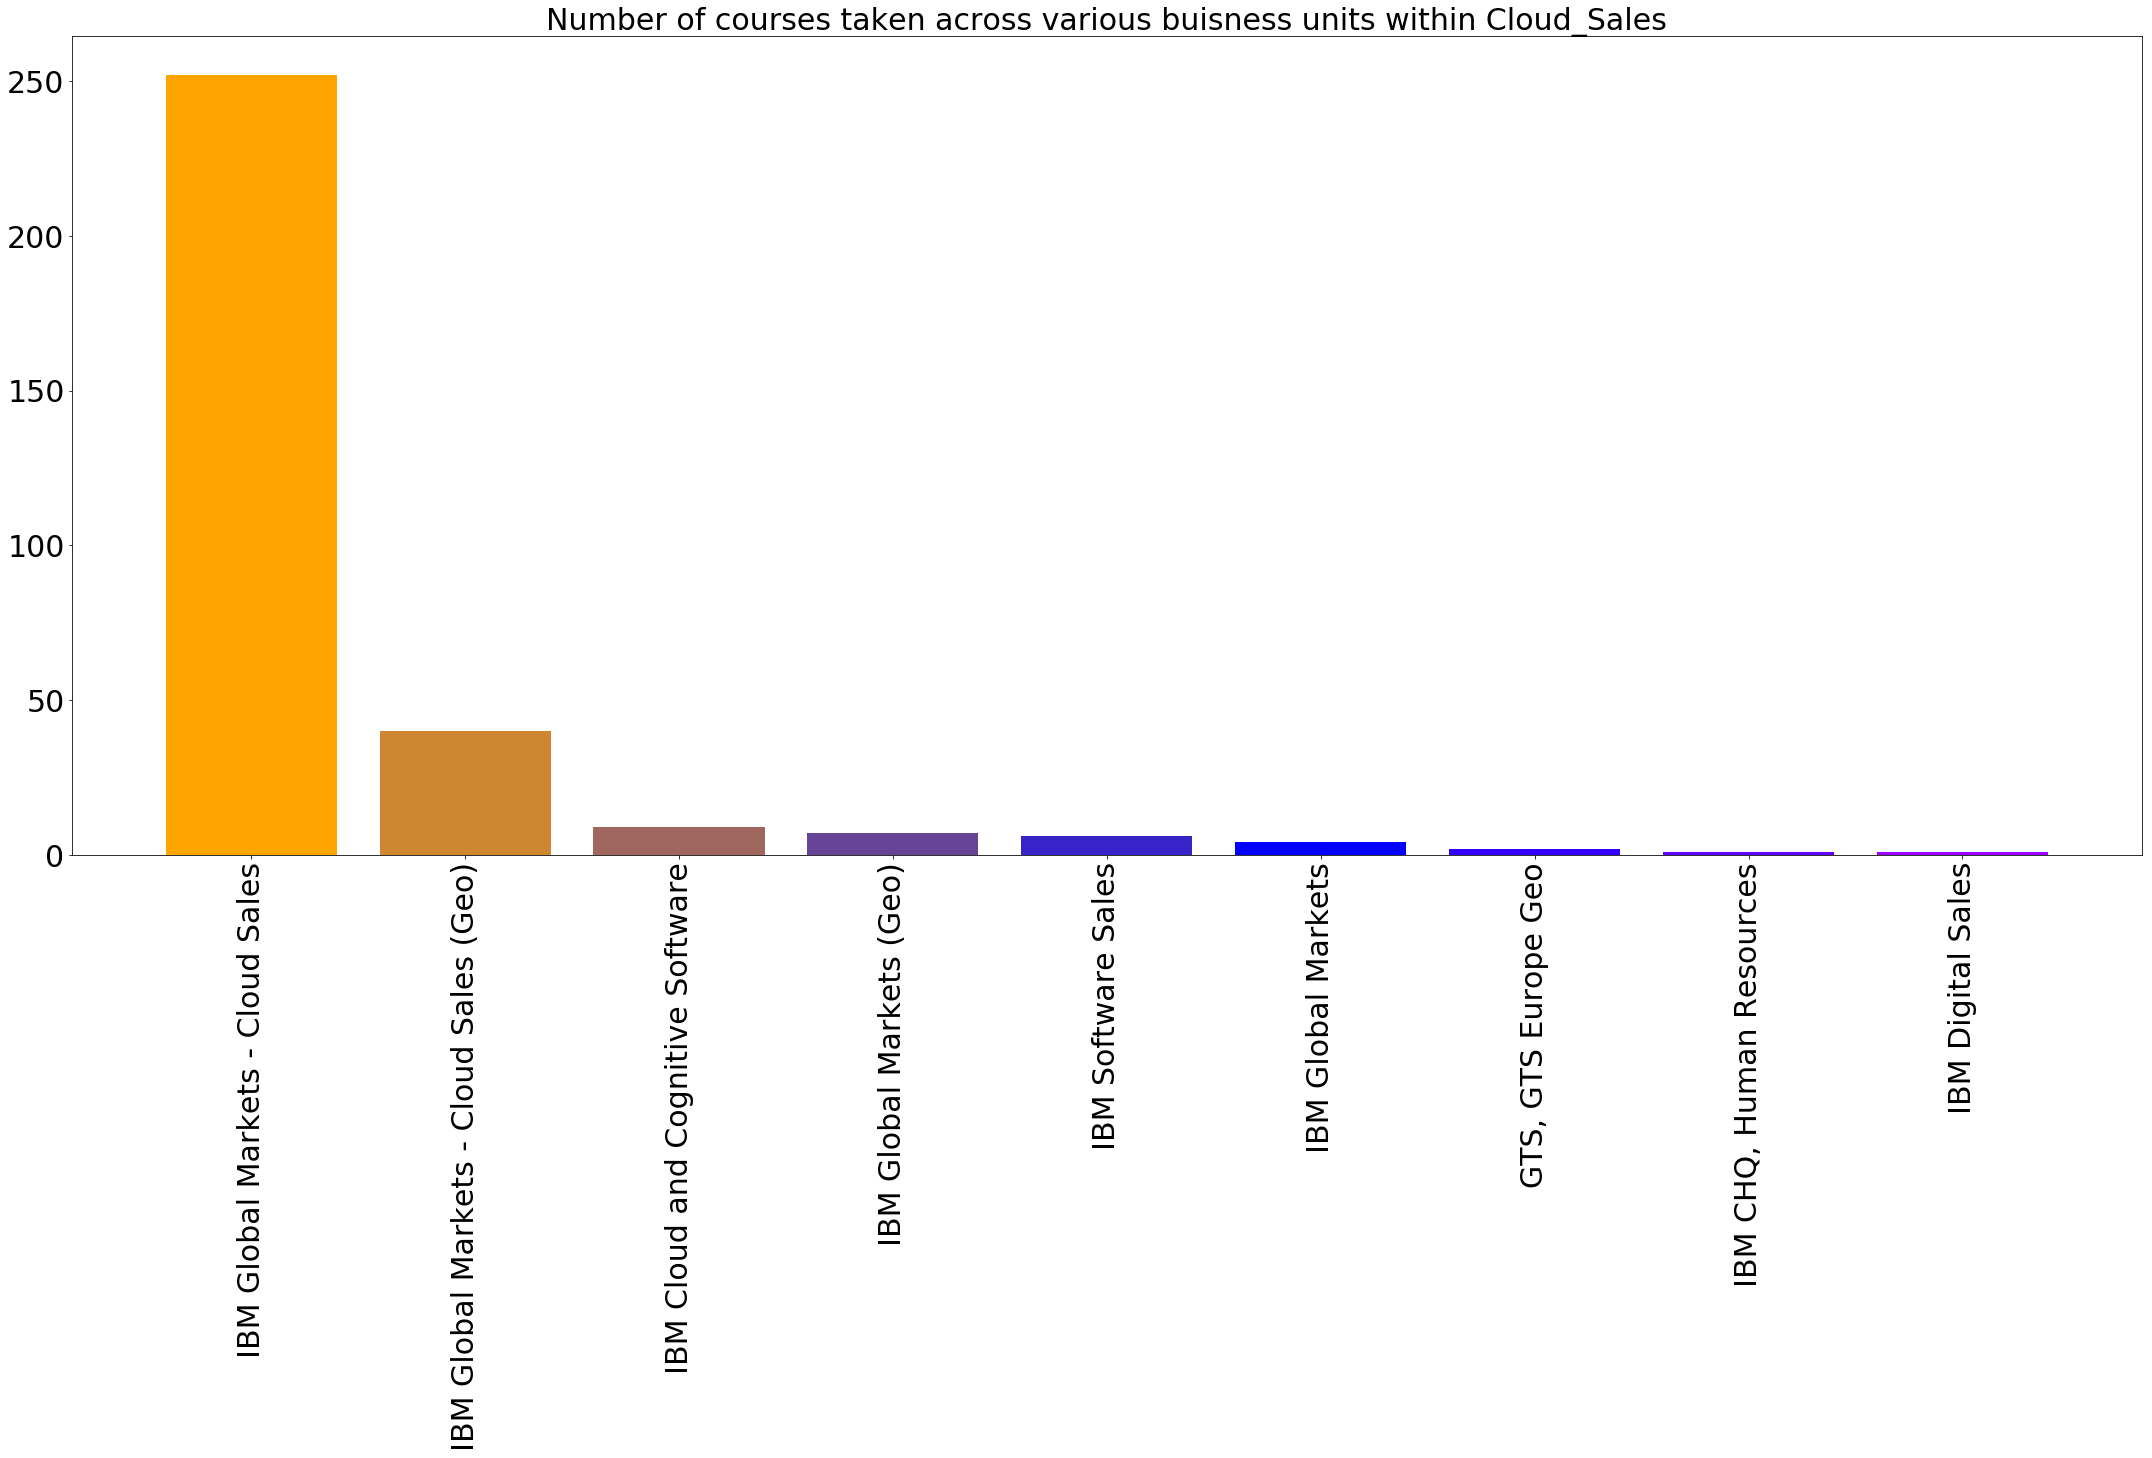

In [195]:
w = Counter(df_Cloud_Sales['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Cloud_Sales', fontsize=30)
plt.show()

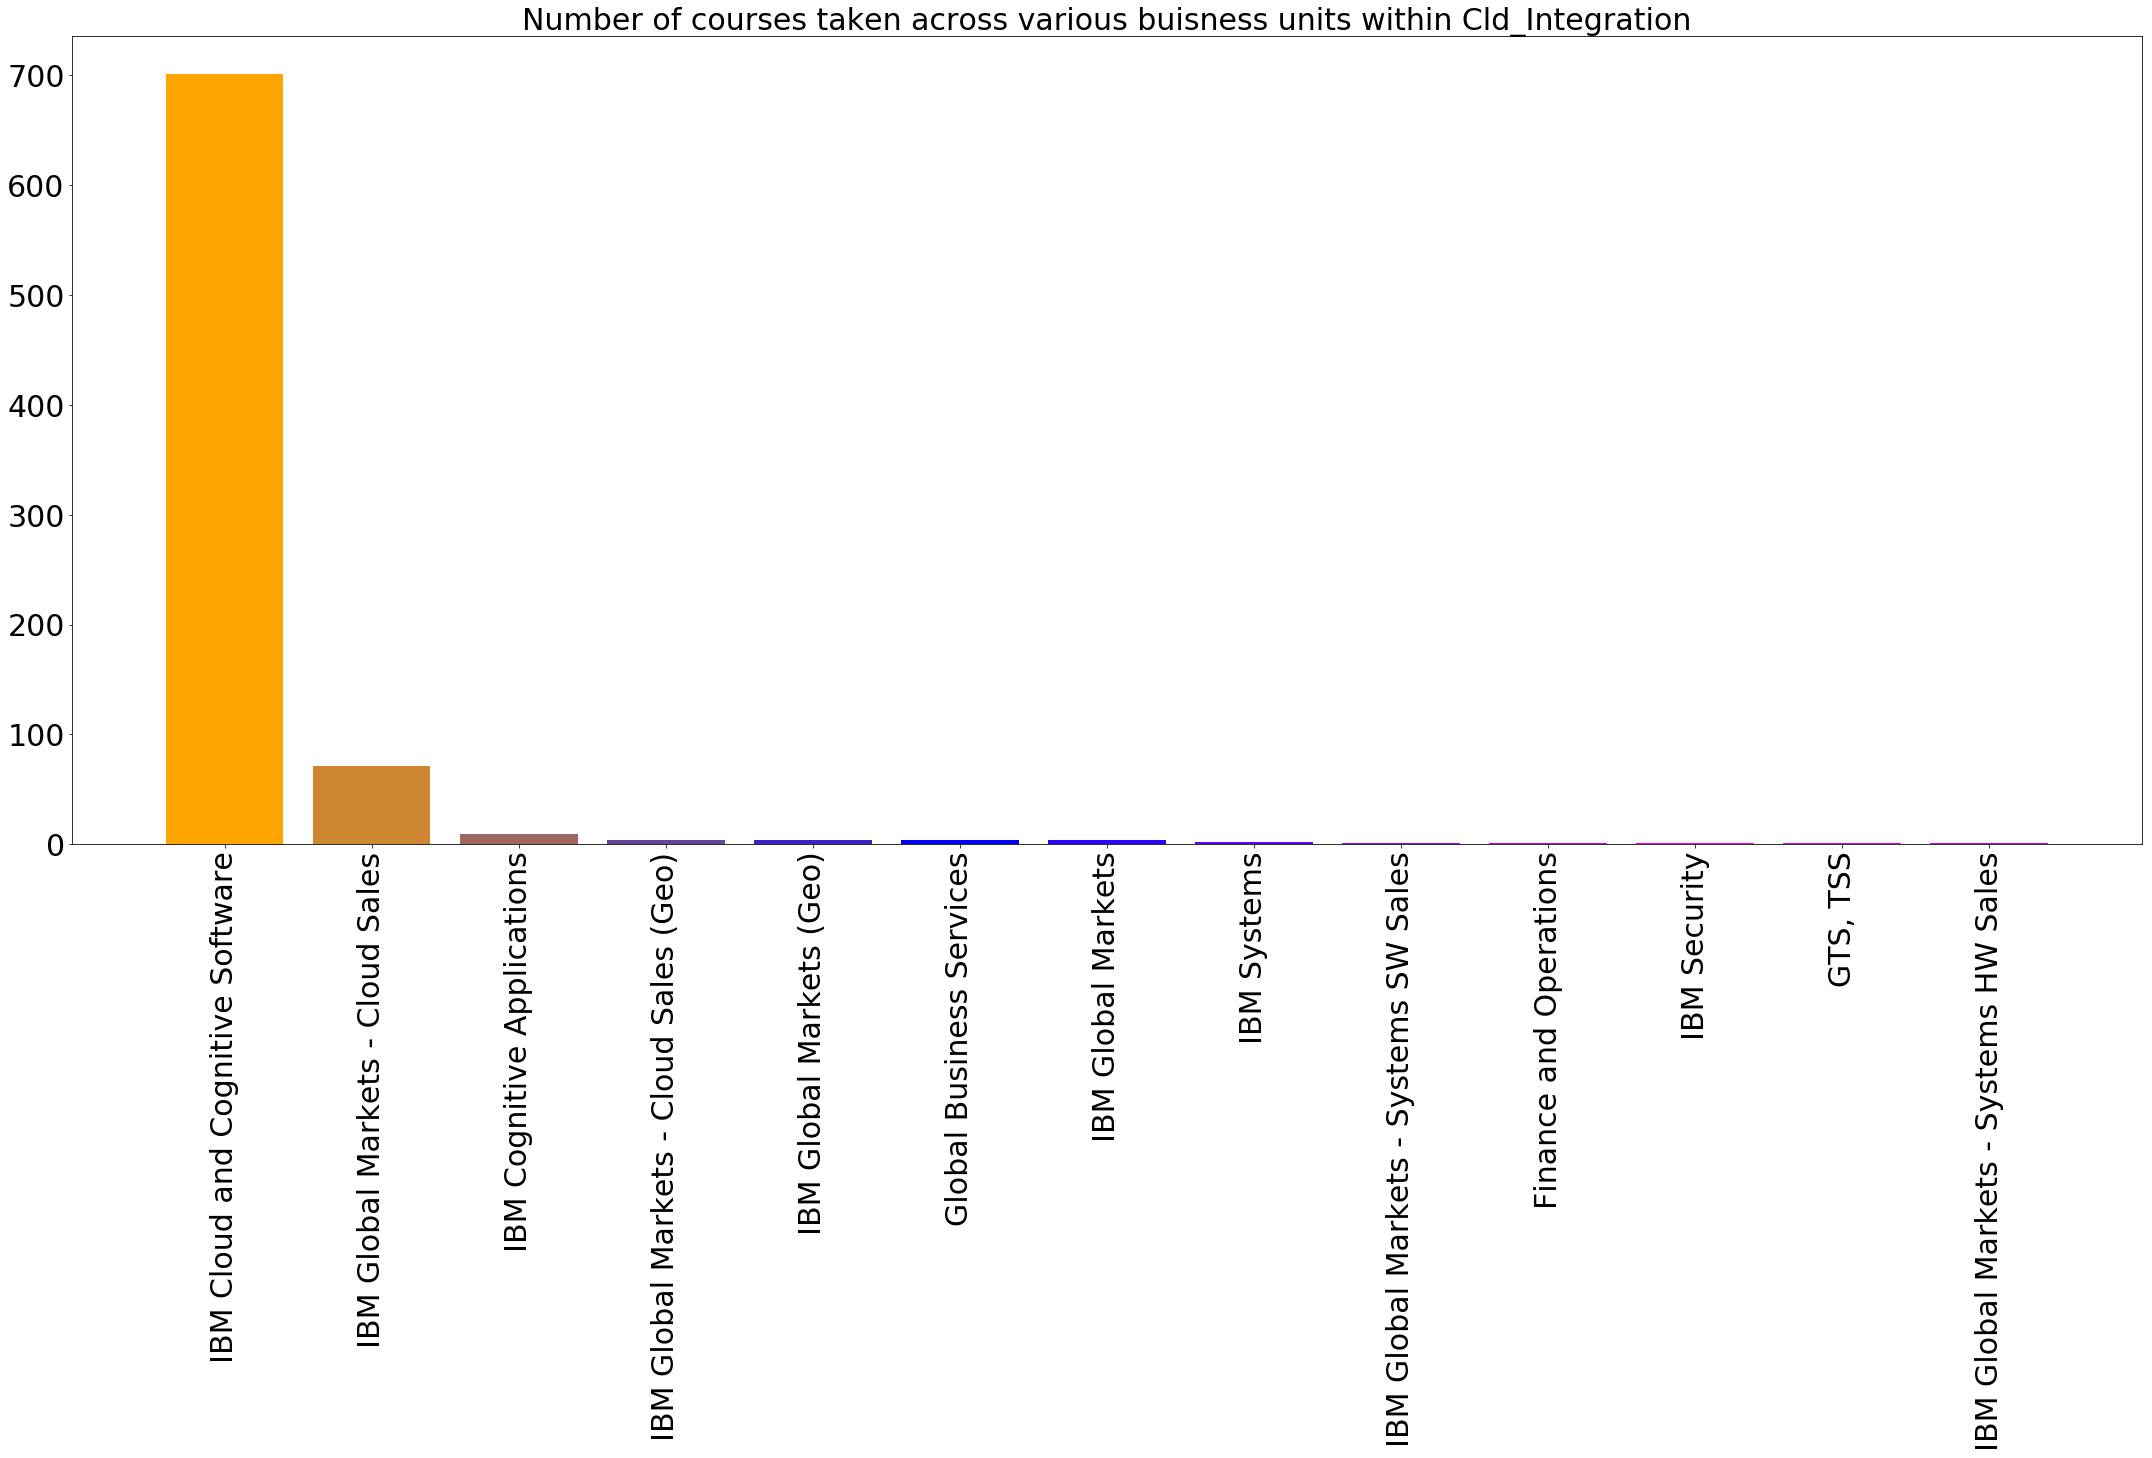

In [196]:
w = Counter(df_Cld_Integration['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Cld_Integration', fontsize=30)
plt.show()

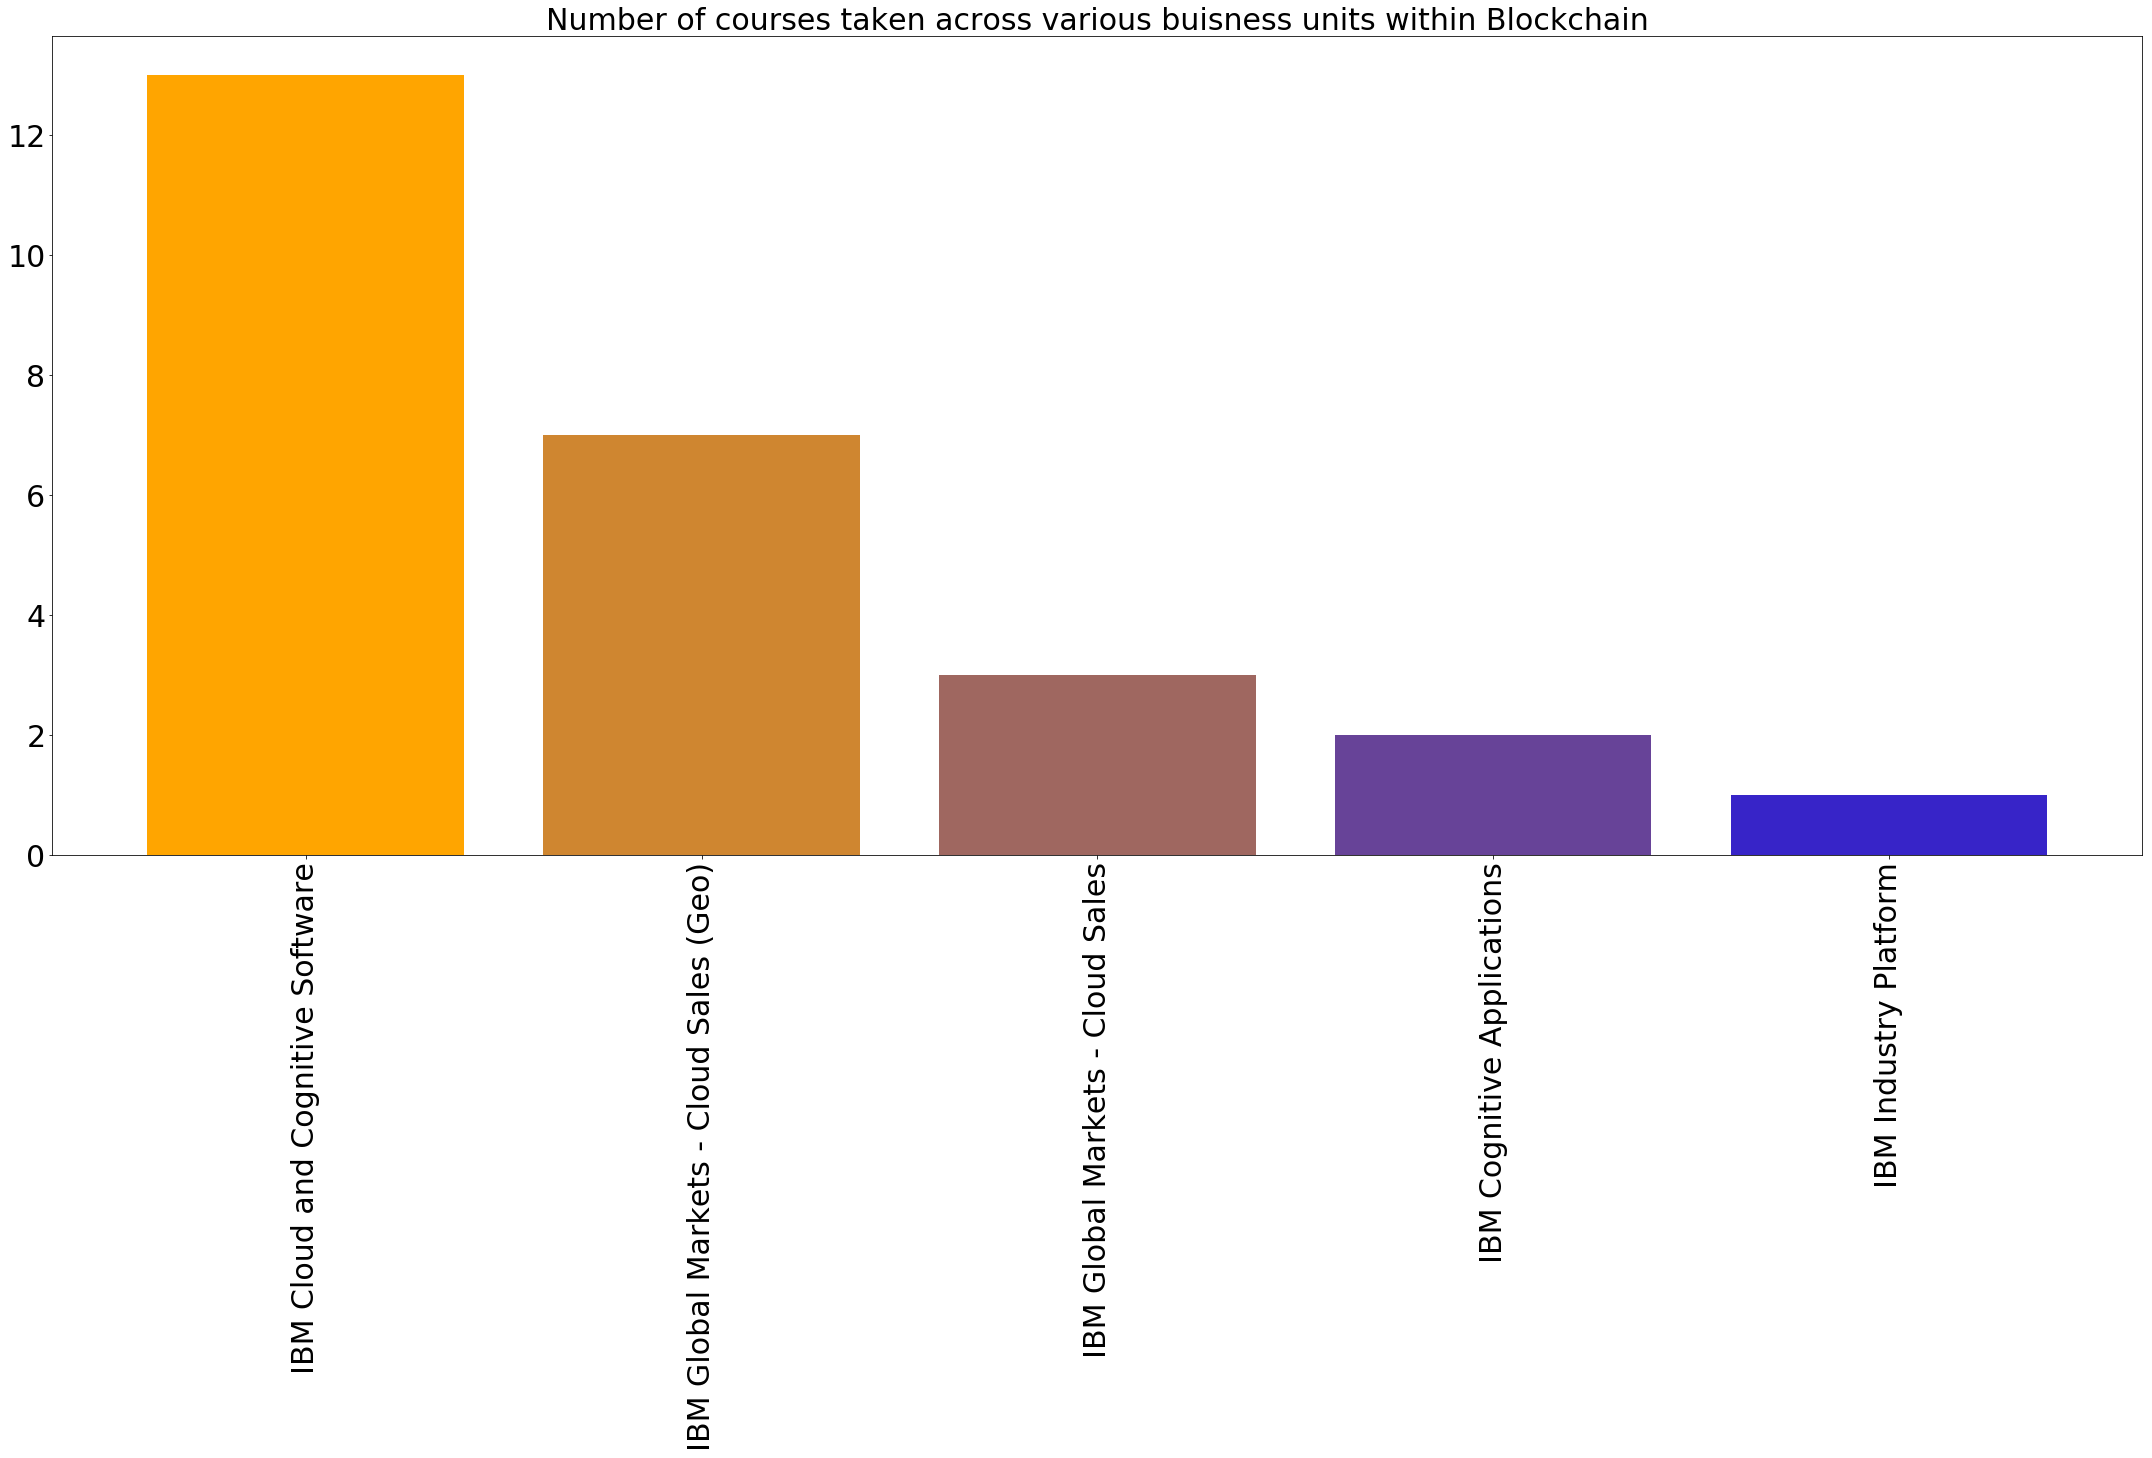

In [197]:
w = Counter(df_Blockchain['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Blockchain', fontsize=30)
plt.show()

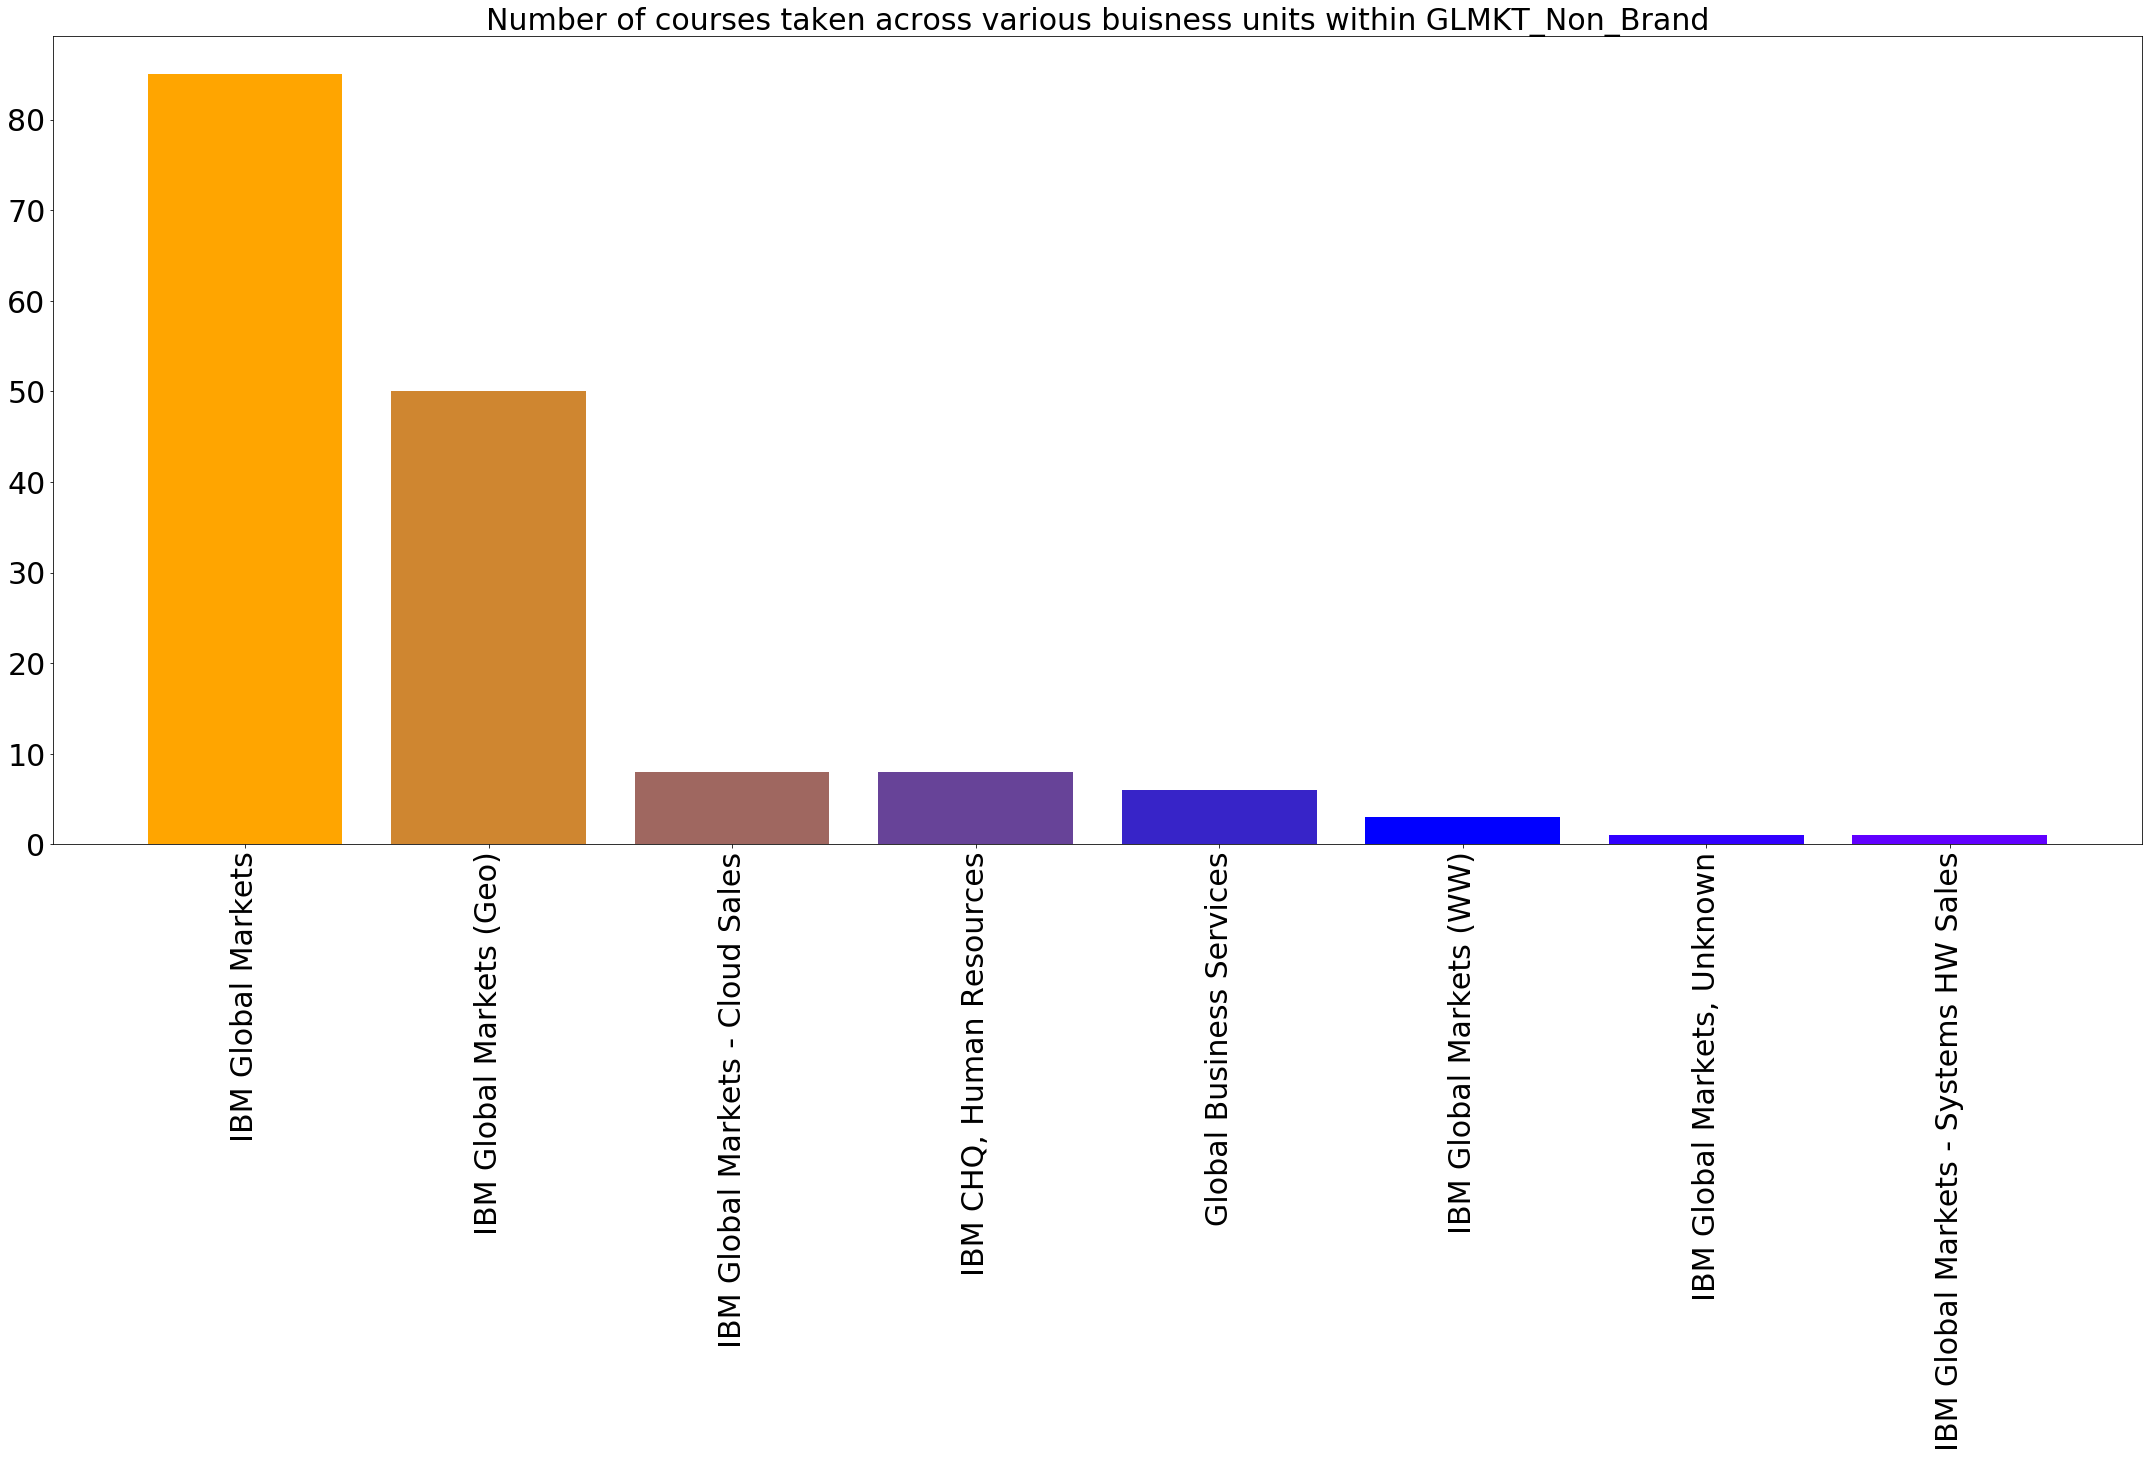

In [198]:
w = Counter(df_GLMKT_Non_Brand['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within GLMKT_Non_Brand', fontsize=30)
plt.show()

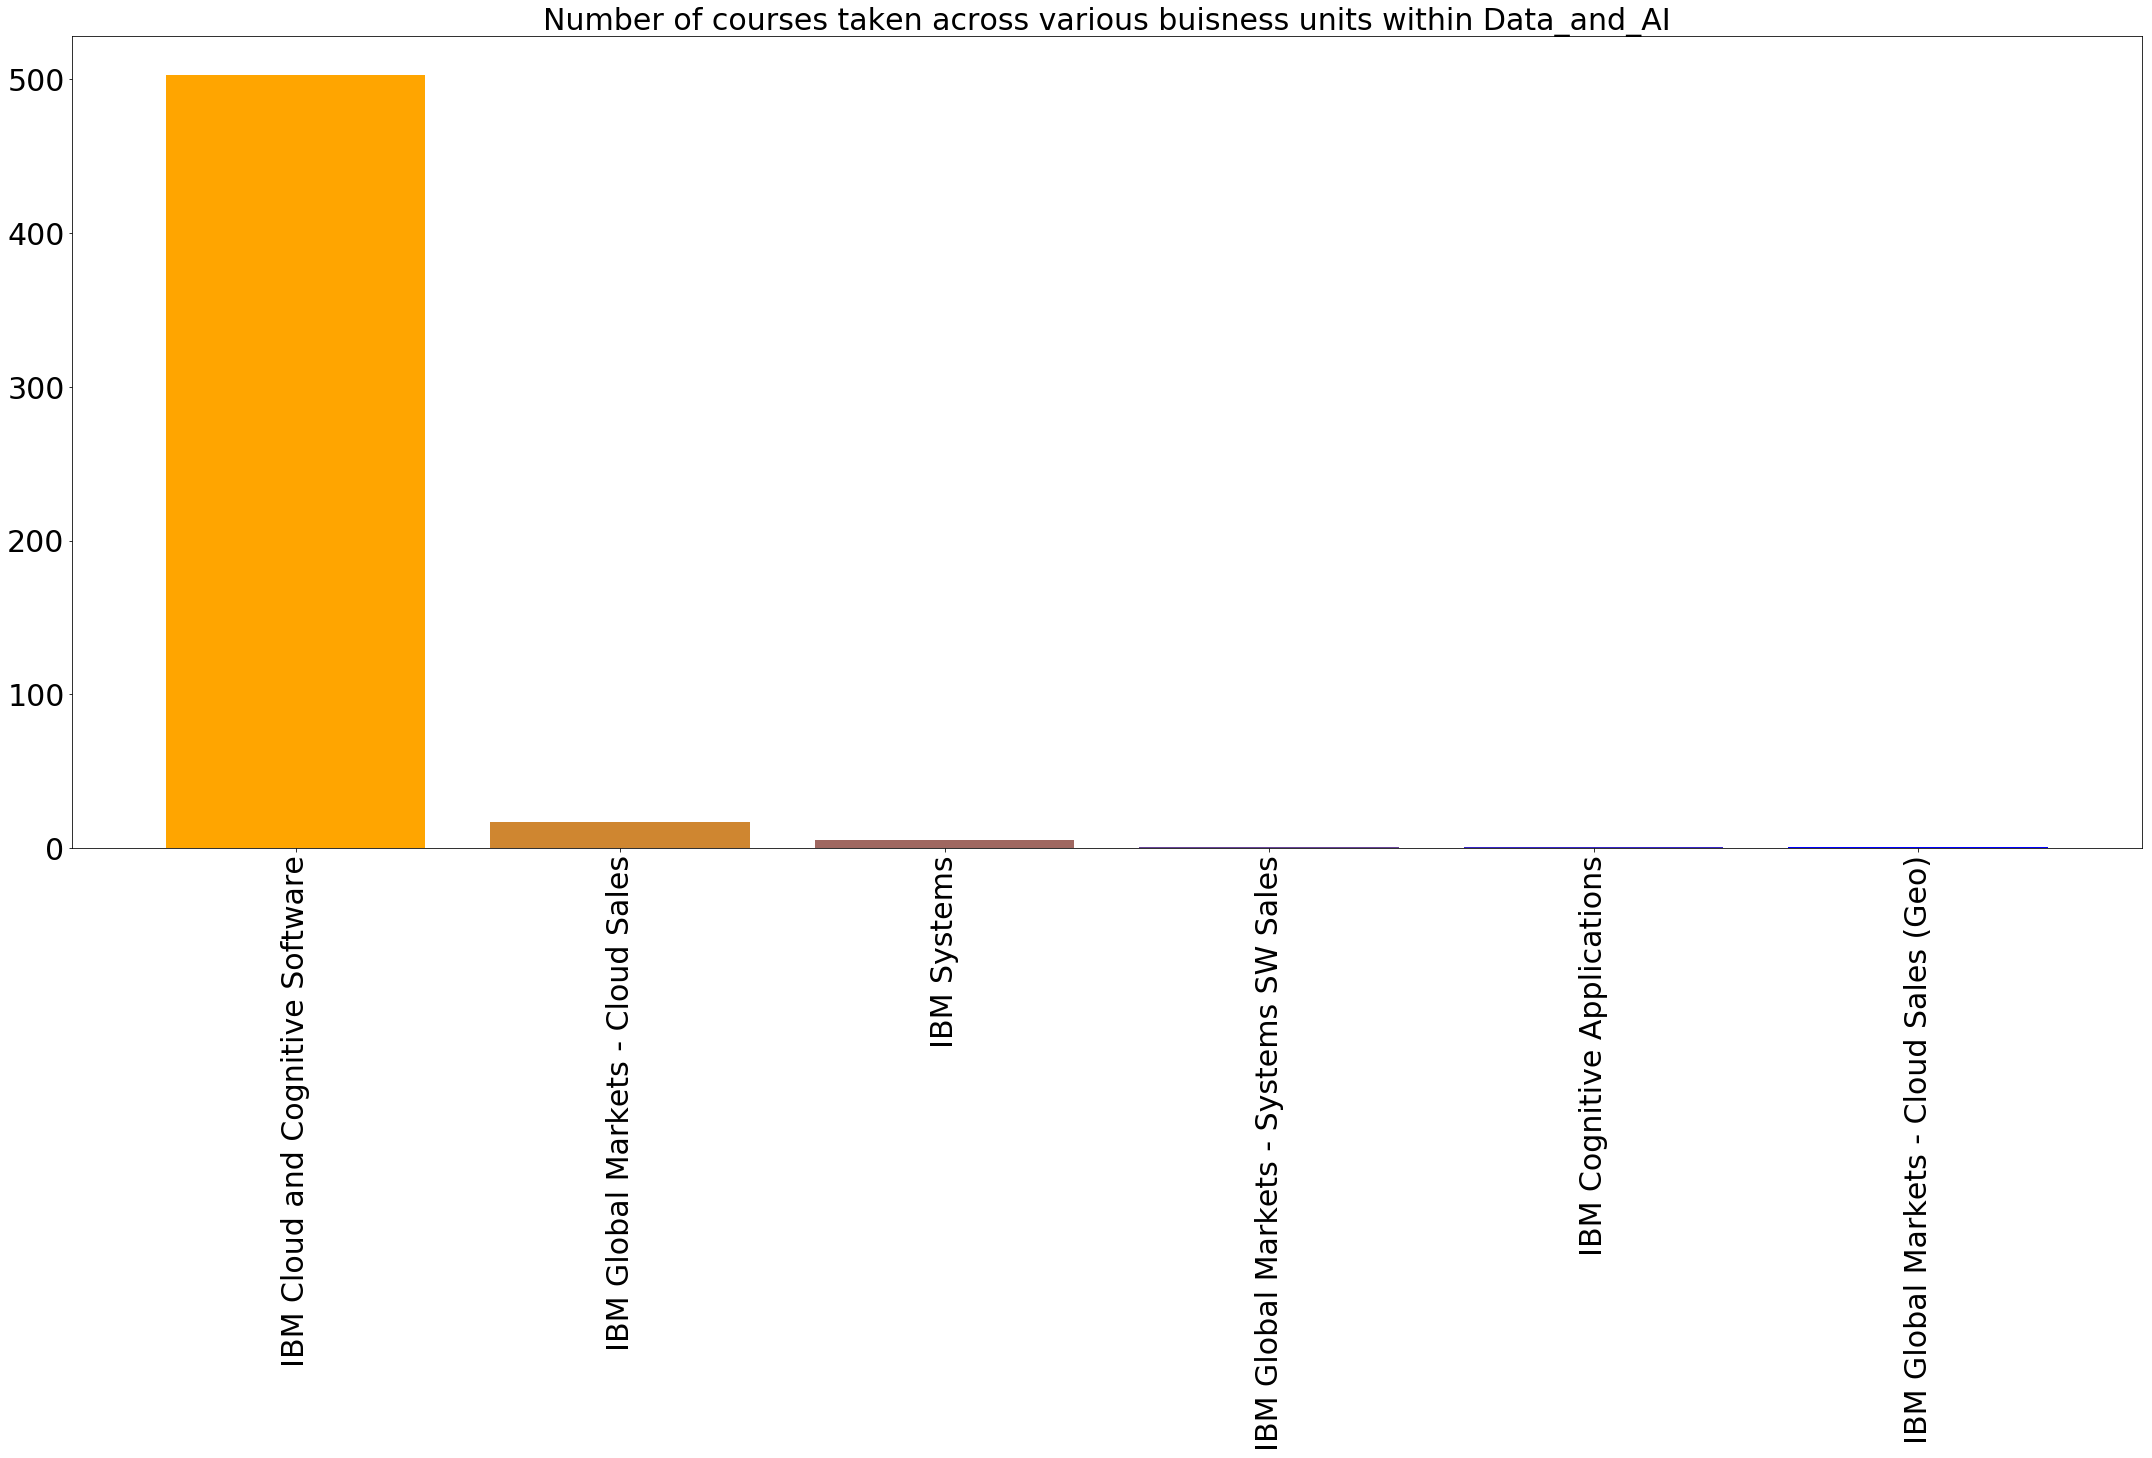

In [199]:
w = Counter(df_Data_and_AI['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Data_and_AI', fontsize=30)
plt.show()

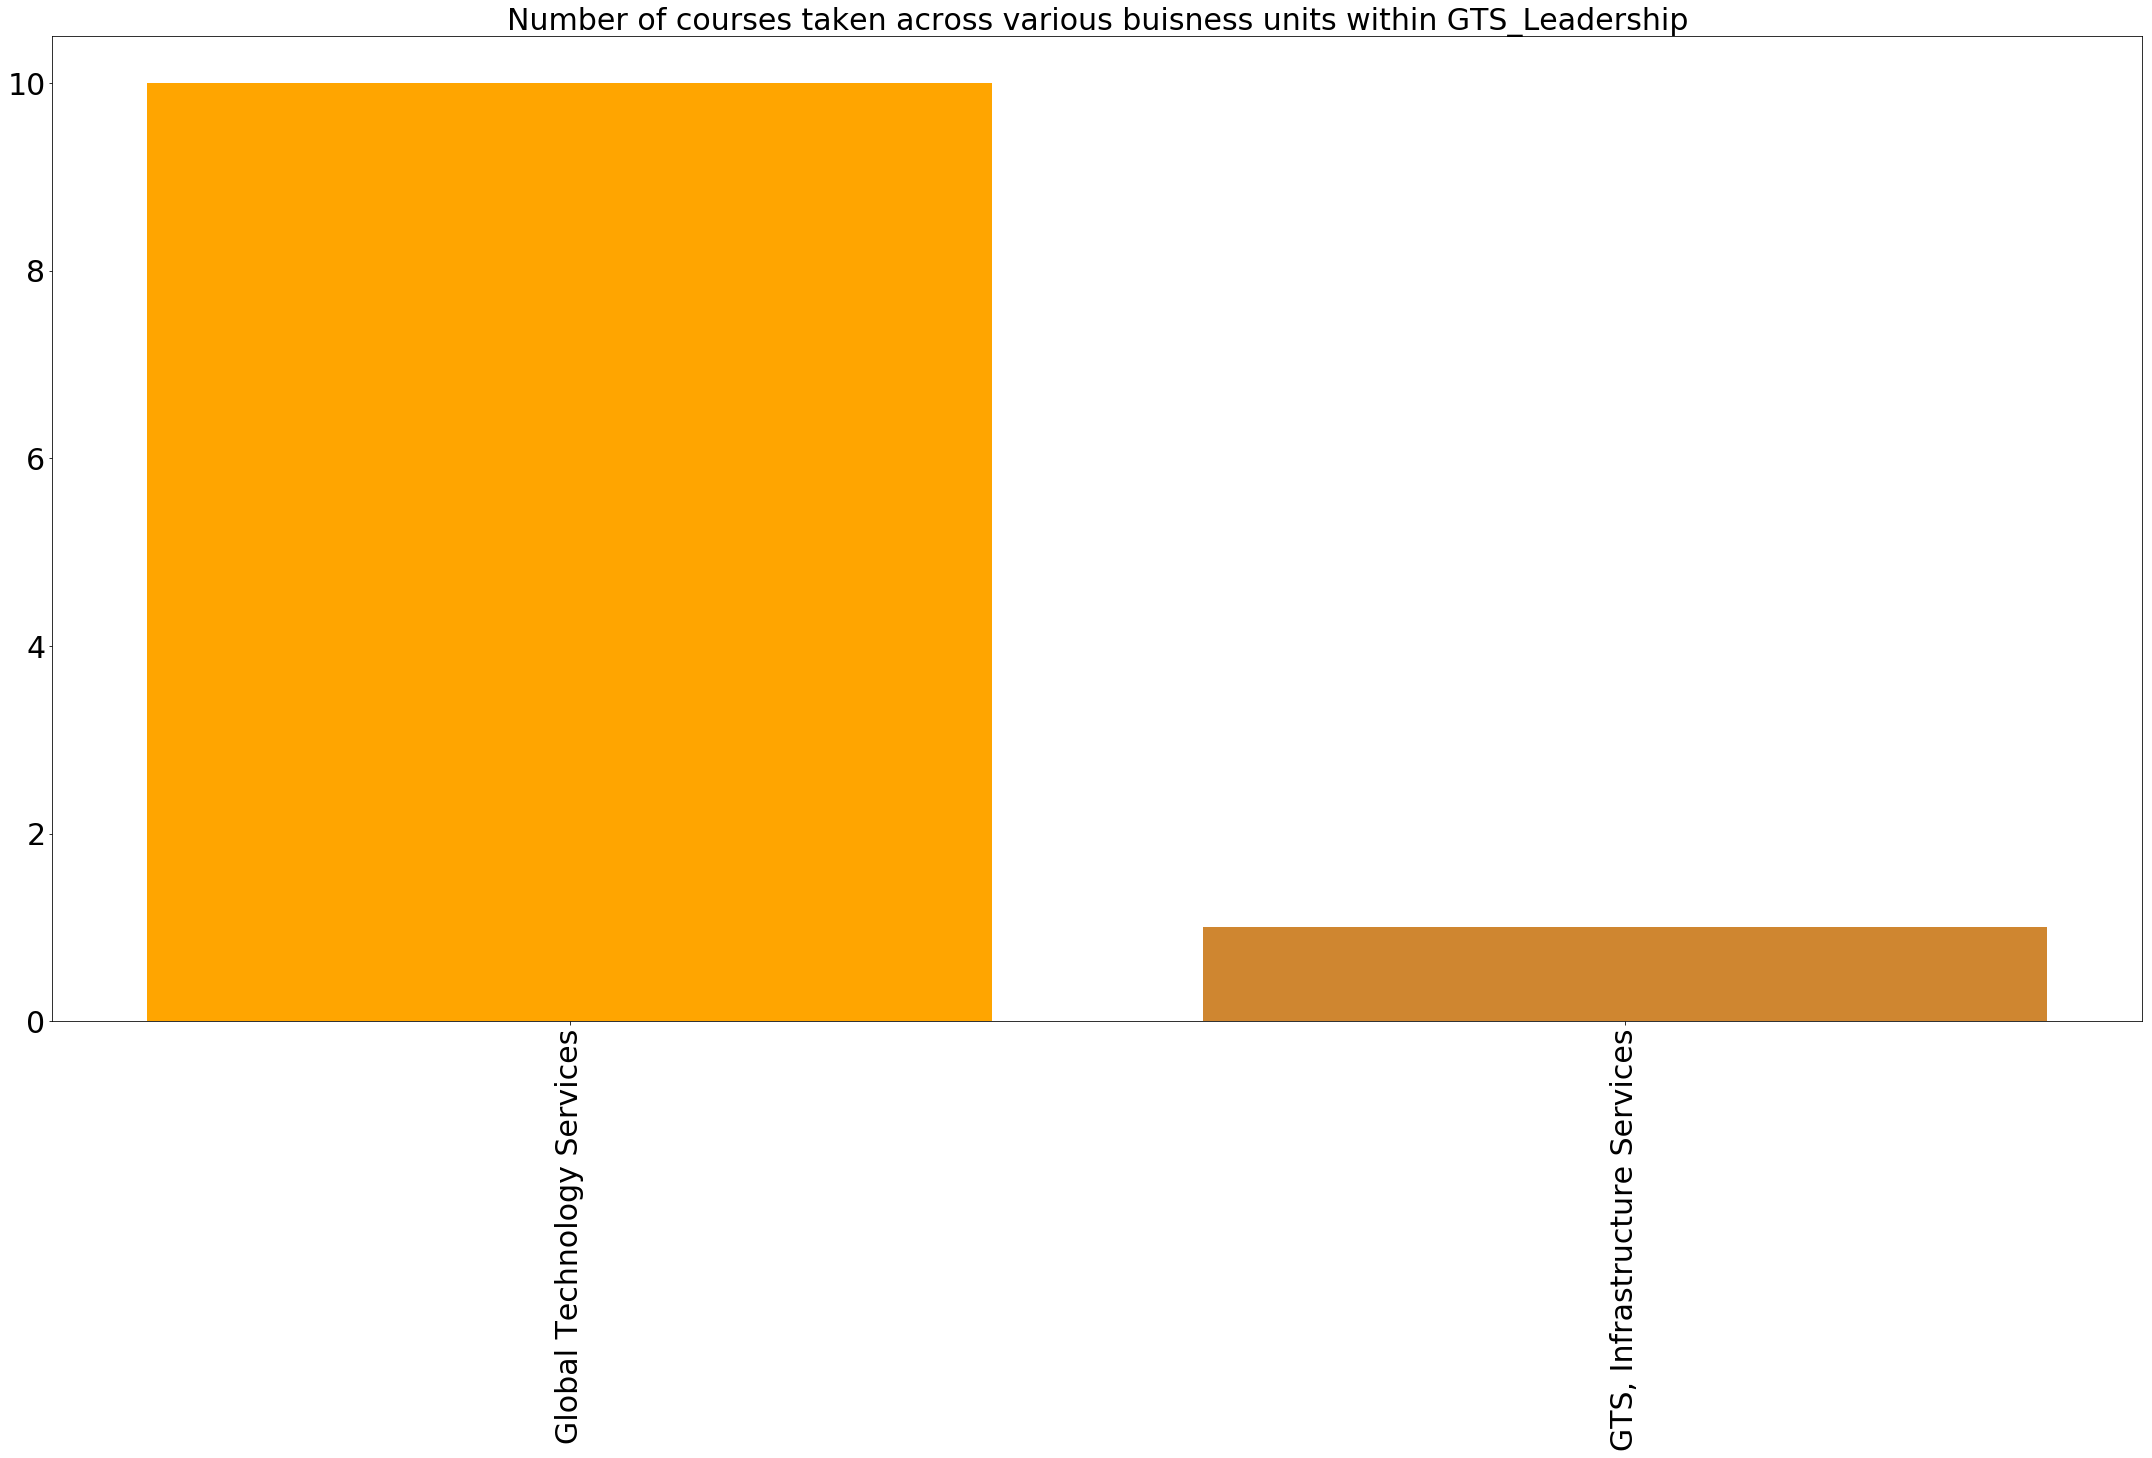

In [200]:
w = Counter(df_GTS_Leadership['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within GTS_Leadership', fontsize=30)
plt.show()

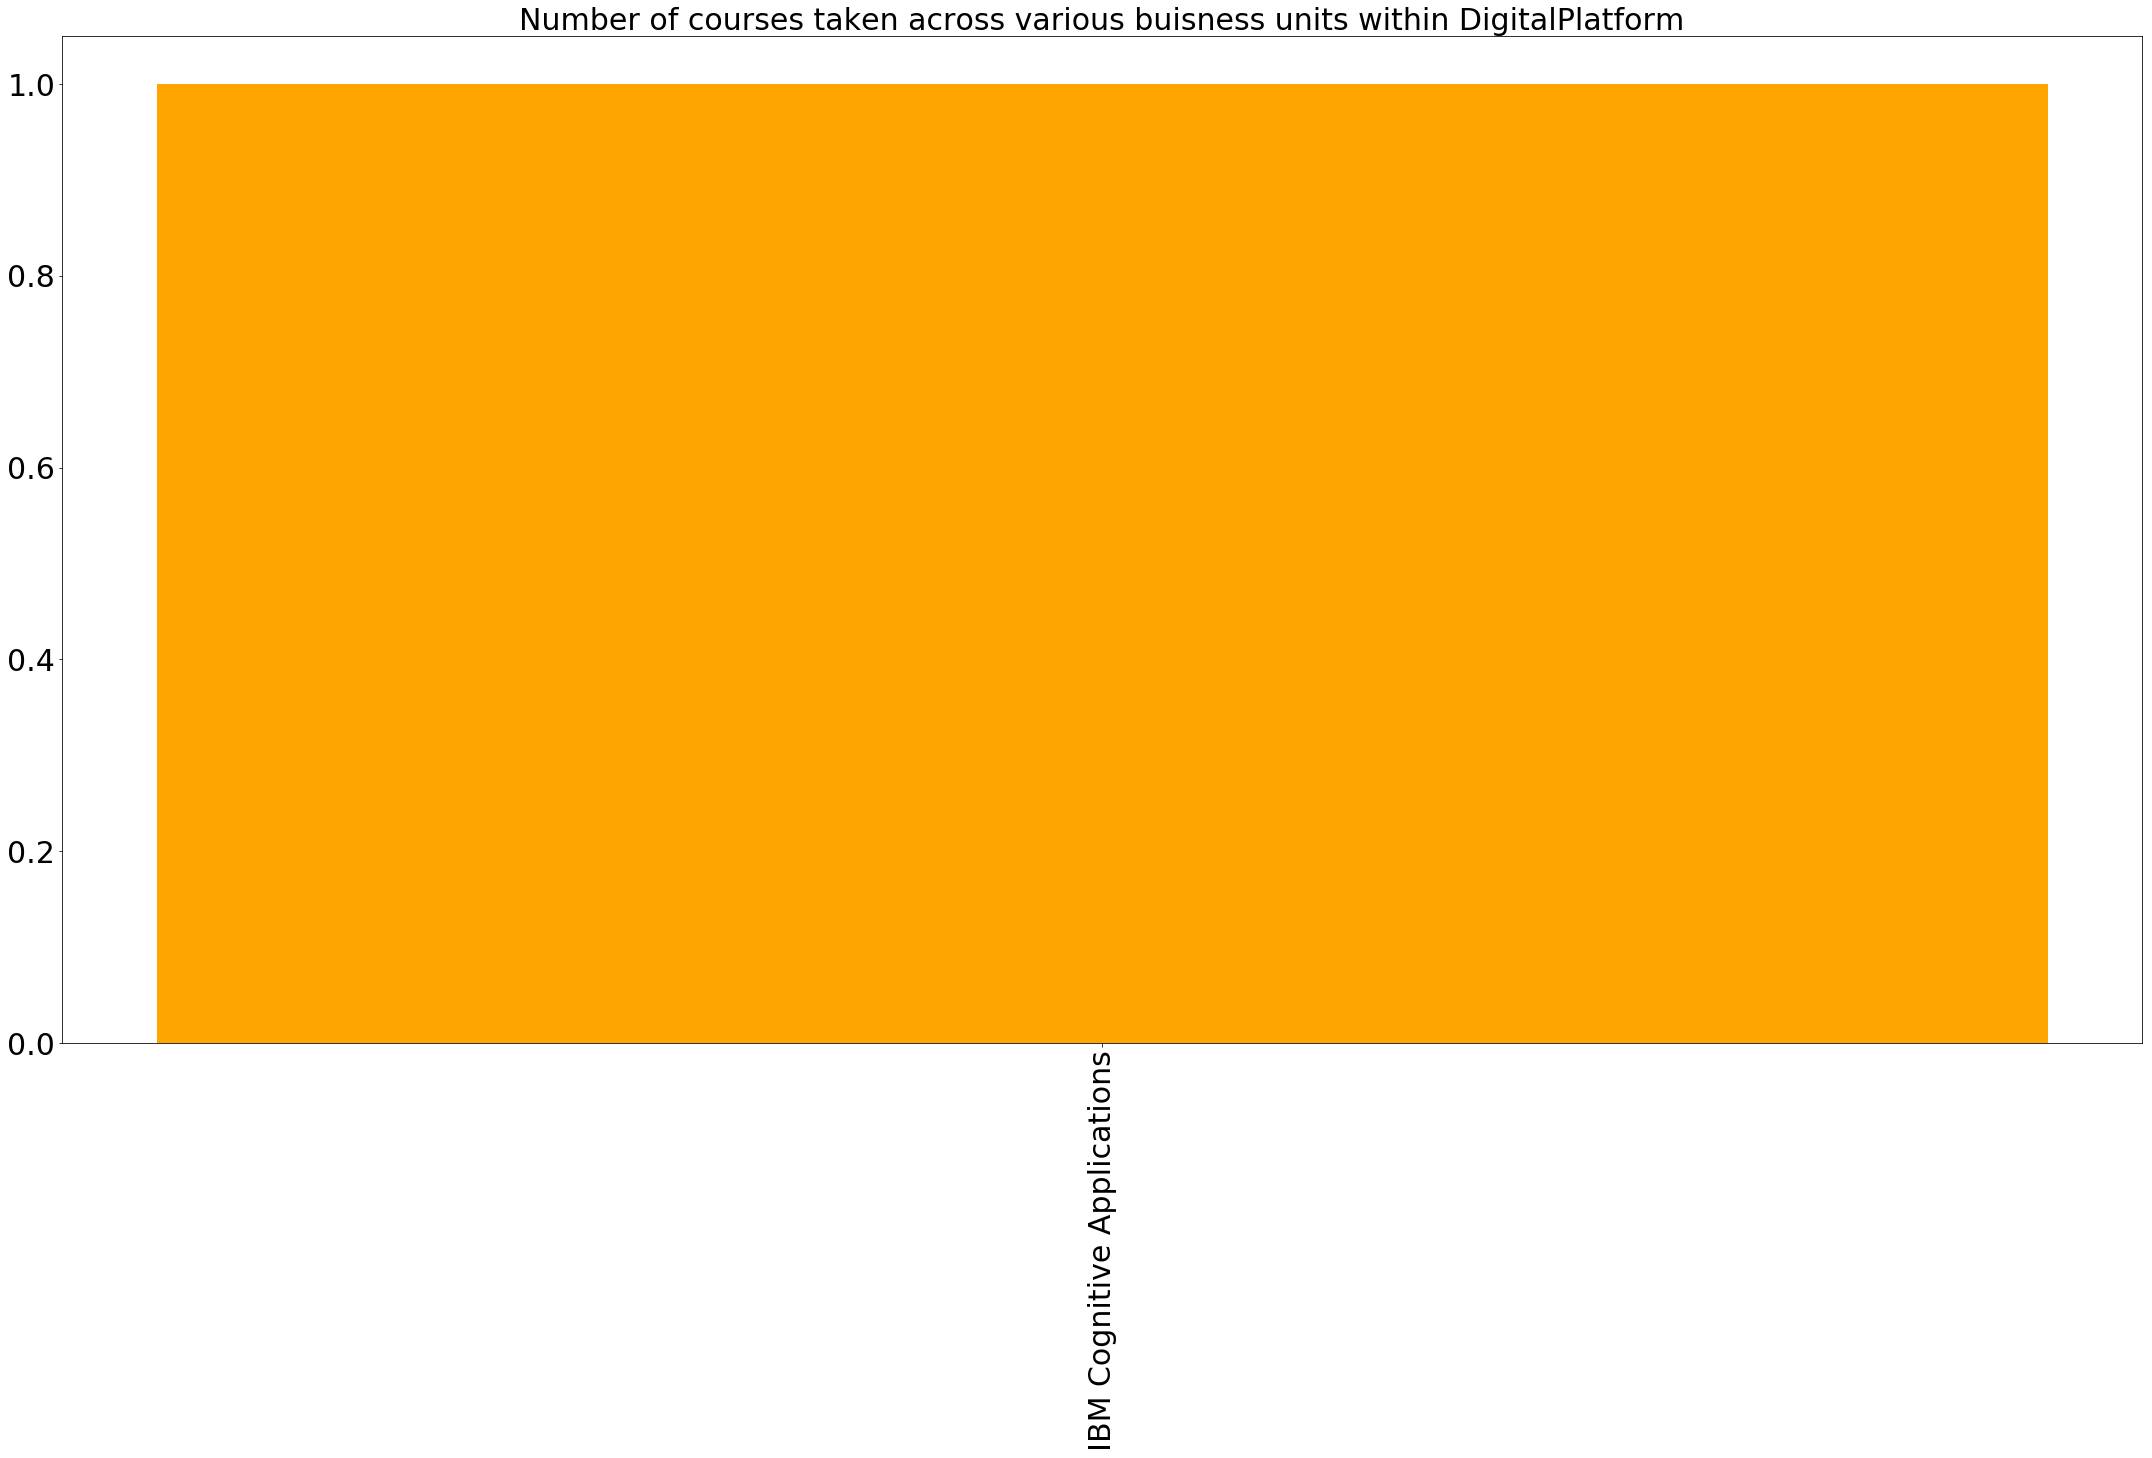

In [201]:
w = Counter(df_DigitalPlatform['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within DigitalPlatform', fontsize=30)
plt.show()

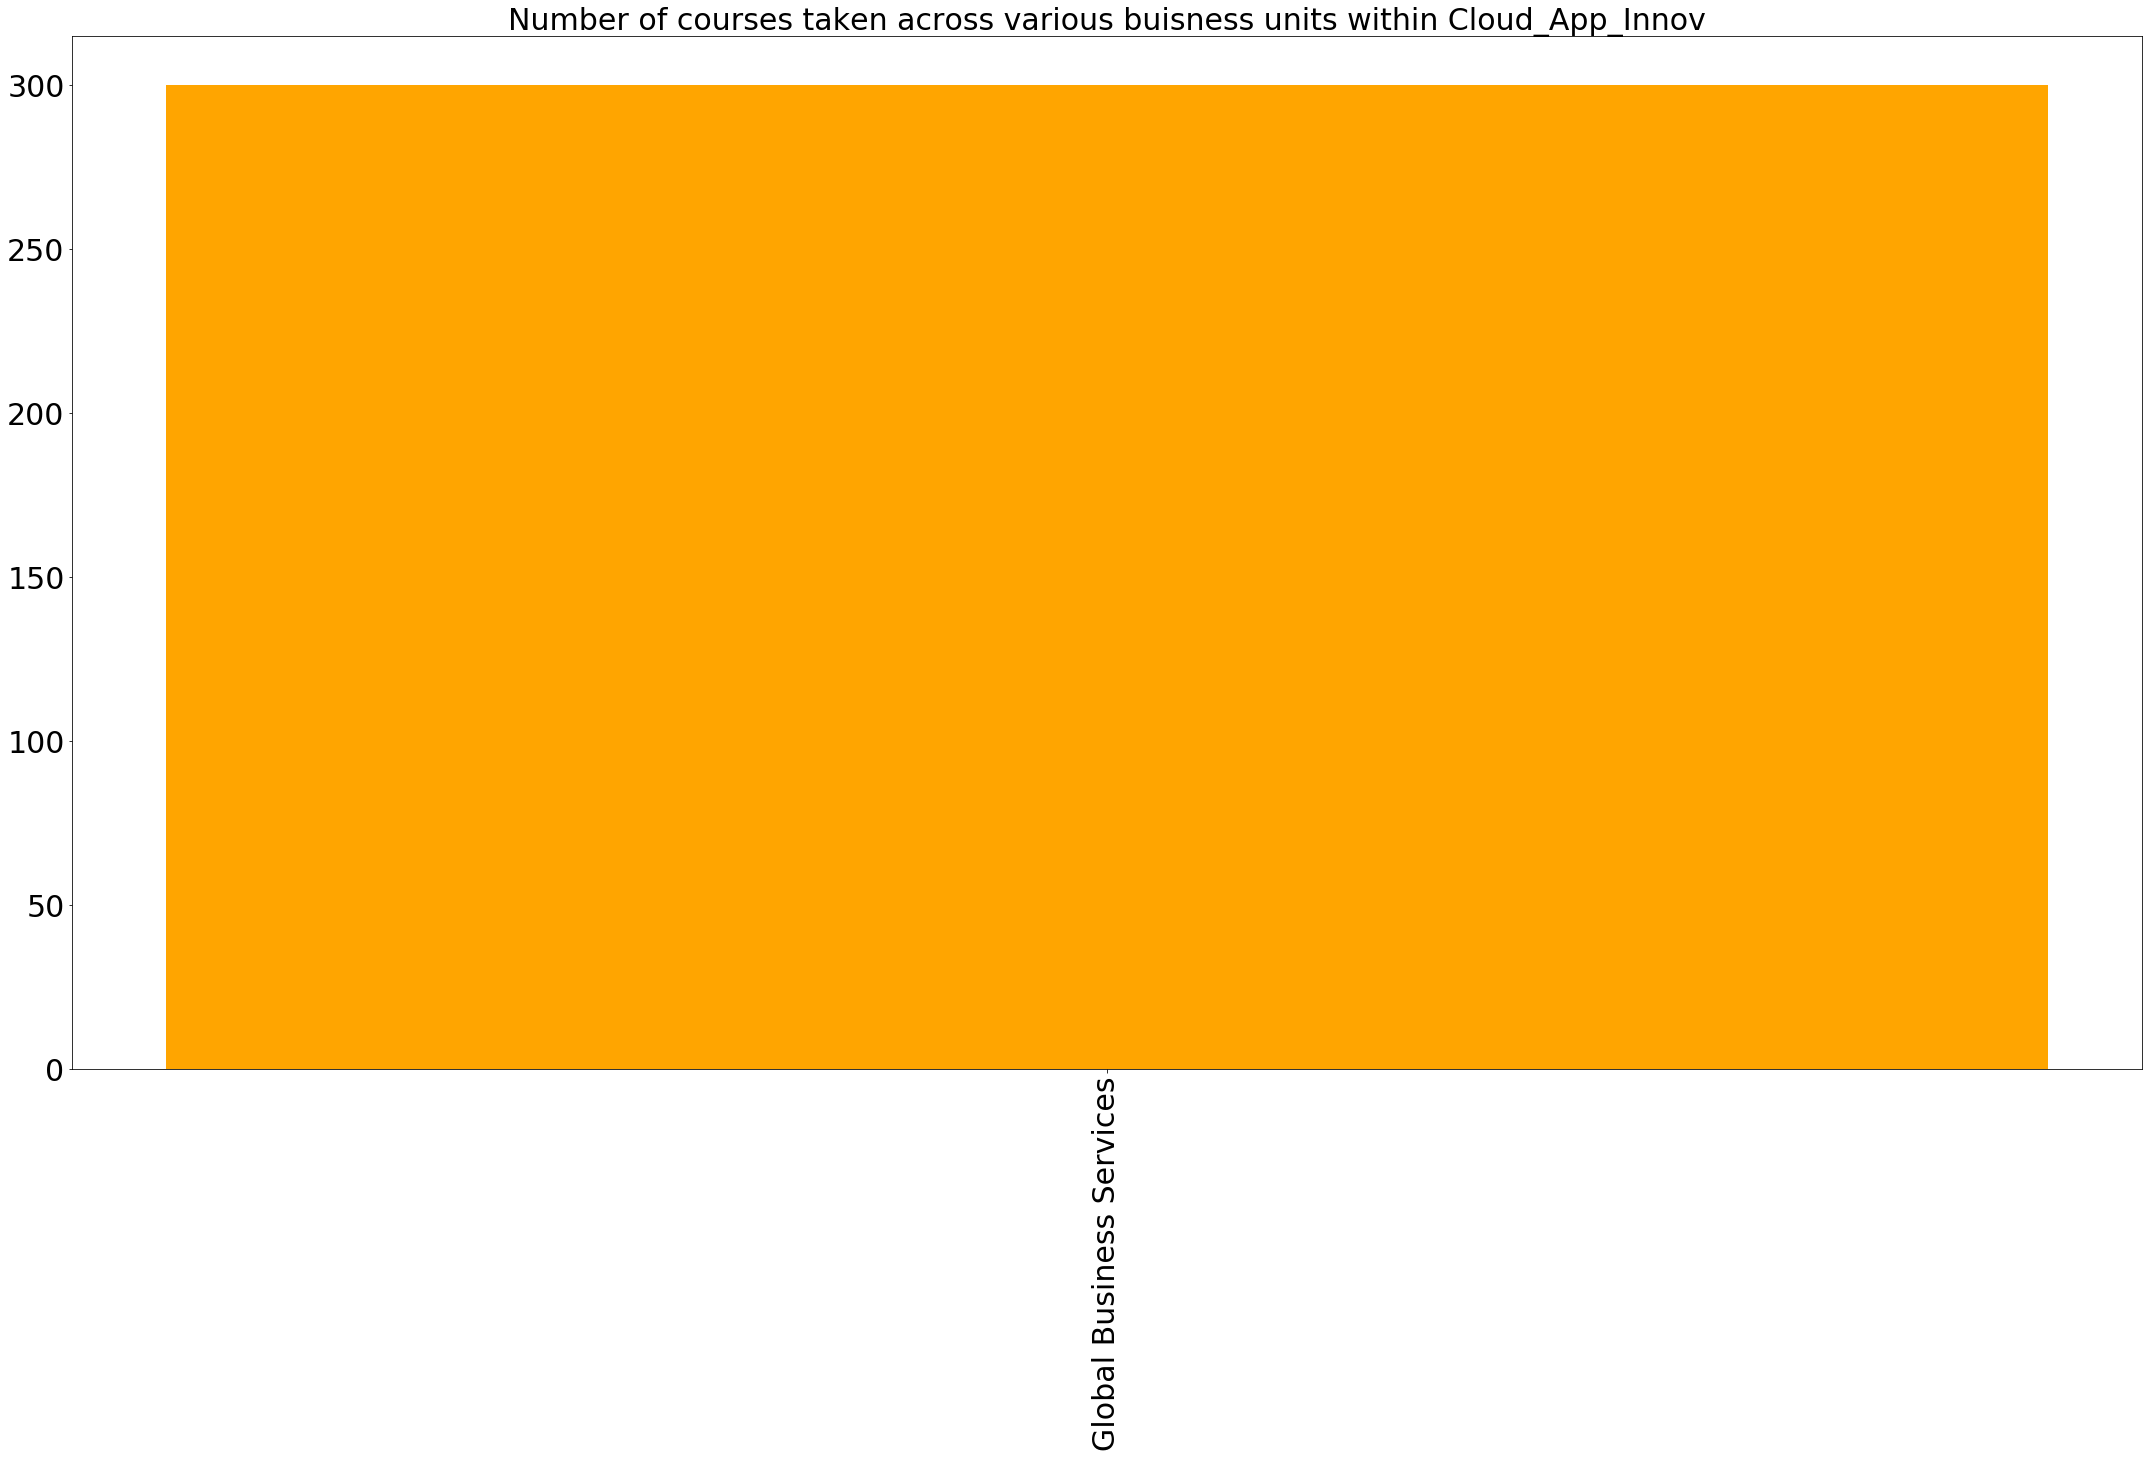

In [202]:
w = Counter(df_Cloud_App_Innov['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Cloud_App_Innov', fontsize=30)
plt.show()

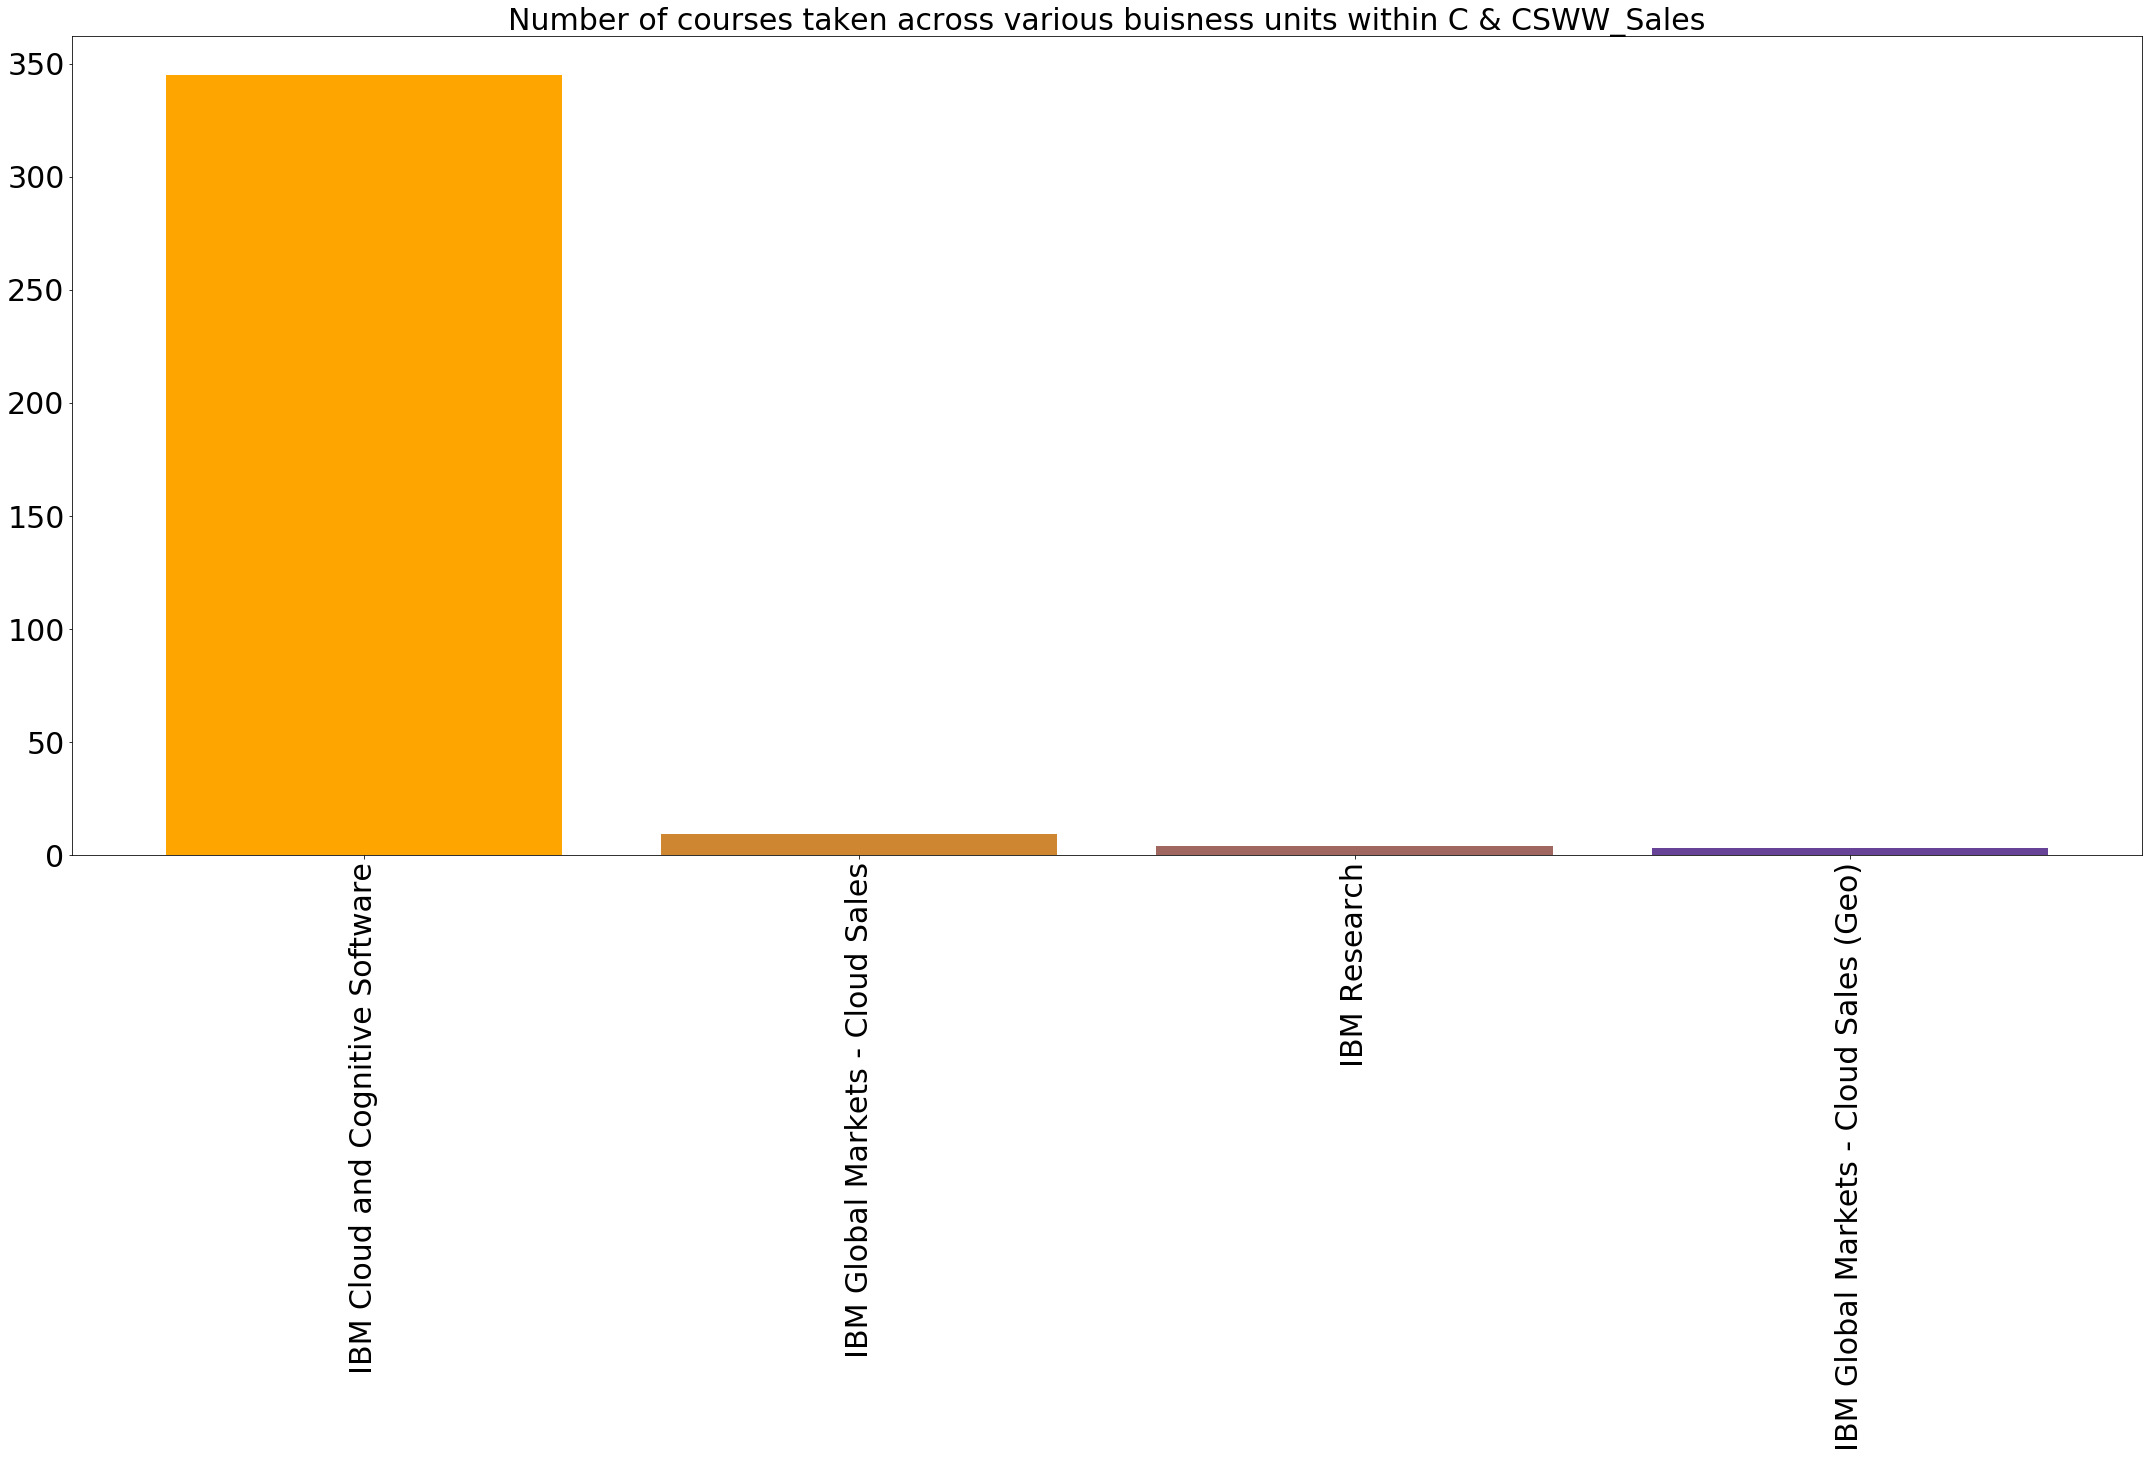

In [203]:
w = Counter(df_C_and_CS_WW_Sales['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within C & CSWW_Sales', fontsize=30)
plt.show()

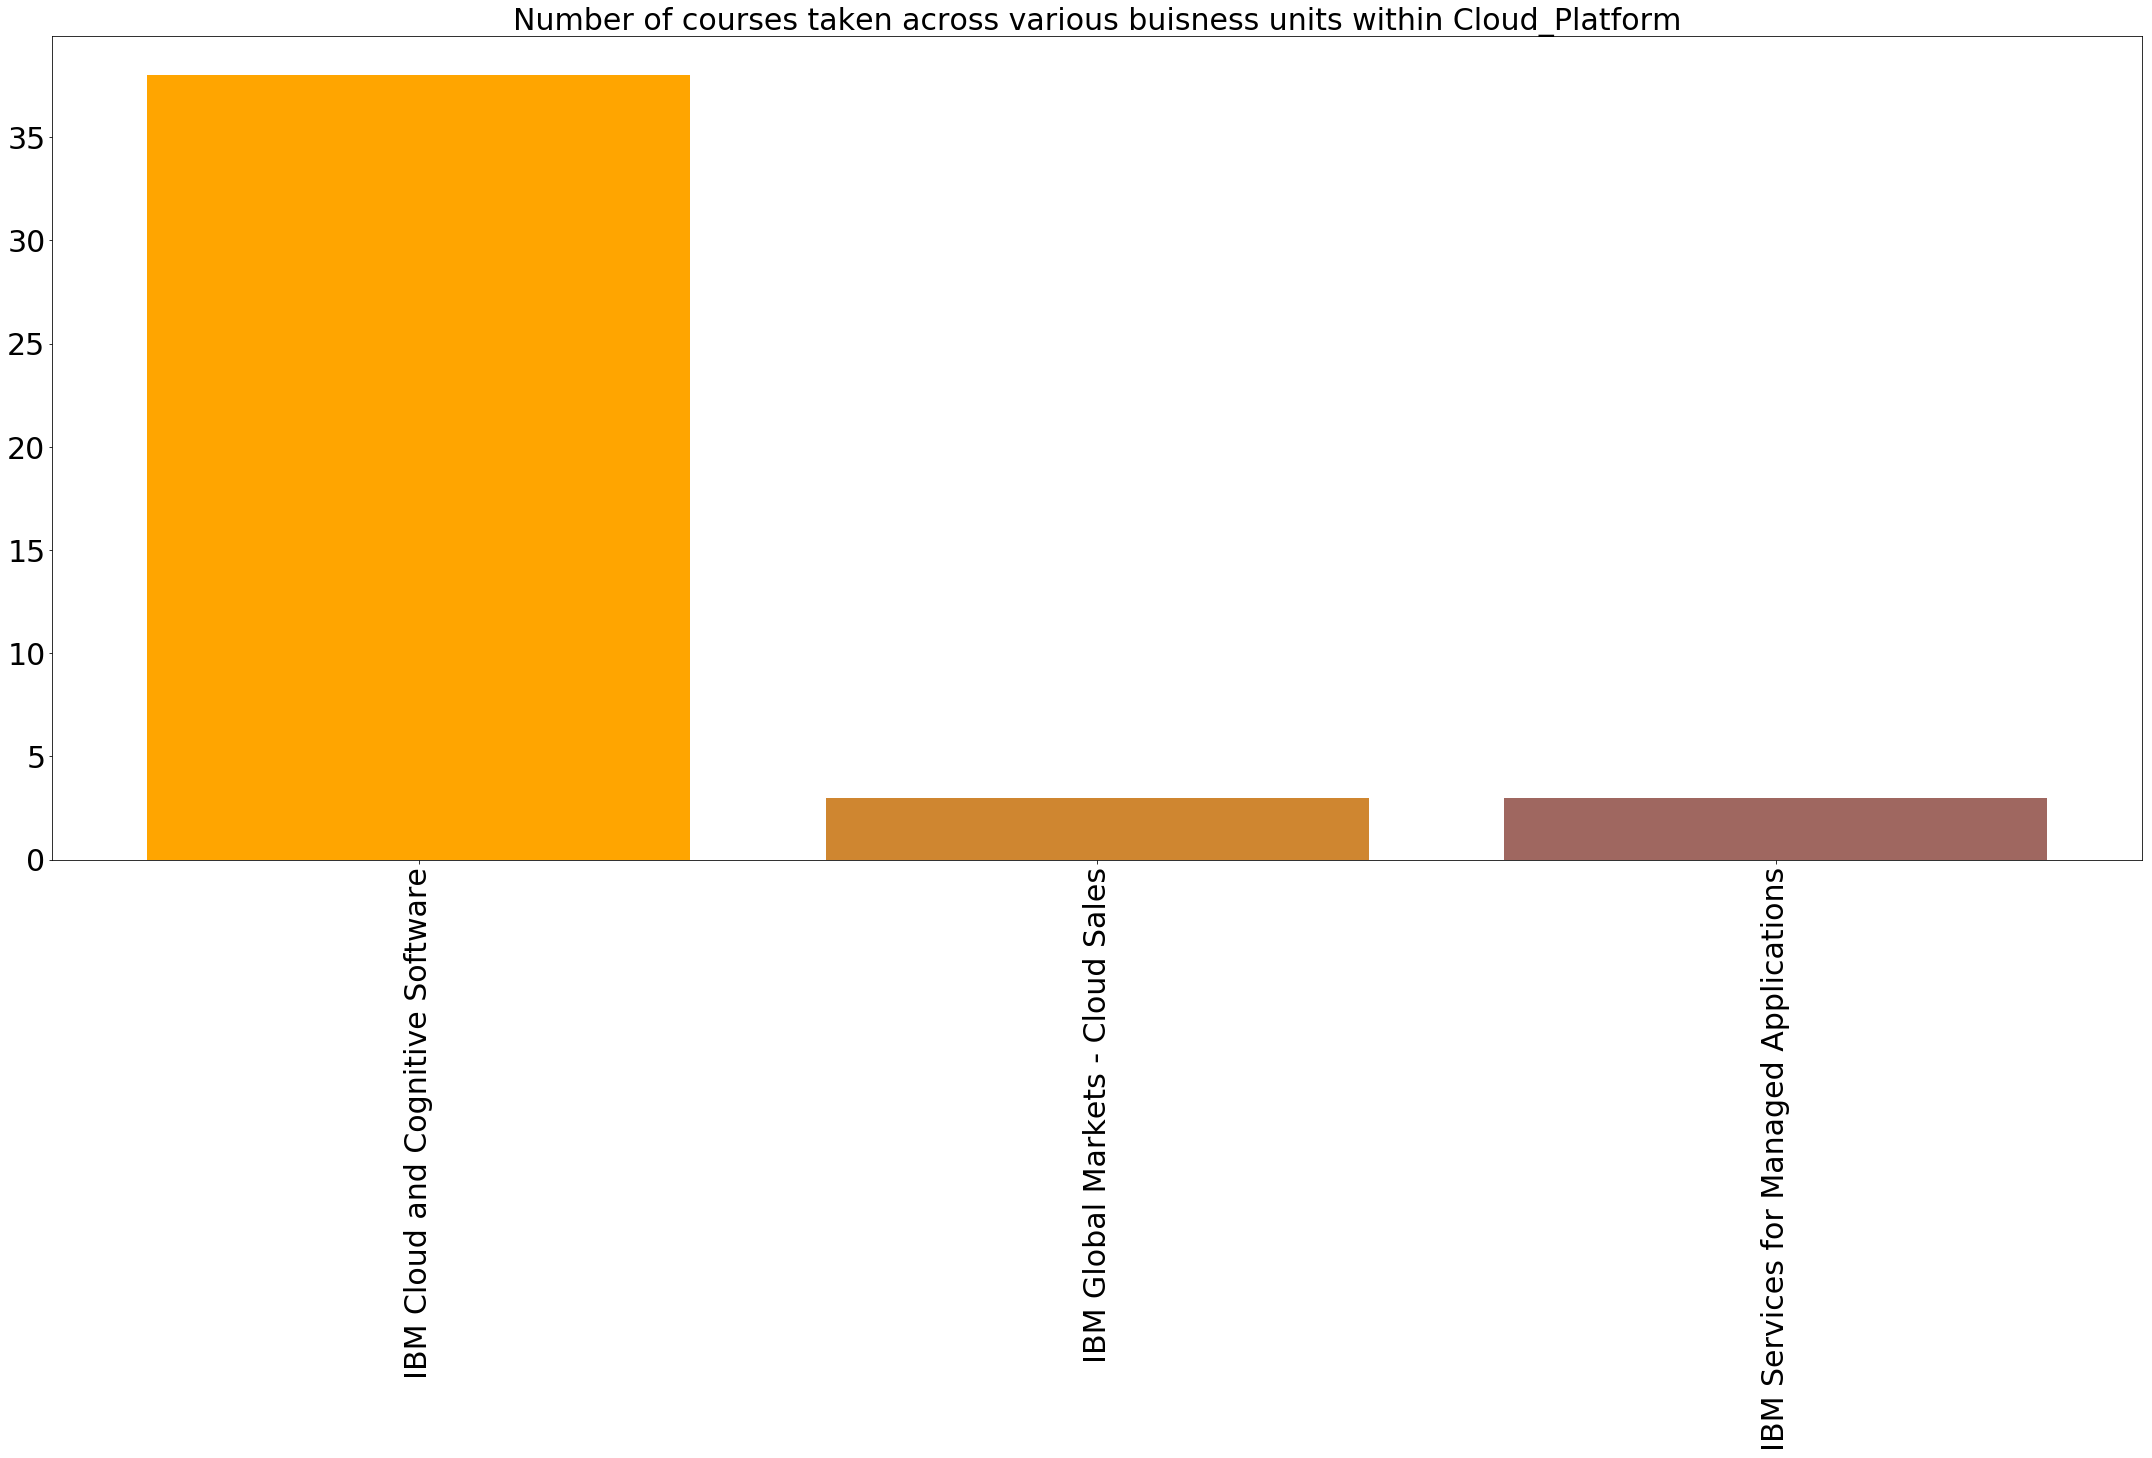

In [204]:
w = Counter(df_Cloud_Platform['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Cloud_Platform', fontsize=30)
plt.show()

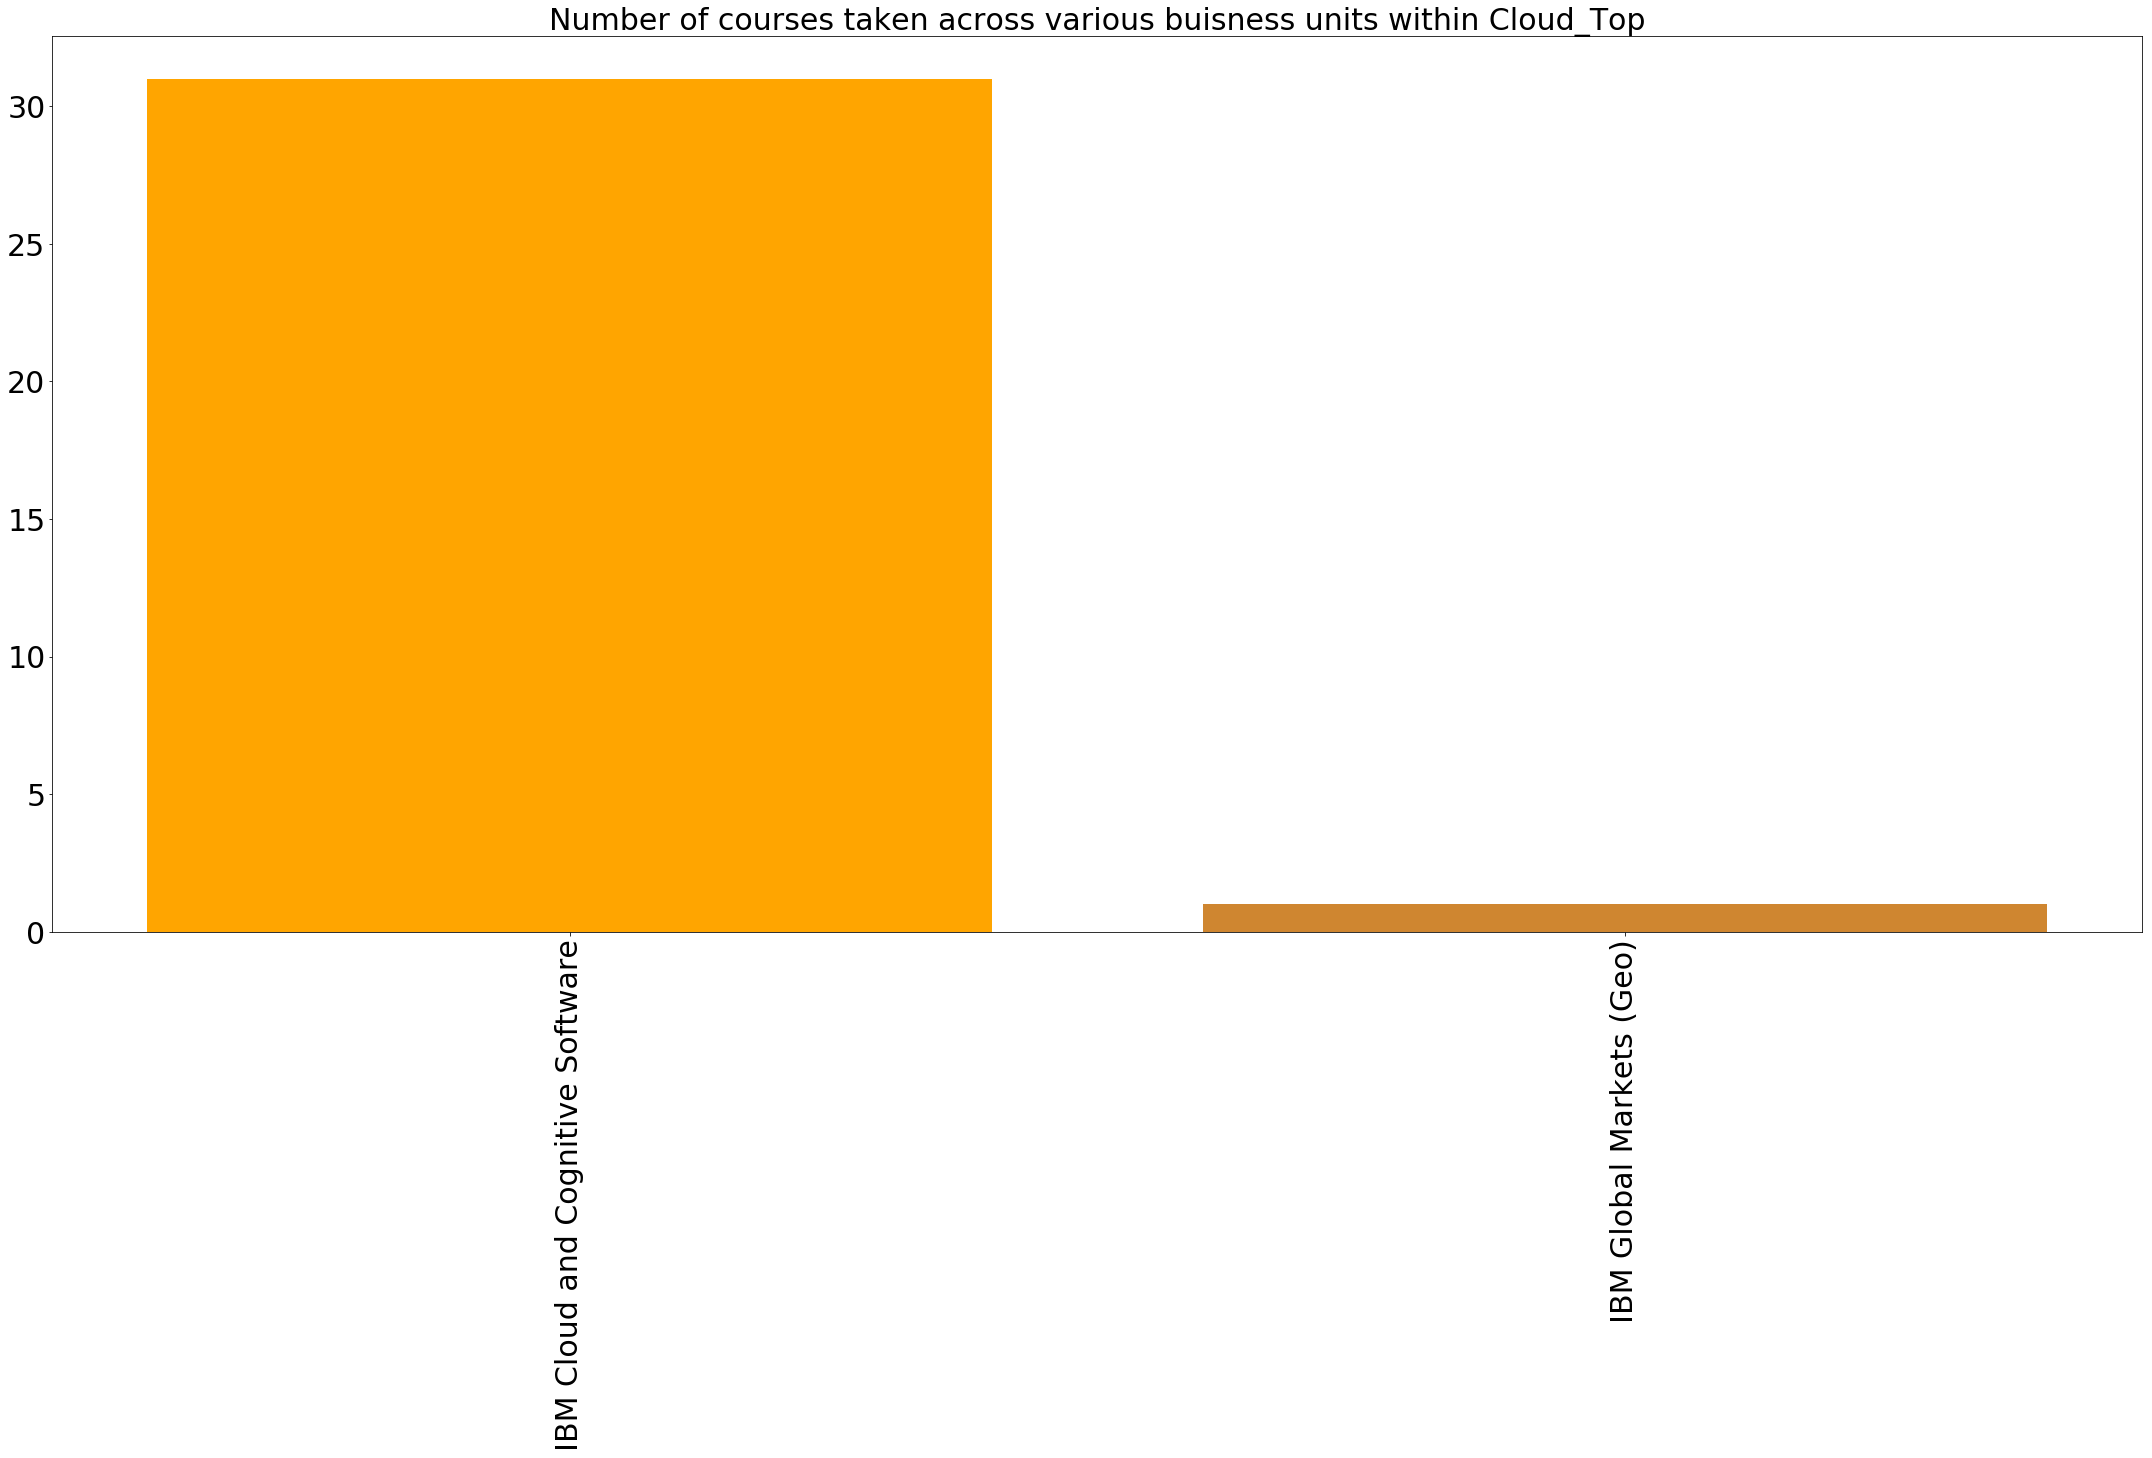

In [205]:
w = Counter(df_Cloud_Top['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Cloud_Top', fontsize=30)
plt.show()

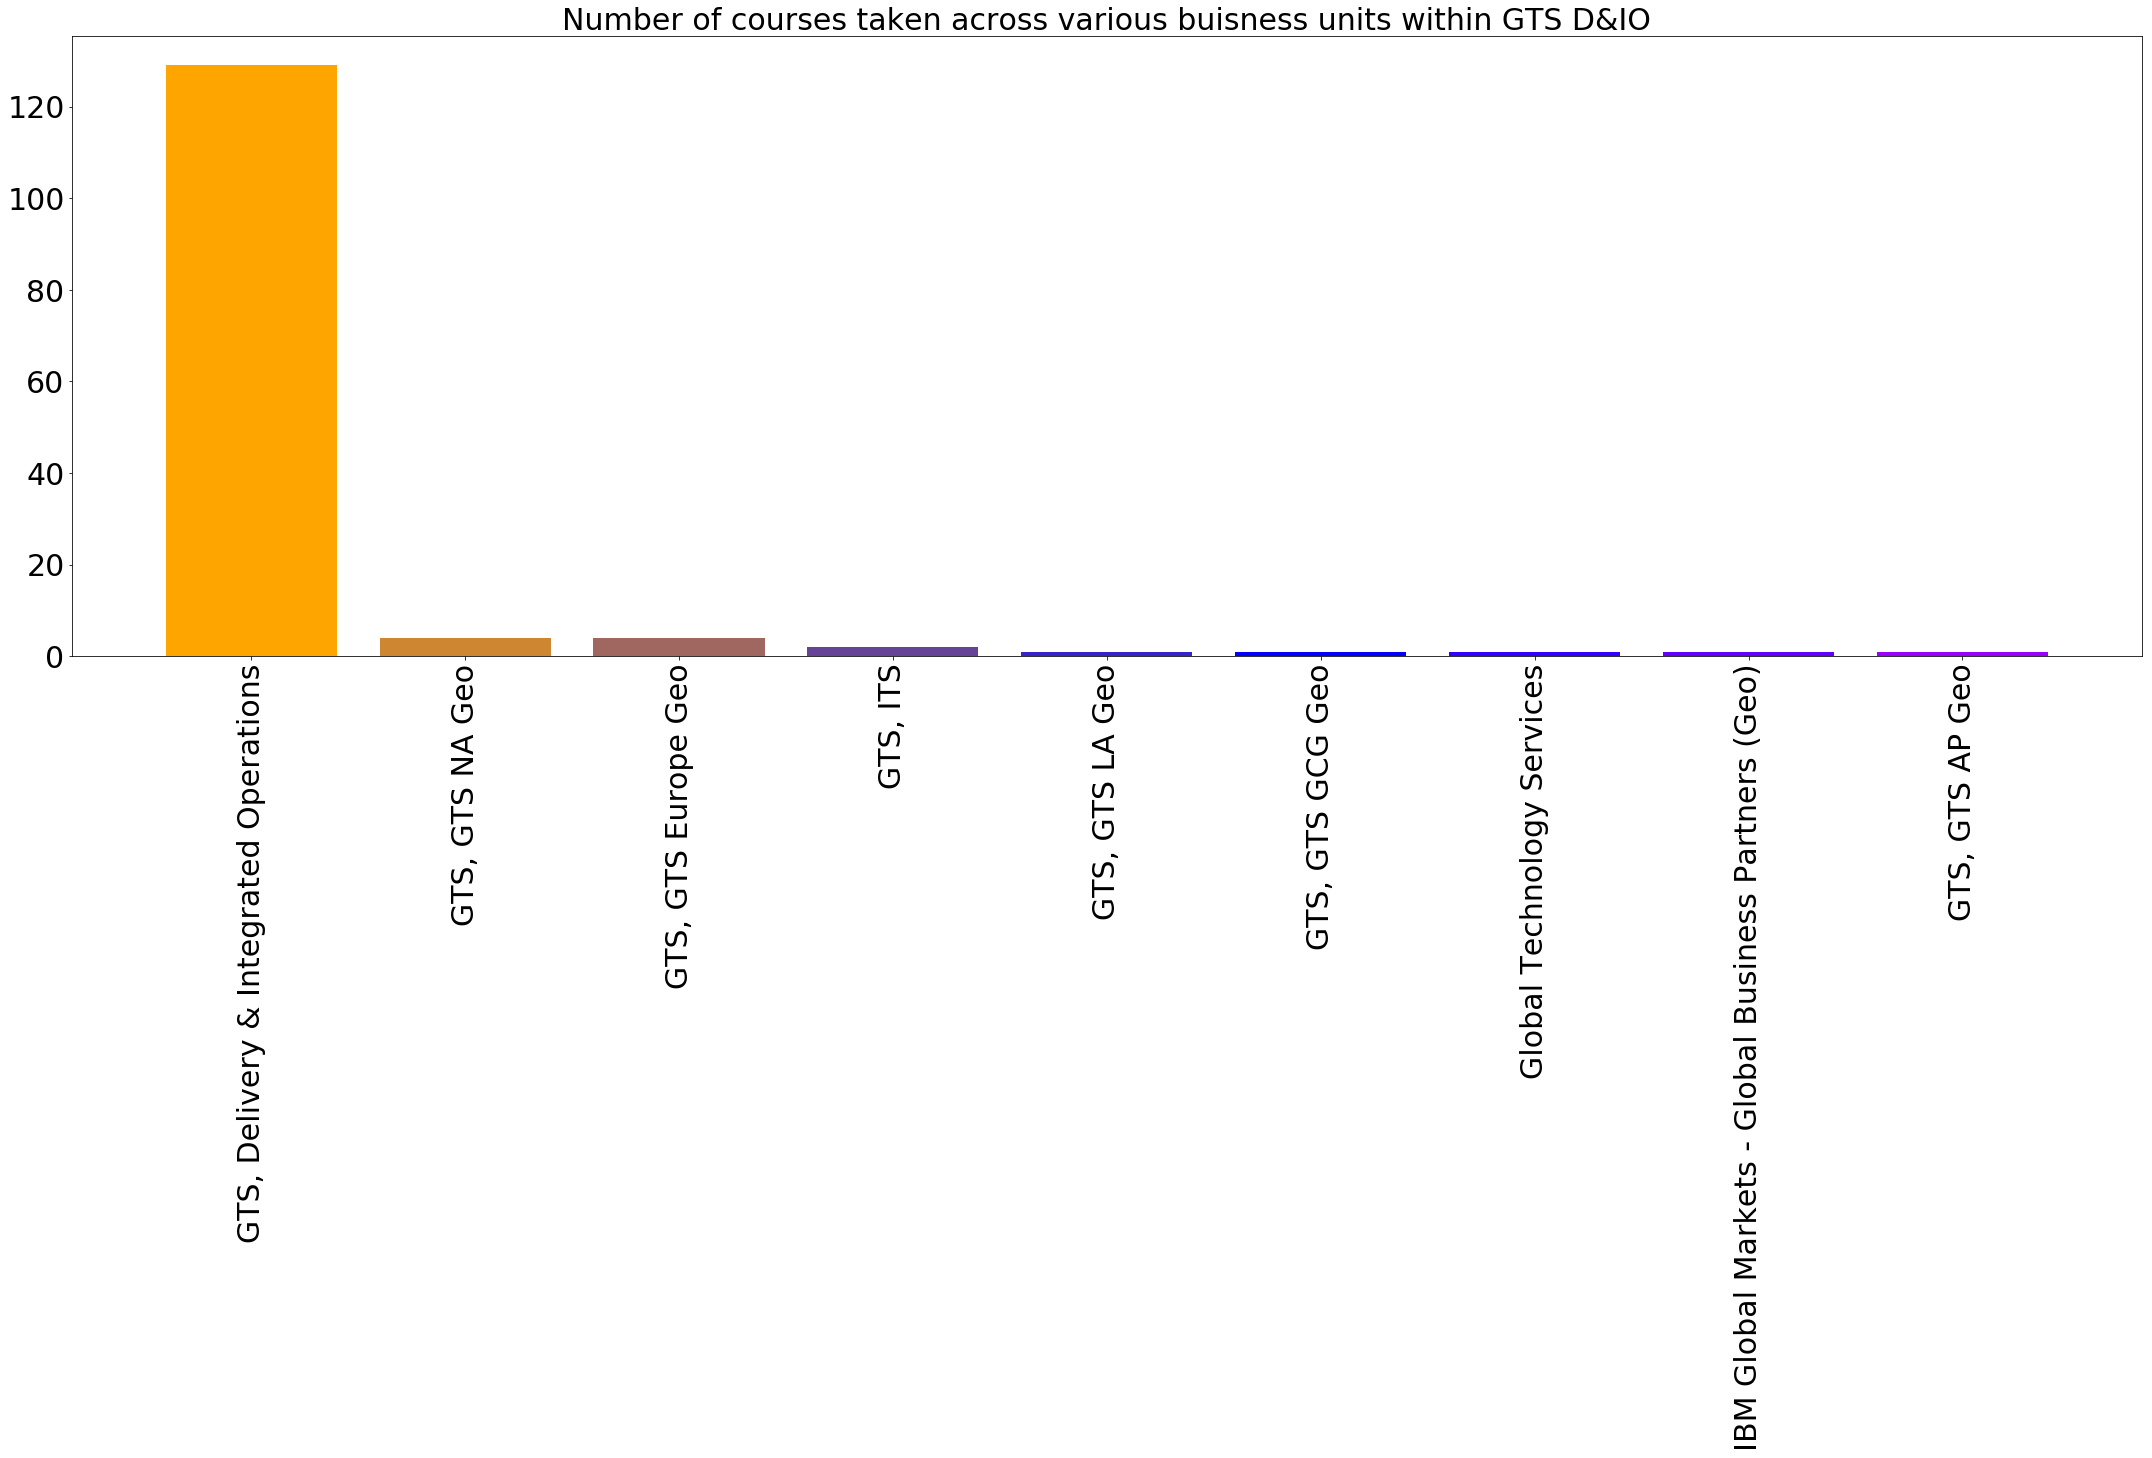

In [206]:
w = Counter(df_GTS_D_and_IO['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within GTS D&IO', fontsize=30)
plt.show()

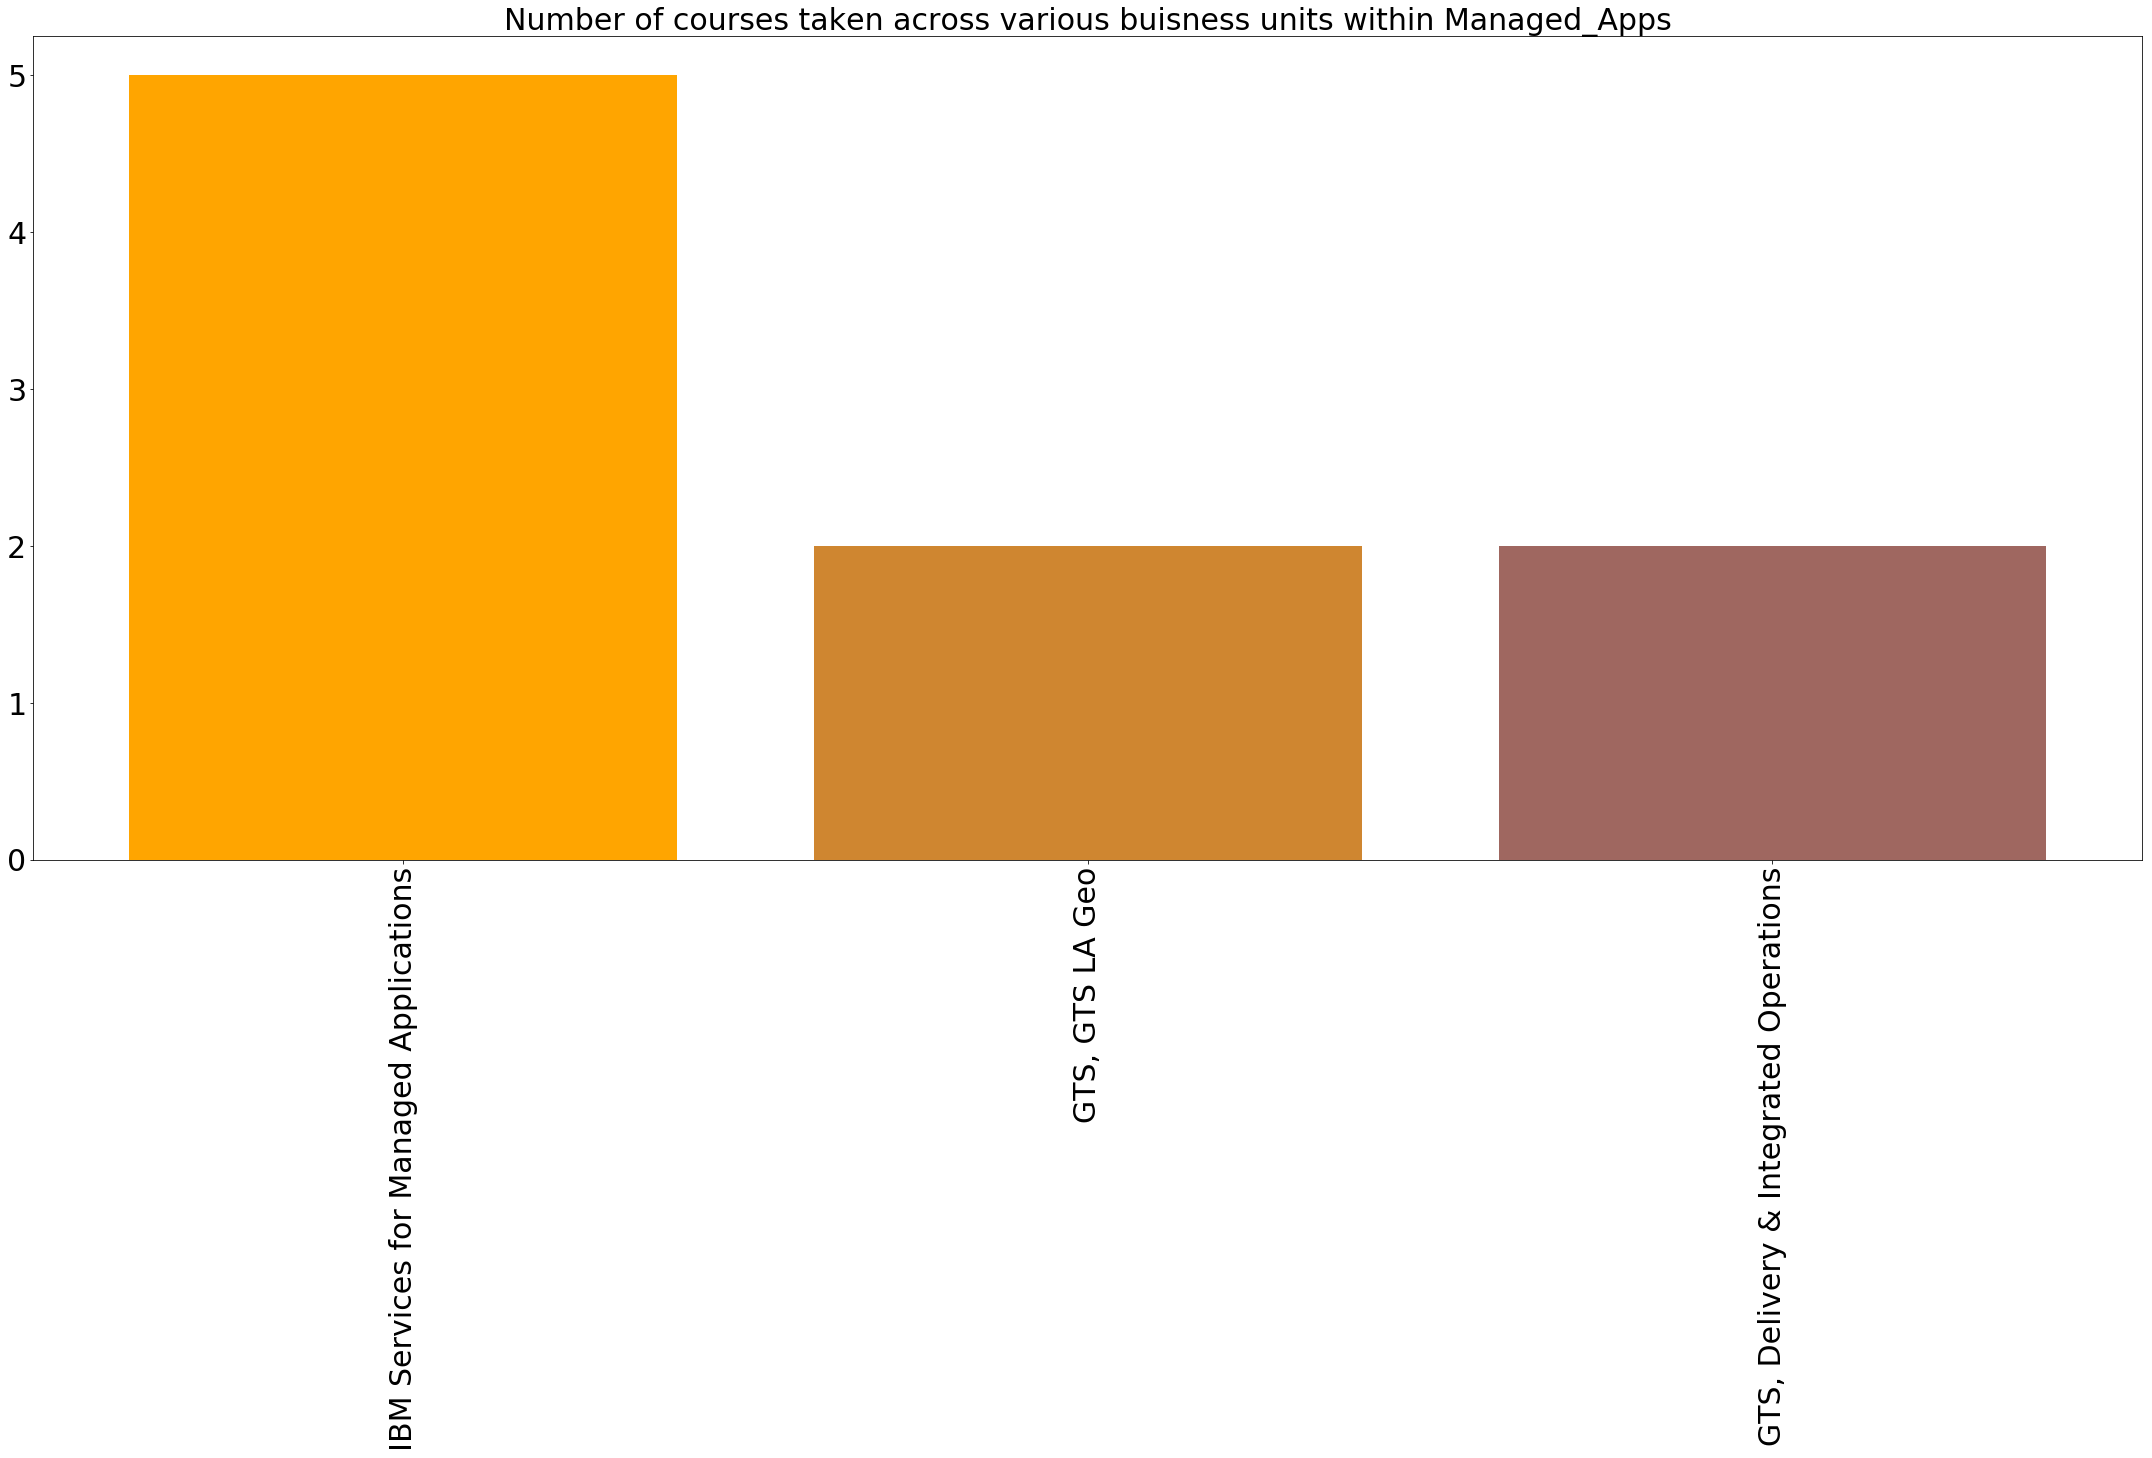

In [207]:
w = Counter(df_Managed_Apps['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within Managed_Apps', fontsize=30)
plt.show()

In [208]:
df_Cloud_Sales=dfs['Cloud Sales']
df_Cld_Integration=dfs['Cld Integration']
df_GLMKT_Non_Brand=dfs['GLMKT Non Brand']
df_Blockchain=dfs['Blockchain']
df_Data_and_AI=dfs['Data and AI']
df_GTS_Leadership=dfs['GTS Leadership']
       
df_DigitalPlatform= dfs['DigitalPlatform']
df_Cloud_App_Innov= dfs['Cloud App Innov']
df_C_and_CS_WW_Sales=dfs['C&CS WW Sales']
df_Cloud_Platform=dfs['Cloud Platform']
df_Cloud_Top=dfs['Cloud Top']
df_GTS_D_and_IO= dfs['GTS D&IO']
df_Managed_Apps=dfs['Managed Apps']
df_SecuritySols=dfs['SecuritySols']

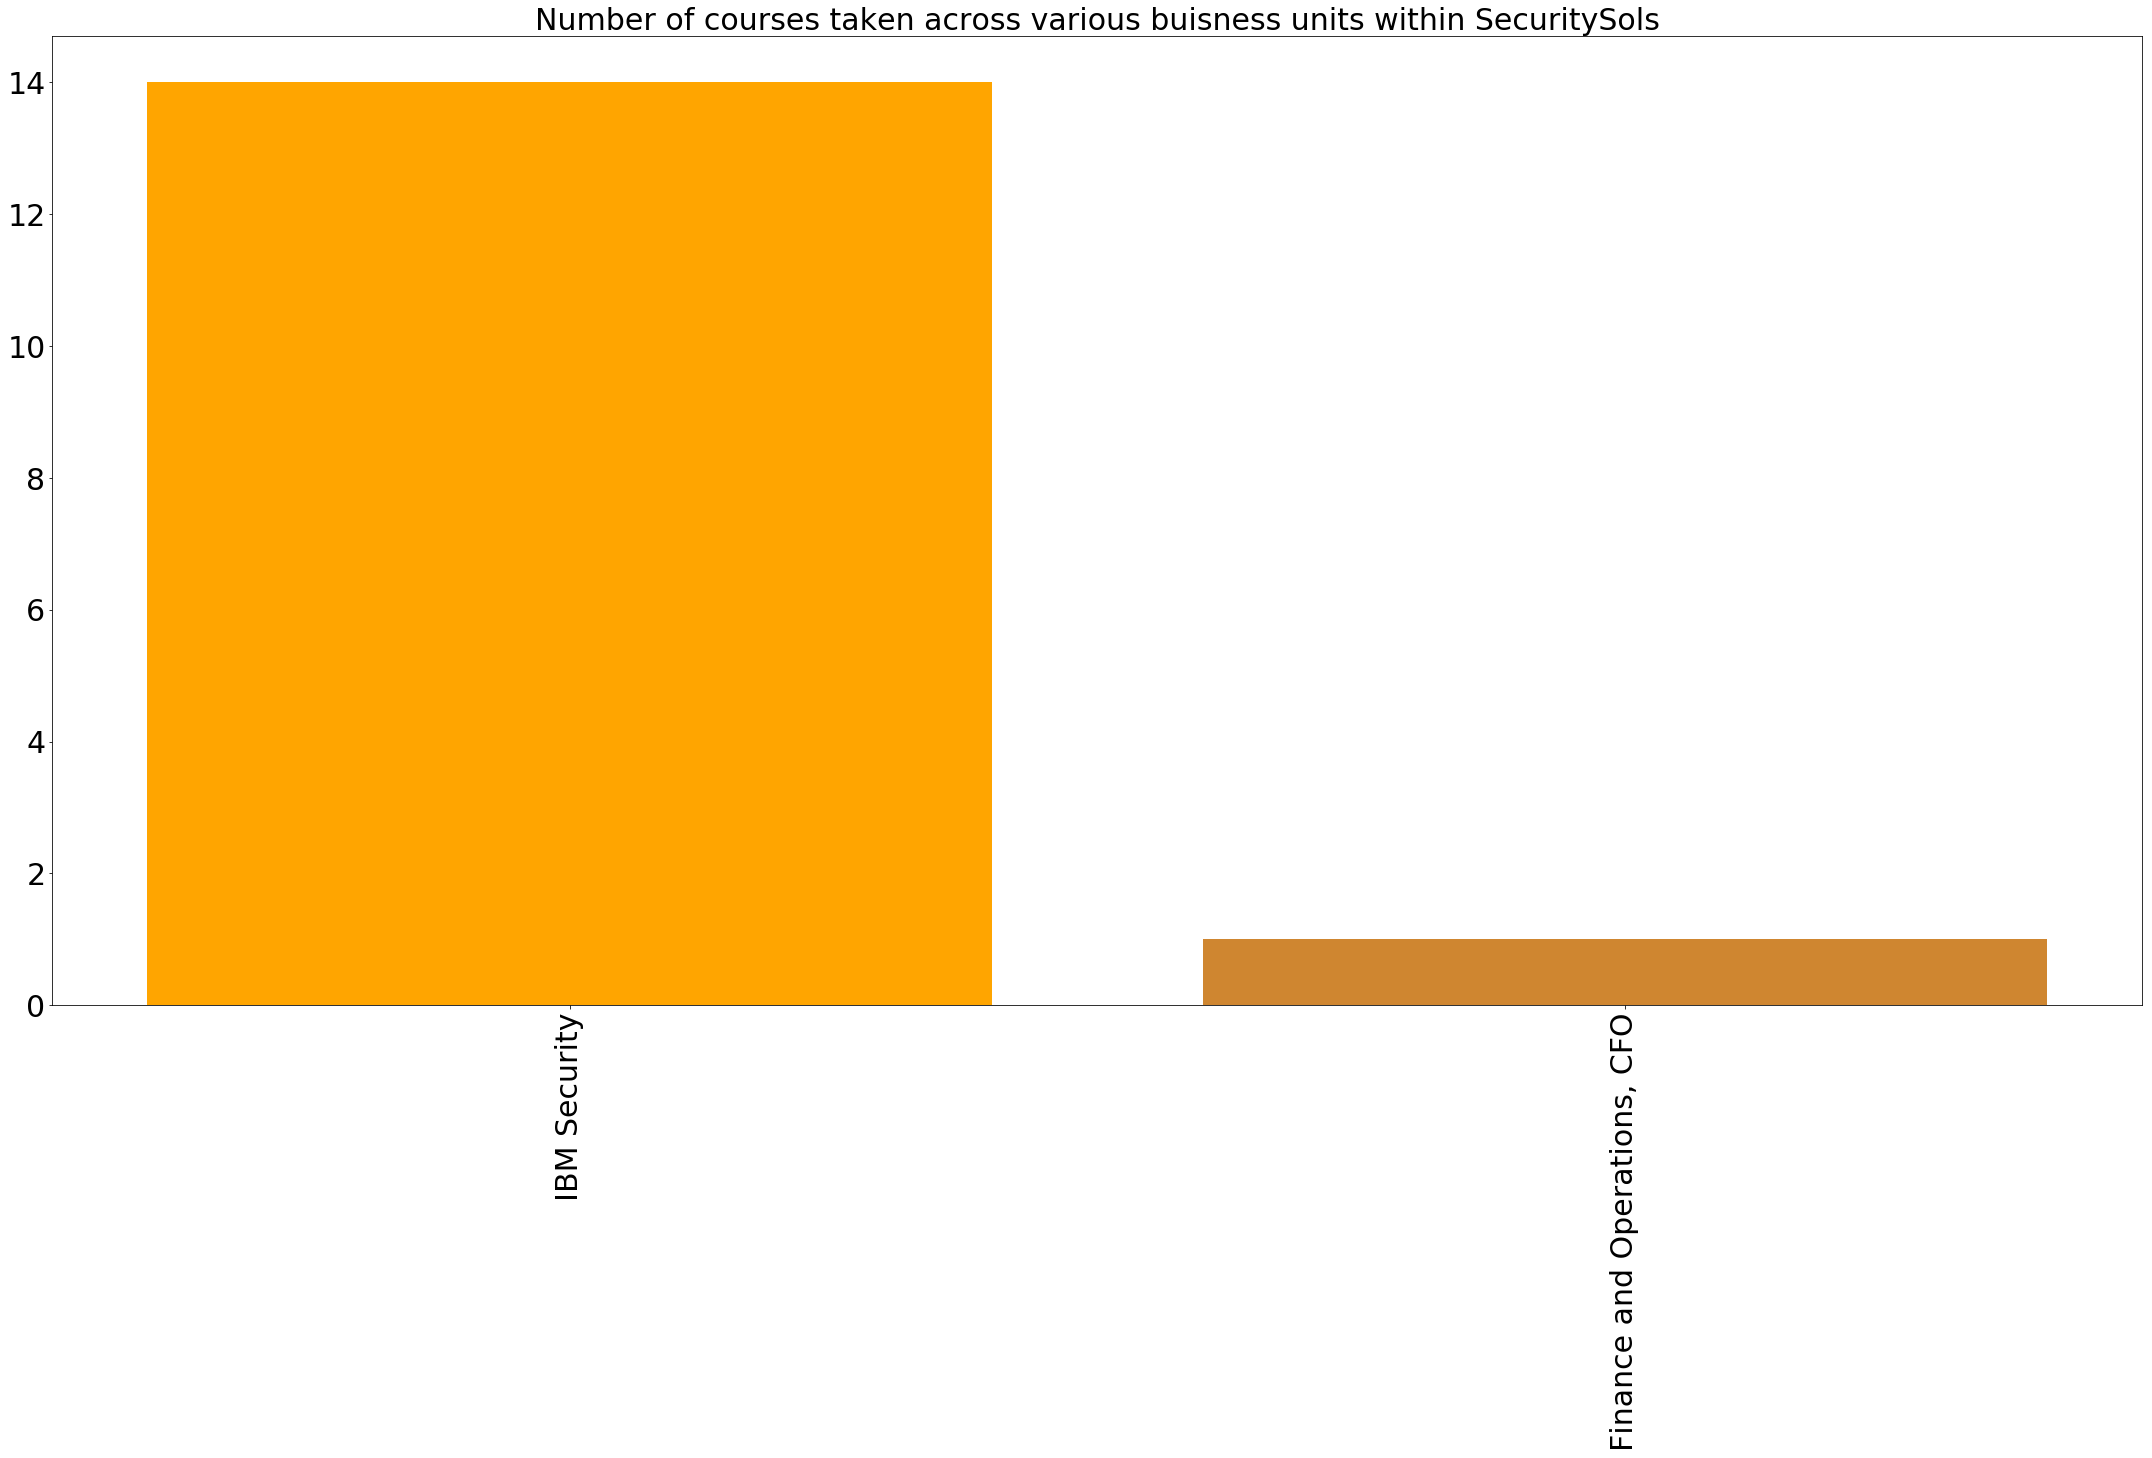

In [209]:
w = Counter(df_SecuritySols['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units within SecuritySols', fontsize=30)
plt.show()

In [210]:
df1.shape

(4185, 11)

In [211]:
df3.shape

(2381, 187)

In [212]:
df.shape

(4079, 198)

In [213]:
pd.set_option('display.max_colwidth', -1)

df.columns

Index(['Unnamed: 0', 'Course Start Date', 'Course End Date', 'Course',
       'First Name', 'Last Name', 'Email', 'Enrollment Type',
       'Enrollment Start Date', 'Enrollment End Date',
       ...
       'B_timeStampWorkday', 'B_title', 'B_tradeArea', 'B_userCertificate',
       'B_userPassword', 'B_ventureCode', 'B_workerId', 'B_workLoc',
       'B_workLocation', 'B_workplaceIndicator'],
      dtype='object', length=198)

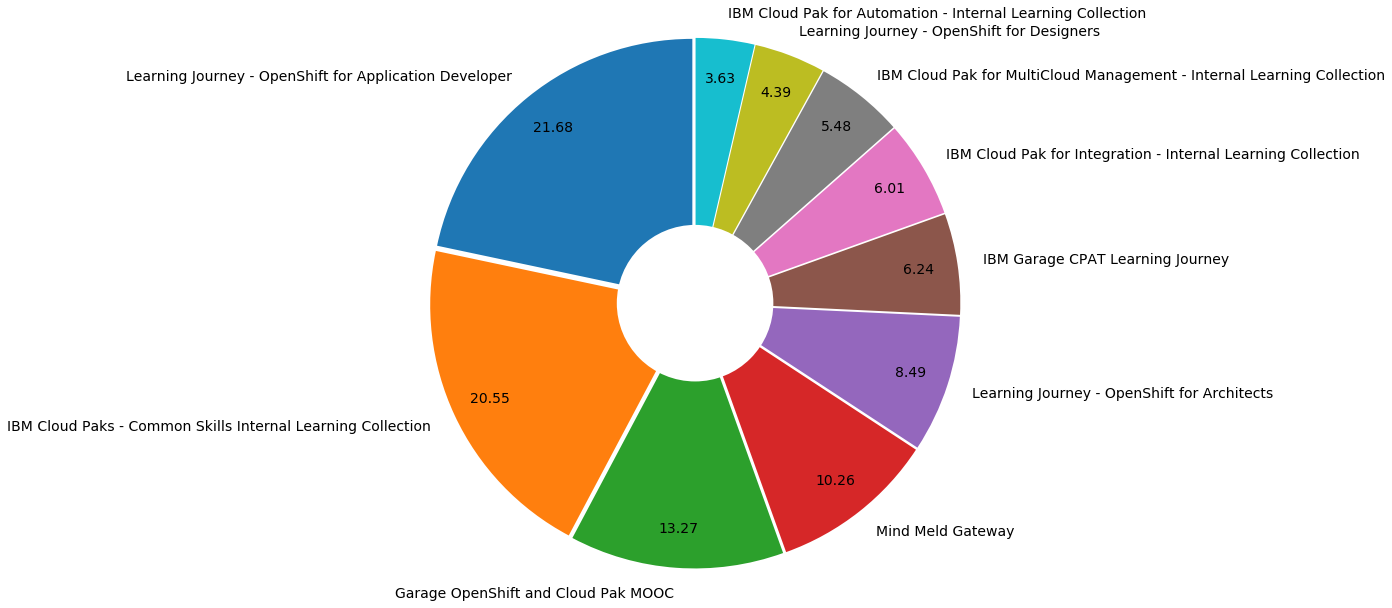

In [214]:
c=Counter(df.Course)
#print(c.most_common(100))
#len(c)
histo=c.most_common(10)
freq={}
for item,count in histo:
    freq[item]=count
freq
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',startangle=90, pctdistance=0.85, explode = explode,radius=3,textprops={'fontsize': 14})


centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
#plt.title("Top 10 Popular Courses")

plt.show()

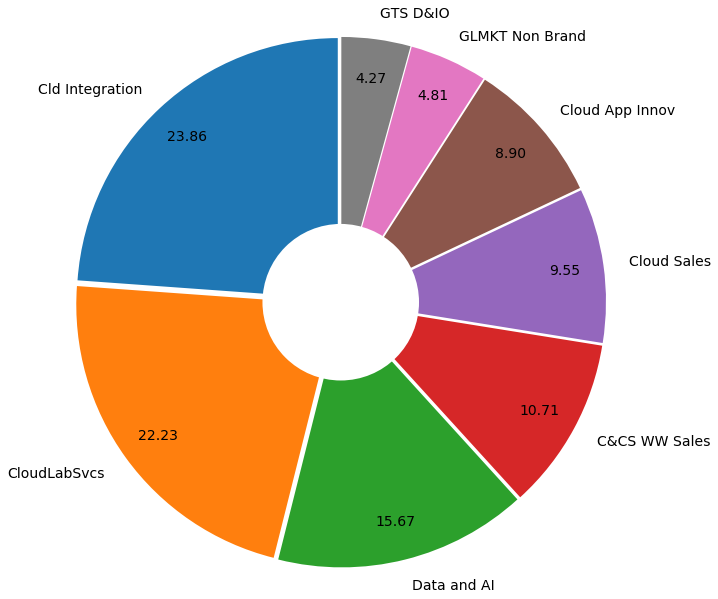

In [215]:

c=Counter(df.EO_hrUnitId)
#print(c.most_common(100))
#len(c)
histo=c.most_common(8)
freq={}
for item,count in histo:
    freq[item]=count
freq
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)#,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',startangle=90, pctdistance=0.85, explode = explode,radius=3,textprops={'fontsize': 14})


centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
#plt.title("Top 10 Startup Markets in Data/AI")

plt.show()

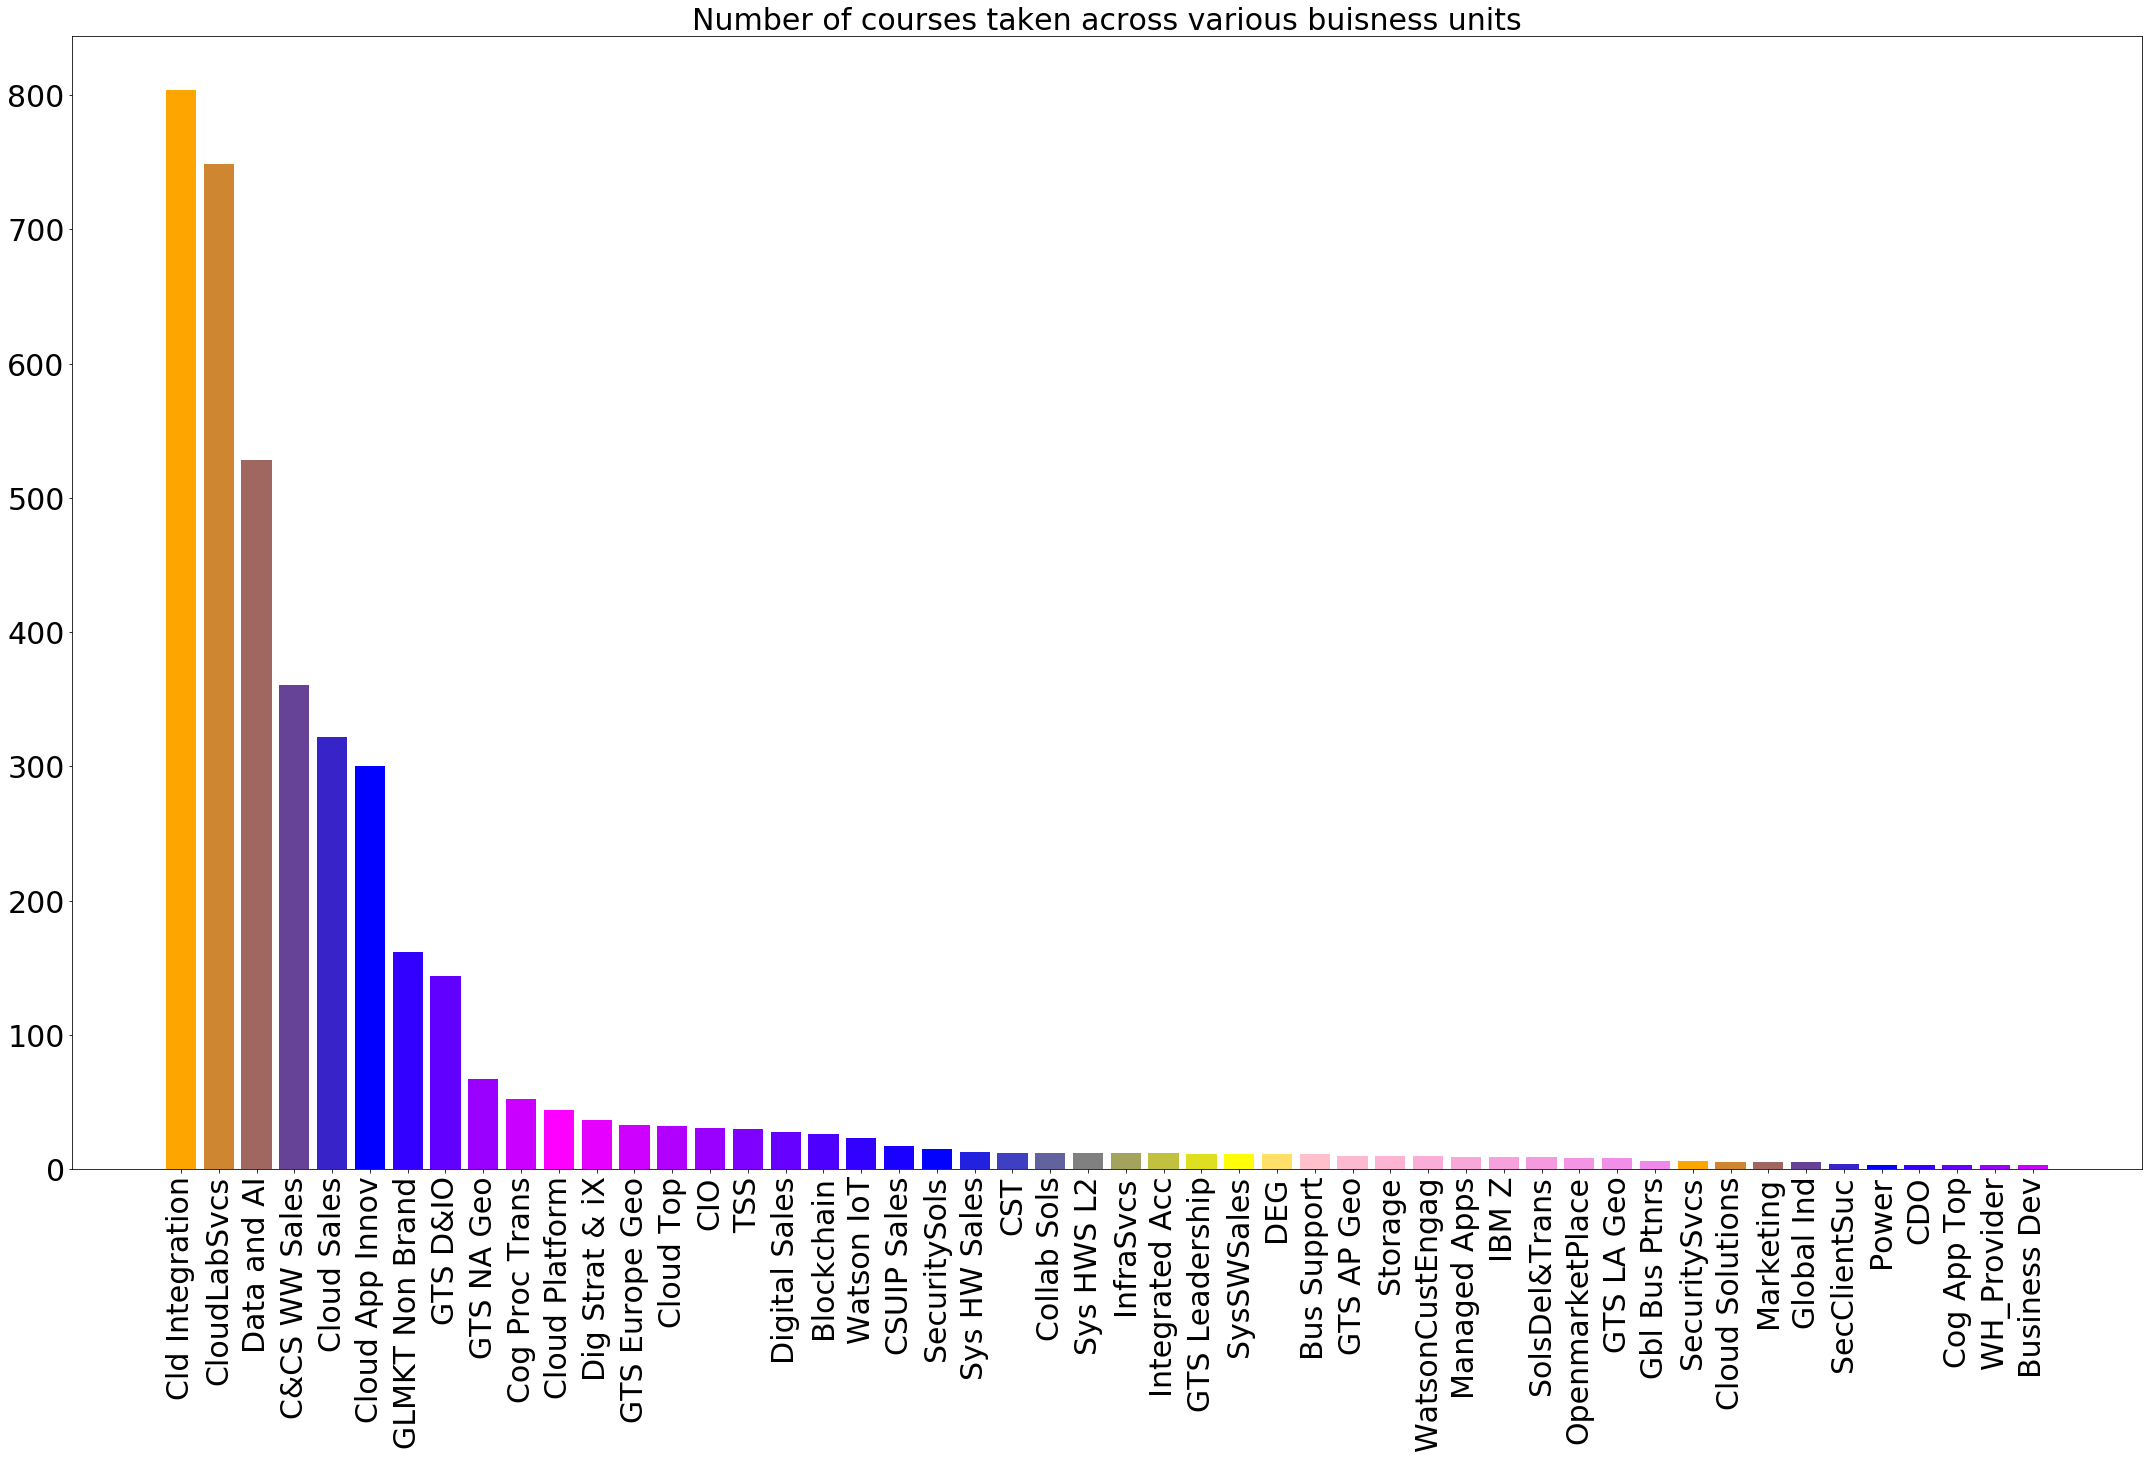

In [216]:
w = Counter(df['EO_hrUnitId'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various buisness units', fontsize=30)
plt.show()

In [218]:
'''Cloud Foundry Migration Tool
Red Hat OpenShift for Leaders
A Successful Sensei - Learning Journey
Data Science Learning Journey
IBM Cloud Pak for MultiCloud Management - Internal Learning Collection
IBM Cloud Pak for Automation - Internal Learning Collection
Learning Journey - OpenShift for Designers
Garage OpenShift and Cloud Pak MOOC
IBM Cloud Pak for Integration - Internal Learning Collection
Learning Journey - OpenShift for Architects
IBM Garage CPAT Learning Journey
IBM Cloud Pak for Applications - Online Technical Exploration Workshop 
Mind Meld Gateway
Learning Journey - OpenShift for Application Developer
IBM Cloud Paks - Common Skills Internal Learning Collection'''

'Cloud Foundry Migration Tool\nRed Hat OpenShift for Leaders\nA Successful Sensei - Learning Journey\nData Science Learning Journey\nIBM Cloud Pak for MultiCloud Management - Internal Learning Collection\nIBM Cloud Pak for Automation - Internal Learning Collection\nLearning Journey - OpenShift for Designers\nGarage OpenShift and Cloud Pak MOOC\nIBM Cloud Pak for Integration - Internal Learning Collection\nLearning Journey - OpenShift for Architects\nIBM Garage CPAT Learning Journey\nIBM Cloud Pak for Applications - Online Technical Exploration Workshop \nMind Meld Gateway\nLearning Journey - OpenShift for Application Developer\nIBM Cloud Paks - Common Skills Internal Learning Collection'

In [219]:
# I want to show the access per org and per region course-by-course. So, the analysis I was doing for MOOC enrollments for every course. Different teams should be accessing different courses so we expect to see quite a bit of differentiation.

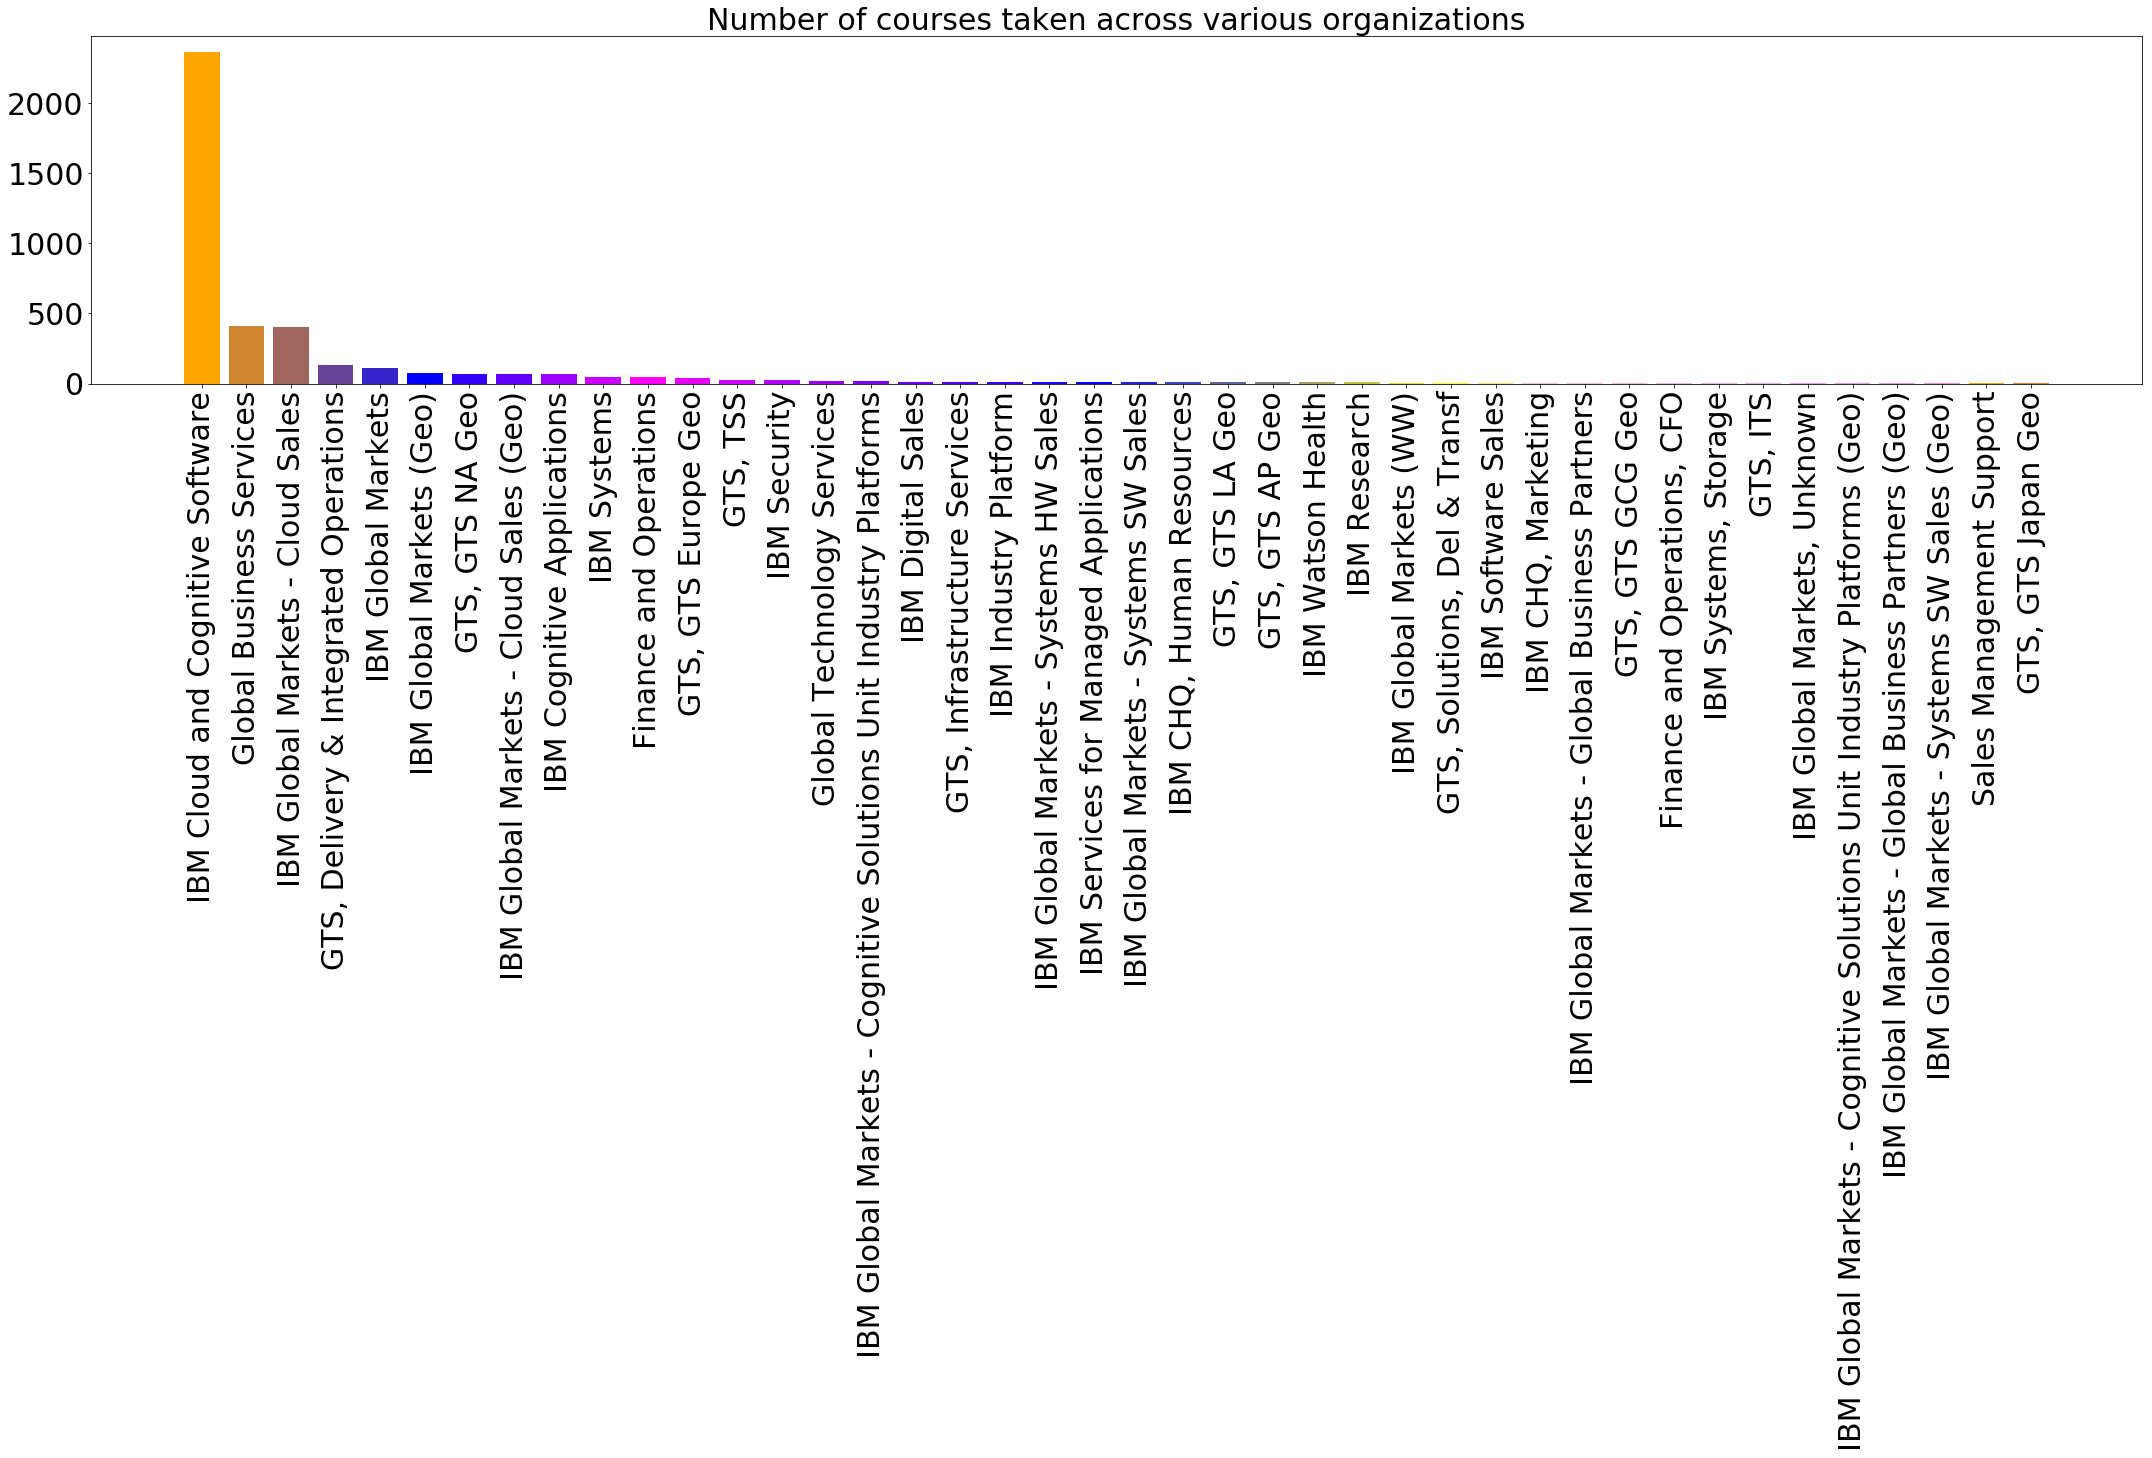

In [221]:
w = Counter(df['BO_hrOrganizationDisplay'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across various organizations', fontsize=30)
plt.show()

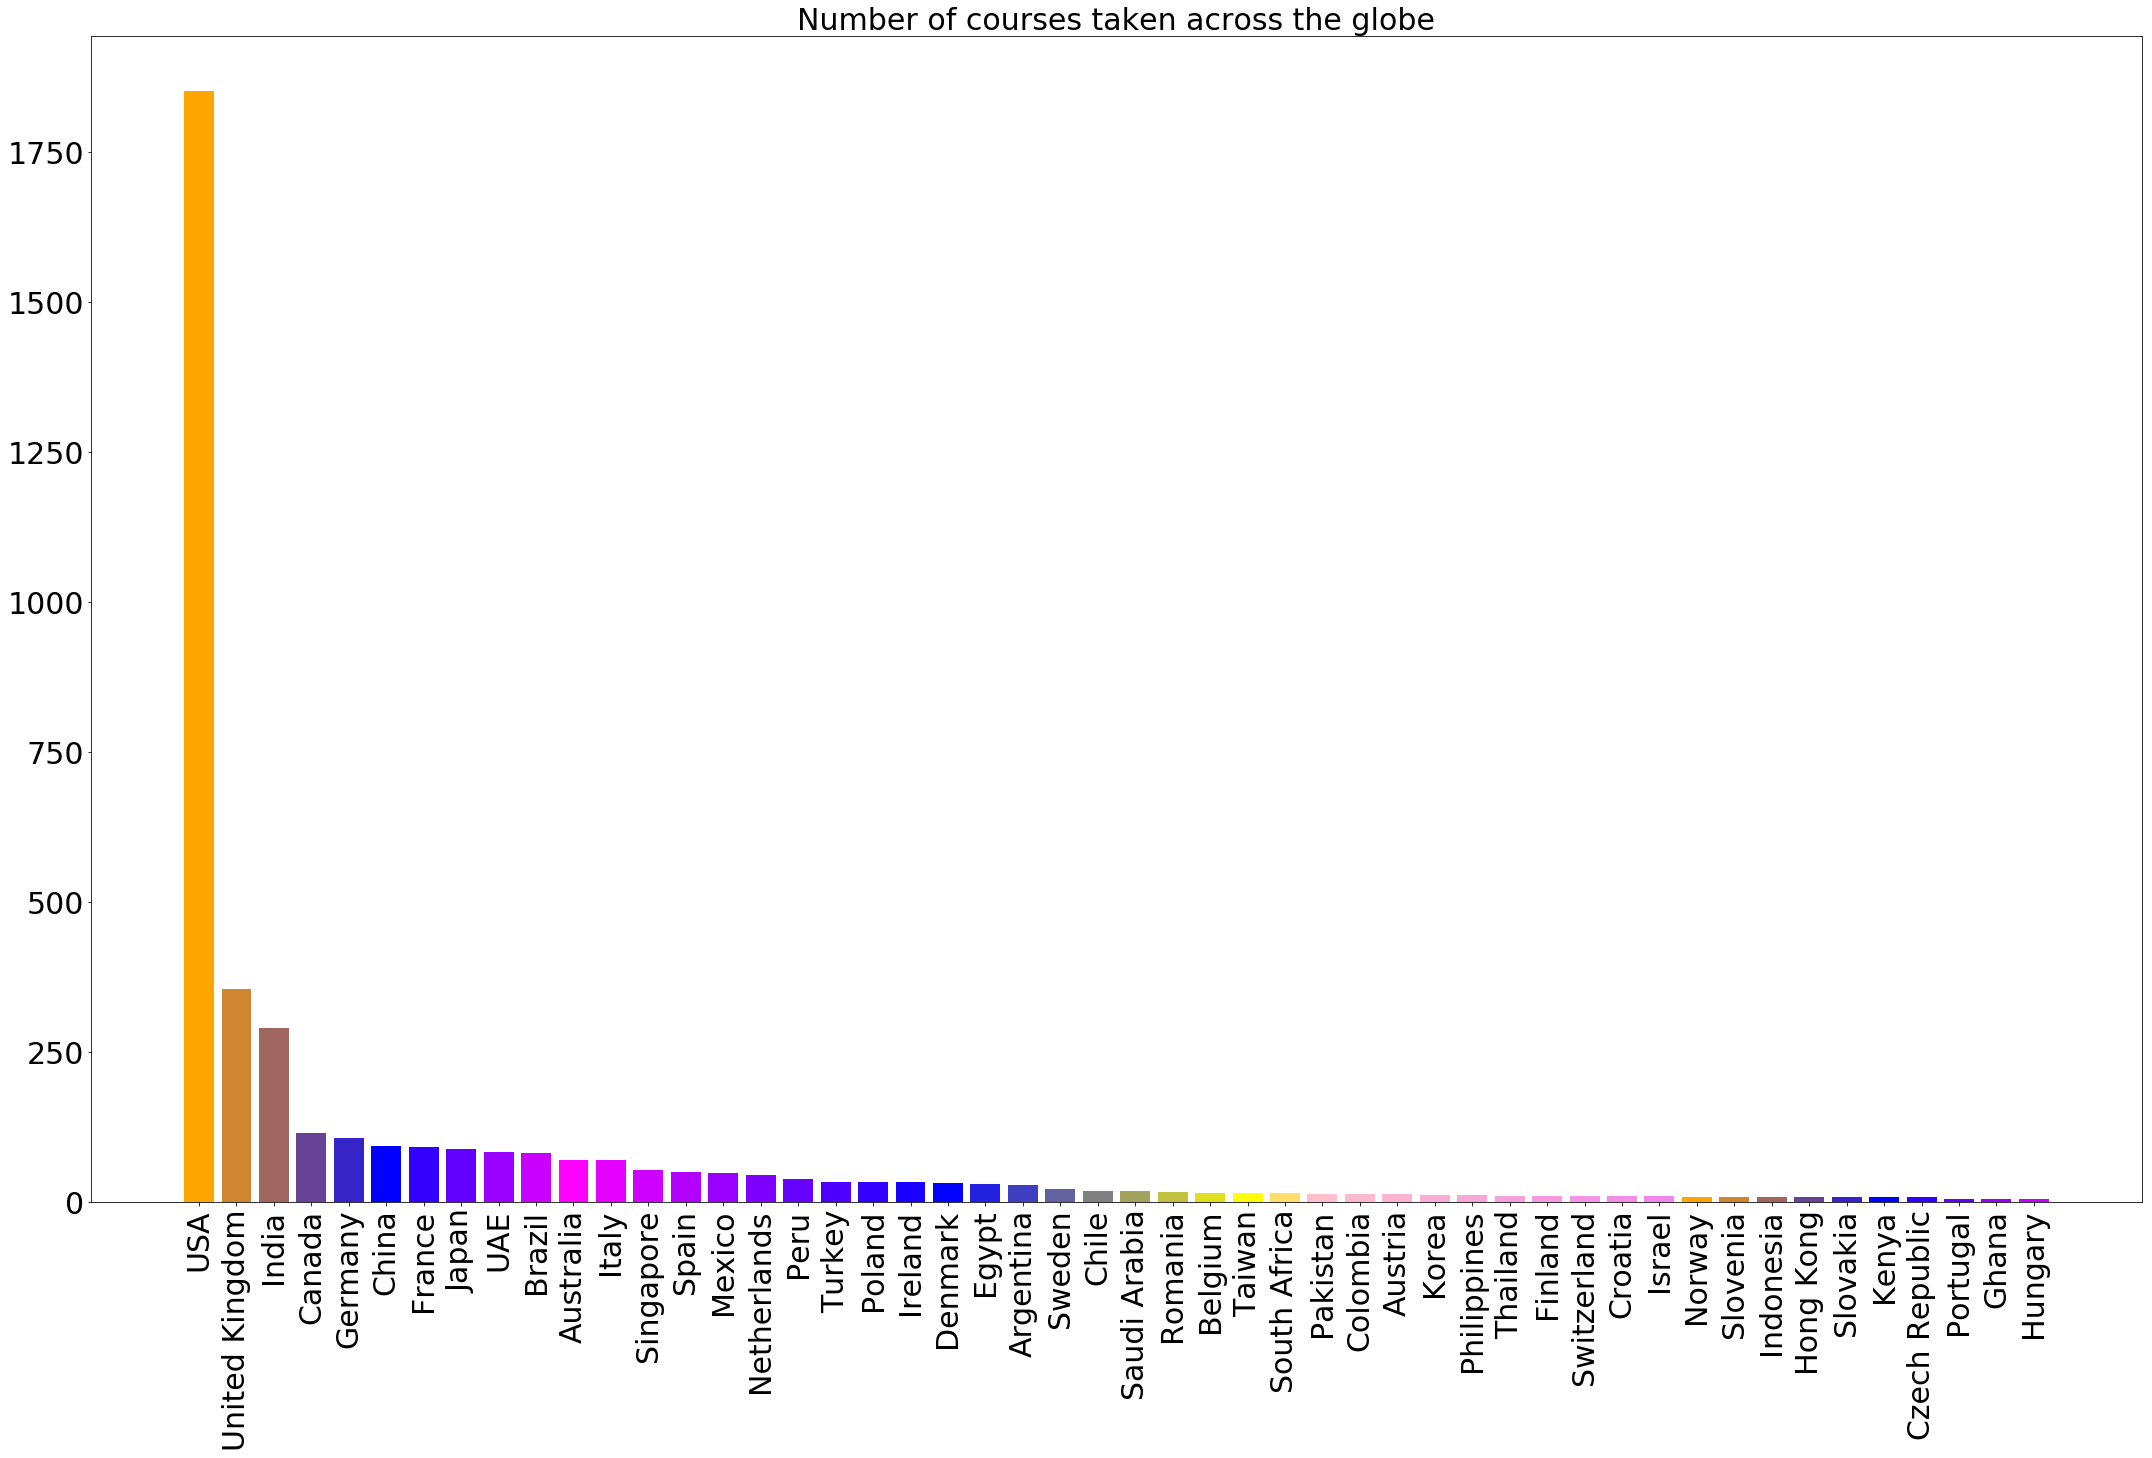

In [222]:
w = Counter(df['BG_countryName'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across the globe', fontsize=30)
plt.show()

col1
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

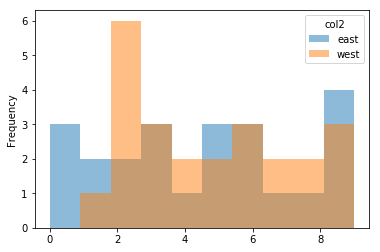

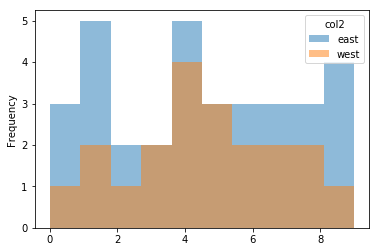

In [227]:
df = pd.DataFrame({'col1': np.random.choice(('A','B'), size=100),
                   'col2': np.random.choice(('east', 'west'), size=100),
                   'col3': np.random.randint(0,10, 100)})

df['idx'] = df.groupby('col1').col2.cumcount()

(df.pivot_table(index=['idx','col1'], 
                columns=['col2'], 
                values='col3')
   .groupby('col1').plot.hist(subplots=False, alpha=0.5)

)

In [232]:
df_n.head()

,Unnamed: 0,Course Start Date,Course End Date,Course,First Name,Last Name,Email,Enrollment Type,Enrollment Start Date,Enrollment End Date,Status,Completed On,SrcIndex,SrcRes,E_cn,EO_hrUnitId,EG_countryName,E_dept,E_div,E_glTeamLead,B_uid,B_cn,B_co,B_hrInitial,B_hrFirstName,B_hrMiddleName,B_hrLastName,B_hrManagerIndicator,B_mail,B_notesId,BO_description,BO_hrGroupId,BO_hrOrganizationCode,BO_hrOrganizationDisplay,BO_hrOrganizationId,BO_hrOrganizationName,BO_hrUnitId,BW_address1,BW_address2,BW_c,BW_d,BW_l,BW_o,BW_objectClass,BW_postalCode,BW_st,BW_workLoc,BG_countryCode,BG_countryName,BG_geoCode,BG_geoName,BG_regionCode,BG_regionName,BG_subRegionCode,BG_subRegionName,BG_marketTypeCode,BG_marketTypeName,B_additional,B_administrator,B_alternateAddress1,B_alternateAddress2,B_alternateLocalityName,B_alternateNode,B_alternatePostalCode,B_alternateSt,B_alternateTelephoneNumber,B_alternateTieline,B_alternateUserId,B_area,B_backup,B_backupCountryCode,B_backupSerialNumber,B_bluepagesNotesIdError,B_buildingName,B_c,B_callupDateTime,B_callupName,B_cellServiceProvider,B_contractorCompany,B_contractorRecordExpiration,B_coreDataIntegrity,B_costCenter,B_costCenterEffectiveDate,B_createTimeStamp,B_deleter,B_department,B_dept,B_description,B_directoryAlias,B_div,B_divDept,B_employeeCountryCode,B_employeeType,B_entryType,B_facsimileTelephoneNumber,B_facsimileTieline,B_floor,B_generationQualifier,B_givenName,B_glTeamLead,B_historicPassword1,B_historicPassword2,B_historicPassword3,B_historicPassword4,B_historicPassword5,B_hrActive,B_hrAssignee,B_hrAssignment,B_hrCompanyCode,B_hrCountryCode,B_hrDepartment,B_hrDivision,B_hrEmployeeType,B_hrFamilyName,B_hrManagerPSC,B_hrManagerSerial,B_hrOrganizationCode,B_hrOrgUnitCode,B_hrOtherName,B_hrPreferredName,B_hrPSC,B_hrSerialNumber,B_ibmLoc,B_ibmSerialNumber,B_infoTelephoneNumber,B_internalEmail,B_internalMailDrop,B_invalidManagerDate,B_ipTelephoneNumber,B_isManager,B_isNonExpiring,B_jobResponsibilities,B_l,B_locationCity,B_manager,B_managerCountryCode,B_managerSerialNumber,B_middleInitial,B_mobile,B_nativeFirstName,B_nativeLastName,B_notesEmail,B_notesMailDomain,B_notesMailFile,B_notesMailServer,B_notesPublicKey,B_notesShortName,B_o,B_odmEntry,B_ou,B_pager,B_pagerId,B_pagerServiceProvider,B_pagerType,B_passwordHistoryForChanges,B_passwordHistoryForResets,B_passwordIsExpired,B_passwordIsReset,B_passwordIsResetByAdmin,B_passwordIsStruckout,B_passwordModifyTimestamp,B_pdif,B_personalTitle,B_phoneMailNumber,B_physicalDeliveryOfficeName,B_preferredFirstName,B_preferredIdentity,B_preferredLanguage,B_preferredLastName,B_previousManagerSerial,B_primaryNode,B_primaryUserId,B_sAMAccountName,B_secretary,B_secretaryCountryCode,B_secretarySerialNumber,B_seeAlso,B_serialNumber,B_shift,B_sn,B_telephoneNumber,B_territory,B_tieline,B_timestampBpgui,B_timeStampBPGuiRI,B_timestampFeed,B_timestampHRMS,B_timeStampOnboard,B_timeStampWorkday,B_title,B_tradeArea,B_userCertificate,B_userPassword,B_ventureCode,B_workerId,B_workLoc,B_workLocation,B_workplaceIndicator,idx
0,0,07/18/2019,01/24/2021,Learning Journey - OpenShift for Application Developer,SUGI,VELOO,sveloo@us.ibm.com,manual,07/10/2019,NaN,Incomplete,NaN,'0,NaN,SUGUNAM VELOO,CloudLabSvcs,USA,VL6,8E,NaN,897837897,Vasanthalakshmi A Ratnasinghe,United States of America,NaN,Vasanthalakshmi,A,Ratnasinghe,M,sreer@us.ibm.com,Sree A Ratnasinghe/Raleigh/IBM,NaN,Cloud,DG,IBM Cloud and Cognitive Software,NaN,NaN,CloudLabSvcs,4205 S MIAMI BLVD,NaN,US,NaN,DURHAM,ibm.com,ibmWorkLocation,27703-9141,NC,SMB,US,USA,NaN,NaN,US1,US,US,US,M,Major,NaN,NaN,4205 S Miami Blvd,NaN,Durham,RALVMS,27703,NC,NaN,NaN,RS897837,NaN,"uid=057791649,c=ca,ou=bluepages,o=ibm.com",649,'057791,NaN,503,us,NaN,"Ratnasinghe, Vasanthalakshmi A (Sree)",NaN,NaN,NaN,Y,XFW,NaN,20090529232205.000000Z,NaN,NaN,XFW,NaN,WORKDAY,7G,"dept=XFW,div=7G,ou=bluepages,o=ibm.com",897,P,workday,NaN,NaN,NaN,NaN,Vasanthalakshmi,"uid=052116866,c=gb,ou=bluepages,o=ibm.com",NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,'0147,us,NaN,NaN,RF,NaN,NaN,NaN,DG,DG

In [240]:
print(df_n.groupby(['Course','BG_countryName']).size())


Course                                                                  BG_countryName
A Successful Sensei - Learning Journey                                  USA               24 
                                                                        United Kingdom    2  
Cloud Foundry Migration Tool                                            Australia         1  
                                                                        China             1  
                                                                        Czech Republic    1  
                                                                        Egypt             1  
                                                                        India             11 
                                                                        Japan             1  
                                                                        Netherlands       1  
                                                                   

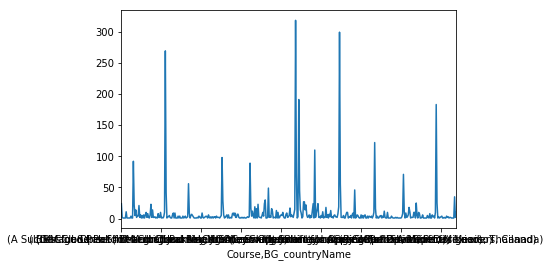

In [242]:
(df_n.groupby(['Course','BG_countryName']).size()).plot()

In [234]:
df_nh=df_n[['Course','BG_countryName']]
df_nh.plot().barh()
print df.groupby(['Type','Name']).size()


TypeError: Empty 'DataFrame': no numeric data to plot

In [228]:
#df_subset=df['BG_countryName','BO_hrOrganizationDisplay'] 
#df_n=df.copy()
df_n['idx'] = df_n.groupby('BG_countryName').BO_hrOrganizationDisplay.cumcount()

(df_n.pivot_table(index=['idx','BG_countryName'], 
                columns=['BO_hrOrganizationDisplay'], 
                values='Course')
   .groupby('BG_countryName').plot.hist(subplots=False, alpha=0.5)

)

DataError: No numeric types to aggregate

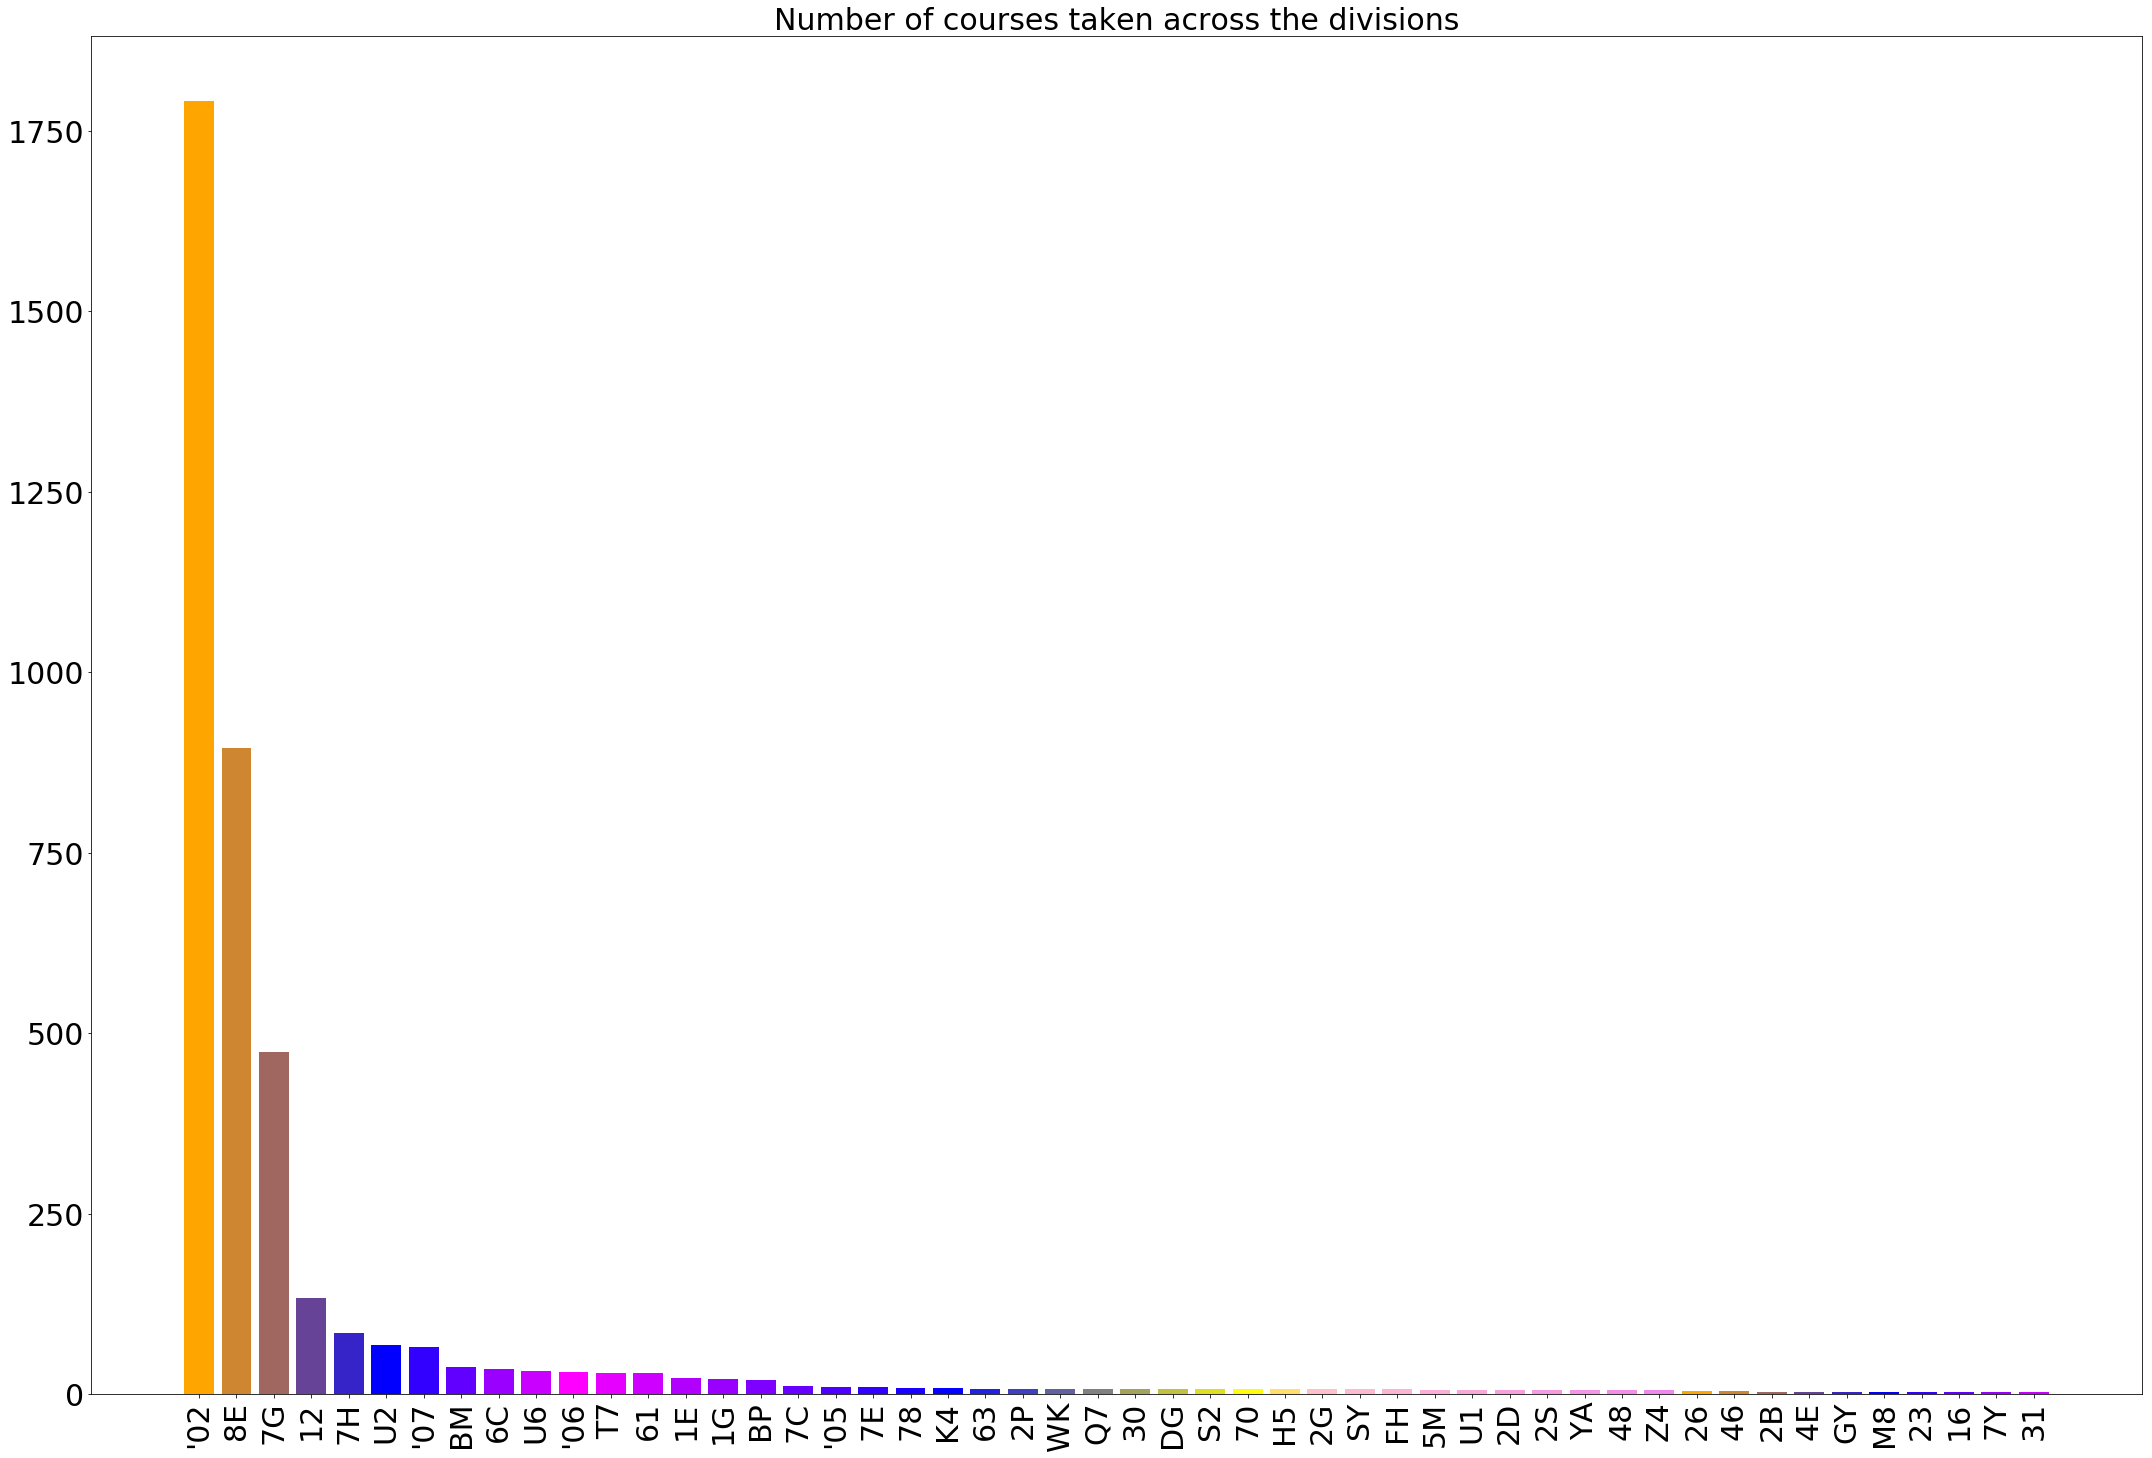

In [223]:
w = Counter(df['B_div'].tolist()).most_common(50)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Number of courses taken across the divisions', fontsize=30)
plt.show()

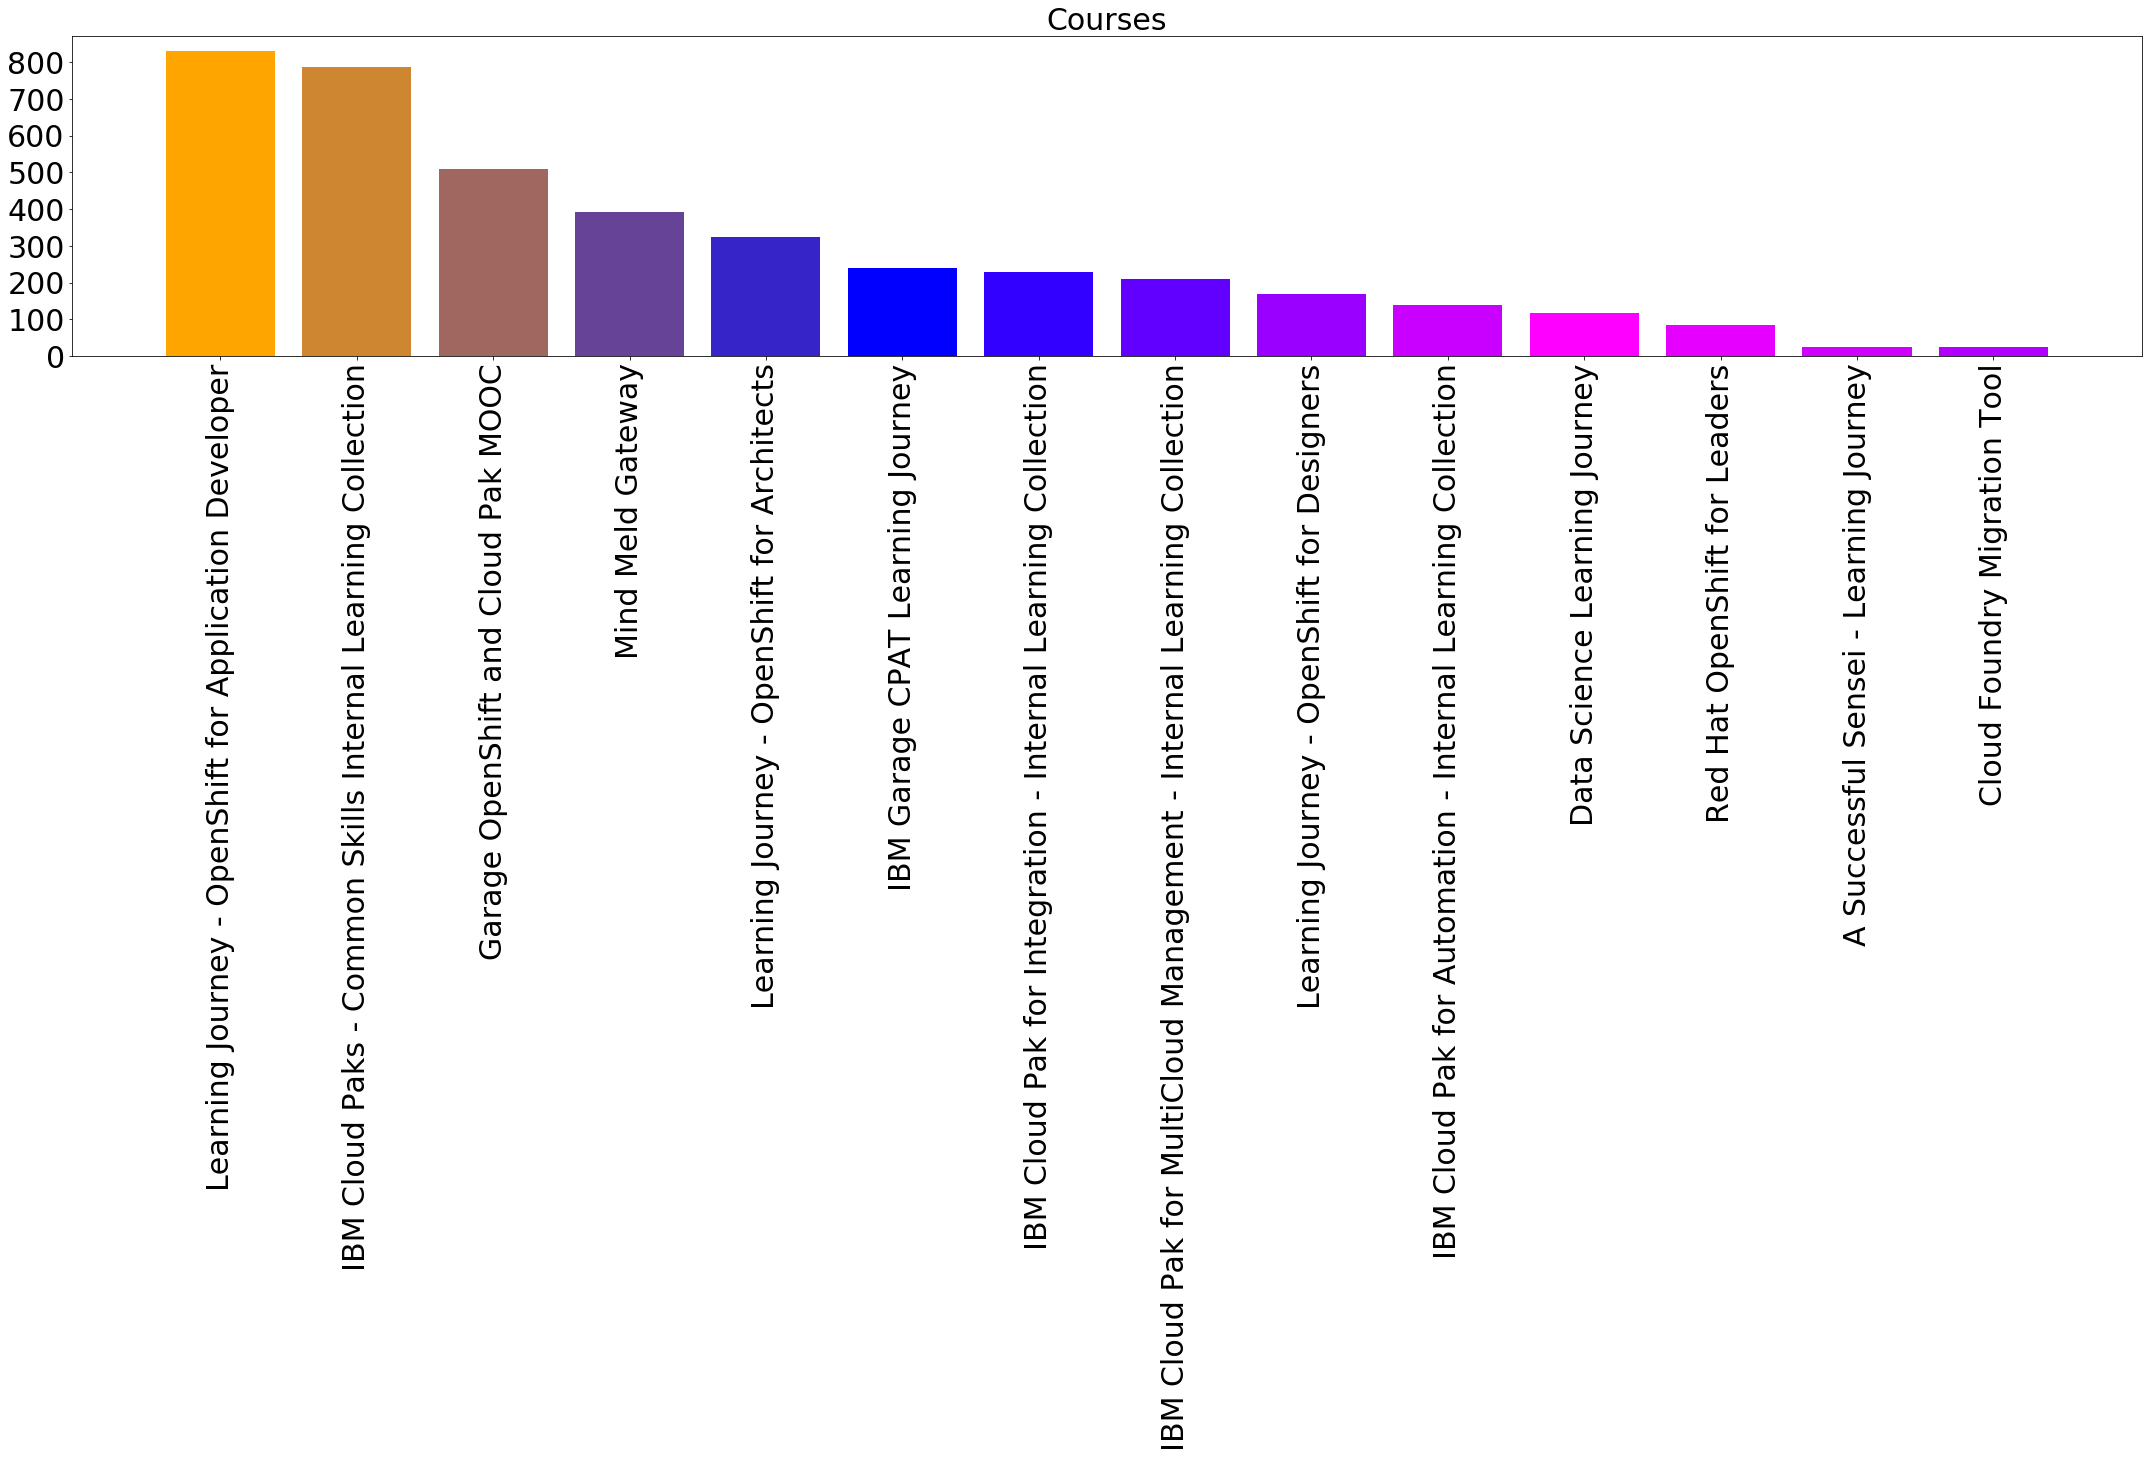

In [224]:
w = Counter(df['Course'].tolist()).most_common(80)

indices = np.arange(len(w))
frequency = []
word=[]

clist = [(0, "orange"), (0.125, "blue"), (0.25, "magenta"), (0.5, "blue"), 
         (0.7, "yellow"), (0.75, "pink"), (1, "violet")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 40
x = np.arange(N).astype(float)

for i in range(len(w)):
  word.append(w[i][0])
  frequency.append(w[i][1])
plt.figure(figsize=(30,20))
plt.bar(indices, frequency,color=rvb(x/N))
plt.xticks(indices, word, rotation='vertical',fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.title('Courses', fontsize=30)
plt.show()